# Extract fragmentation ratio in 4D bins of $Q^2,x_B,z,p_T$


last edit Oct-1, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

Welcome to JupyROOT 6.26/06
Loaded bin migration and acceptance weights from MC calculations.


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
# figures_path = '/Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/Results_rSIDIS/'
figures_path = '/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/'

## (1) Load data

In [4]:
subdirname = "sidisdvcs_24Mar2023_commit_cfbc431" 
e_e_pi,_,_ = load_SIDIS_data( Nruns = -1,
                             rgb_runs_filenames = ["good_runs_10-2-final.txt",
                                                   "good_runs_10-4.txt",
                                                   "good_runs_10-6.txt"], 
                             subdirname = subdirname,
                             do_e_e_pi_n=False, do_e_e_pi_FreeP=False, 
                             fdebug=0 );

Done loading files.


## (2) Apply selection cuts not previously imposed

In [5]:
import time

In [6]:
print('number of pi+ events: %.1f'%(len(e_e_pi['piplus'])/1e6),'M')

number of pi+ events: 60.3 M


In [7]:
# AcceptanceMatchingType  ='p-theta-phi'
AcceptanceMatchingType  ='p-theta'
Nevents = -1
t0 = time.time()
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(fdebug=0, 
                                                              NeventsMax=Nevents,
                                                              AcceptanceMatchingType = AcceptanceMatchingType);
t1 = time.time() 
print("Time elapsed: %.2f"%(t1 - t0), 'sec (%g us/event)'%((t0-t1)/Nevents*1.e6)) # CPU seconds elapsed (floating point)

Applying selection cuts not previously imposed
Apply a π+/π- acceptance matching cut on the in p-theta plane


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1768: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SI

Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2
(e,e π+ )
60284747 events after original cut (100.0 %)
40927825 events after p-theta cut (67.9 %)
33371890 events after Mx cut (55.4 %)
33311918 events after Kinematical cut (55.3 %)
(e,e π- )
25164298 events after original cut (100.0 %)
24375936 events after p-theta cut (96.9 %)
20614743 events after Mx cut (81.9 %)
20576698 events after Kinematical cut (81.8 %)
 
Done applying event-selection cuts
Time elapsed: 323.21 sec (3.23212e+08 us/event)


## (3) Define binning for cross-section ratio as a function of Bjorken $x$, and results path
For a standing proton use $x_B$, defined as
$ x_B = Q^2/2m_p\omega$

In [184]:
dQ2 = 1 # 1
Q2_min_arr = np.arange(2,8,dQ2) # Q2_min_arr = np.arange(2,8,dQ2)
Q2_max_arr = Q2_min_arr + dQ2

dxB = 0.1 # 0.1
xB_min_arr = np.arange(0.1,0.8,dxB) #xB_min_arr = np.arange(0.4,0.5,dxB)# 
xB_max_arr = xB_min_arr + dxB

dz = 0.1 # 0.1
z_min_arr = np.arange(0.3,0.8,dz) # z_min_arr = np.arange(0.3,0.8,dz)
z_max_arr = z_min_arr + dz

dpT = 0.3 # 0.3
pT_min_arr = np.arange(0.,1.2,dpT) # pT_min_arr = np.arange(0.,1.2,dpT)
pT_max_arr = pT_min_arr + dpT



In [185]:
print('Q2', end=": " )
for Q2_min,Q2_max in zip(Q2_min_arr, Q2_max_arr): print('%.1f - %.1f, '%(Q2_min,Q2_max), end="" )
print()
print('xB', end=": " )
for xB_min,xB_max in zip(xB_min_arr, xB_max_arr): print('%.1f - %.1f, '%(xB_min,xB_max), end="" )
print()
print('z', end=": " )
for z_min,z_max in zip(z_min_arr, z_max_arr): print('%.1f - %.1f, '%(z_min,z_max), end="" )
print()
print('pT', end=": " )
for pT_min,pT_max in zip(pT_min_arr, pT_max_arr): print('%.1f - %.1f, '%(pT_min,pT_max), end="" )

Q2: 2.0 - 3.0, 3.0 - 4.0, 4.0 - 5.0, 5.0 - 6.0, 6.0 - 7.0, 7.0 - 8.0, 
xB: 0.1 - 0.2, 0.2 - 0.3, 0.3 - 0.4, 0.4 - 0.5, 0.5 - 0.6, 0.6 - 0.7, 0.7 - 0.8, 
z: 0.3 - 0.4, 0.4 - 0.5, 0.5 - 0.6, 0.6 - 0.7, 0.7 - 0.8, 
pT: 0.0 - 0.3, 0.3 - 0.6, 0.6 - 0.9, 0.9 - 1.2, 

In [186]:
var_label = "standing proton x"
var    = 'xB'
xlabel = "Bjorken $x$"

In [187]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = ''

In [188]:
results_path = '/Users/erezcohen/Desktop/data/BAND/Results/' + 'Results_1Oct2023/'

In [189]:
data_path = results_path + '4Dbins_Q2_xB_z_pT/'
if not os.path.exists(data_path): os.makedirs(data_path)

# (4) Extract cross-section ratio and $r=D^-/D^+$ 

## (4.1) Count the number of $d(e,e'\pi^\pm)$ events, with and without corrections, 
and record the cross-section ratio

In [266]:
fdebug = 0
df_raw_numbers_4D       = pd.DataFrame();
df_corrected_numbers_4D = pd.DataFrame();
df_fragmentation_4D     = pd.DataFrame();
# step over bins
nbins_Q2_z_pT = 0;
for Q2_min,Q2_max in zip(Q2_min_arr, Q2_max_arr): #zip([Q2_min_arr[0]], [Q2_max_arr[0]]): #  
#{    
    if fdebug: print('extracting results for %.1f < Q2 < %d:'%(Q2_min,Q2_max))
    
    for z_min,z_max in zip(z_min_arr, z_max_arr): # zip([z_min_arr[0]], [z_max_arr[0]]):  #  
    #{
        if fdebug>1: print('z bin',(z_min+z_max)/2)

        for pT_min,pT_max in  zip(pT_min_arr, pT_max_arr): #zip([pT_min_arr[0]], [pT_max_arr[0]]):  # 
        #{
            if fdebug>2: print('p(T):',(pT_min+pT_max)/2)

            R_Xsec = compute_ratio_pips_to_pims(df_dict    = e_e_pi_pass_cuts ,
                                                xB_min_arr = xB_min_arr,
                                                xB_max_arr = xB_max_arr,
                                                z_min   = z_min,   z_max   = z_max,
                                                Q2_min  = Q2_min,  Q2_max  = Q2_max,
                                                pT_min  = pT_min,  pT_max  = pT_max,
                                                fdebug  = fdebug,
                                                weight_option = 'bin migration'# 'bin migration + acceptance'
                                                 # weight_option = 'bin migration + acceptance + meson subtraction'
                                               )
            
            (Zavg_pips, Zavg_pims, 
             Npips, Npims, 
             dNpips, dNpims,             
             R, dR_up, dR_dw,             
             Npips_w, dNpips_w, 
             Npims_w, dNpims_w,             
             R_corr,dR_corr_up, dR_corr_dw) = R_Xsec
                        
            r, dr_up, dr_dw  = get_r_from_CrossSectionRatio( R_corr, dR_corr_up, dR_corr_dw )

            dR_corr = (dR_corr_up + dR_corr_dw)/2
            dr      = (dr_up + dr_dw)/2            
            
            # record the results in the dataframe
            for xB_min,xB_max,xB_idx in zip(xB_min_arr, xB_max_arr, range(len(xB_max_arr))): # zip([xB_min_arr[0]], [xB_max_arr[0]]): # 
            #{
                raw_numbers_record = pd.DataFrame([{'$Q^2_{min}$':Q2_min,'$Q^2_{max}$':Q2_max,                                            
                                                    '$x_B^{min}$':xB_min,'$x_B^{max}$':xB_max,
                                                    '$z_{min}$':  z_min, '$z_{max}$':  z_max,
                                                    '$p_T^{min}$':pT_min,'$p_T^{max}$':pT_max,
                                                    '$N^{+}/10^3$':Npips[xB_idx]/1e3,
                                                    '$N^{-}/10^3$':Npims[xB_idx]/1e3,
                                                    '$\\Delta N^{+}/10^3$':np.sqrt(Npips[xB_idx])/1e3,
                                                    '$\\Delta N^{-}/10^3$':np.sqrt(Npims[xB_idx])/1e3 }])
                df_raw_numbers_4D = pd.concat([df_raw_numbers_4D, raw_numbers_record], ignore_index=True)

                corr_numbers_record = pd.DataFrame([{'$Q^2_{min}$':Q2_min,'$Q^2_{max}$':Q2_max,                                            
                                                   '$x_B^{min}$':xB_min,'$x_B^{max}$':xB_max,
                                                   '$z_{min}$':  z_min, '$z_{max}$':  z_max,
                                                   '$p_T^{min}$':pT_min,'$p_T^{max}$':pT_max,
                                                   '$N^{+}_w/10^3$':Npips_w[xB_idx]/1e3,
                                                   '$N^{-}_w/10^3$':Npims_w[xB_idx]/1e3,
                                                   '$\\Delta N^{+}_w/10^3$':dNpips_w[xB_idx]/1e3,
                                                   '$\\Delta N^{-}_w/10^3$':dNpims_w[xB_idx]/1e3}])
                df_corrected_numbers_4D = pd.concat([df_corrected_numbers_4D, corr_numbers_record], ignore_index=True)

                fragmentation_record = pd.DataFrame([{'$Q^2_{min}$':Q2_min,'$Q^2_{max}$':Q2_max,                                            
                                                      '$x_B^{min}$':xB_min,'$x_B^{max}$':xB_max,
                                                      '$z_{min}$':  z_min, '$z_{max}$':  z_max,
                                                      '$p_T^{min}$':pT_min,'$p_T^{max}$':pT_max,
                                                      '$R$':R_corr[xB_idx],'$\\Delta R$':dR_corr[xB_idx],
                                                      '$r$':r[xB_idx],     '$\\Delta r$':dr_up[xB_idx]}])
                df_fragmentation_4D = pd.concat([df_fragmentation_4D, fragmentation_record], ignore_index=True)
            #}            
            # count the number of bins 
            nbins_Q2_z_pT = nbins_Q2_z_pT+1;
        #}
    #}
#}
nbins_xB = len(xB_min_arr)
nbins_tot = nbins_Q2_z_pT * nbins_xB 
print('Done extracting Xsec ratios and r=D^-/D^+ in %d bins'%nbins_tot)

/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)
/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)
/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)
/opt/homebrew/lib/python3.10/si

Done extracting Xsec ratios and r=D^-/D^+ in 840 bins


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = arr.dtype.type(ret / rcount)


In [255]:
df_raw_numbers_4D       = df_raw_numbers_4D.round       (decimals=3)
df_corrected_numbers_4D = df_corrected_numbers_4D.round (decimals=3)
df_fragmentation_4D     = df_fragmentation_4D.round     (decimals=3)

In [256]:
df_raw_numbers_4D

$Q^2_{min}$  $Q^2_{max}$  $x_B^{min}$  $x_B^{max}$  $z_{min}$  $z_{max}$  \
0              2            3          0.1          0.2        0.3        0.4   
1              2            3          0.2          0.3        0.3        0.4   
2              2            3          0.3          0.4        0.3        0.4   
3              2            3          0.4          0.5        0.3        0.4   
4              2            3          0.5          0.6        0.3        0.4   
..           ...          ...          ...          ...        ...        ...   
835            7            8          0.3          0.4        0.7        0.8   
836            7            8          0.4          0.5        0.7        0.8   
837            7            8          0.5          0.6        0.7        0.8   
838            7            8          0.6          0.7        0.7        0.8   
839            7            8          0.7          0.8        0.7        0.8   

     $p_T^{min}$  $p_T^{max}$  $N^{+}/10^3$  $N^{-}/10^3$  \
0            0.0          0.3       138.376        83.484   
1            0.0          0.3      1128.217       713.003   
2            0.0          0.3       251.600       166.956   
3            0.0          0.3         0.000         0.000   
4            0.0          0.3         0.000         0.000   
..           ...          ...           ...           ...   
835          0.9          1.2         0.000         0.000   
836          0.9          1.2         0.000         0.000   
837          0.9          1.2         0.000         0.000   
838          0.9          1.2         0.000         0.000   
839          0.9          1.2         0.000         0.000   

     $\Delta N^{+}/10^3$  $\Delta N^{-}/10^3$  
0                  0.372                0.289  
1                  1.062                0.844  
2                  0.502                0.409  
3                  0.000                0.000  
4                  0.000                0.000  
..                   ...                  ...  
835                0.000                0.000  
836                0.000                0.000  
837                0.000                0.000  
838                0.000                0.000  
839                0.000                0.000  

[840 rows x 12 columns]

In [257]:
df_corrected_numbers_4D

$Q^2_{min}$  $Q^2_{max}$  $x_B^{min}$  $x_B^{max}$  $z_{min}$  $z_{max}$  \
0              2            3          0.1          0.2        0.3        0.4   
1              2            3          0.2          0.3        0.3        0.4   
2              2            3          0.3          0.4        0.3        0.4   
3              2            3          0.4          0.5        0.3        0.4   
4              2            3          0.5          0.6        0.3        0.4   
..           ...          ...          ...          ...        ...        ...   
835            7            8          0.3          0.4        0.7        0.8   
836            7            8          0.4          0.5        0.7        0.8   
837            7            8          0.5          0.6        0.7        0.8   
838            7            8          0.6          0.7        0.7        0.8   
839            7            8          0.7          0.8        0.7        0.8   

     $p_T^{min}$  $p_T^{max}$  $N^{+}_w/10^3$  $N^{-}_w/10^3$  \
0            0.0          0.3         123.339          75.326   
1            0.0          0.3        1103.942         704.198   
2            0.0          0.3         316.058         210.598   
3            0.0          0.3           0.000           0.000   
4            0.0          0.3           0.000           0.000   
..           ...          ...             ...             ...   
835          0.9          1.2           0.000           0.000   
836          0.9          1.2           0.000           0.000   
837          0.9          1.2           0.000           0.000   
838          0.9          1.2           0.000           0.000   
839          0.9          1.2           0.000           0.000   

     $\Delta N^{+}_w/10^3$  $\Delta N^{-}_w/10^3$  
0                    0.332                  0.261  
1                    1.045                  0.838  
2                    0.756                  0.622  
3                    0.000                  0.000  
4                    0.000                  0.000  
..                     ...                    ...  
835                  0.000                  0.000  
836                  0.000                  0.000  
837                  0.000                  0.000  
838                  0.000                  0.000  
839                  0.000                  0.000  

[840 rows x 12 columns]

In [258]:
df_fragmentation_4D

$Q^2_{min}$  $Q^2_{max}$  $x_B^{min}$  $x_B^{max}$  $z_{min}$  $z_{max}$  \
0              2            3          0.1          0.2        0.3        0.4   
1              2            3          0.2          0.3        0.3        0.4   
2              2            3          0.3          0.4        0.3        0.4   
3              2            3          0.4          0.5        0.3        0.4   
4              2            3          0.5          0.6        0.3        0.4   
..           ...          ...          ...          ...        ...        ...   
835            7            8          0.3          0.4        0.7        0.8   
836            7            8          0.4          0.5        0.7        0.8   
837            7            8          0.5          0.6        0.7        0.8   
838            7            8          0.6          0.7        0.7        0.8   
839            7            8          0.7          0.8        0.7        0.8   

     $p_T^{min}$  $p_T^{max}$    $R$  $\Delta R$    $r$  $\Delta r$  
0            0.0          0.3  1.637       0.007  0.426       0.003  
1            0.0          0.3  1.568       0.002  0.461       0.001  
2            0.0          0.3  1.501       0.006  0.500       0.003  
3            0.0          0.3  0.000       0.000  0.000       0.000  
4            0.0          0.3  0.000       0.000  0.000       0.000  
..           ...          ...    ...         ...    ...         ...  
835          0.9          1.2  0.000       0.000  0.000       0.000  
836          0.9          1.2  0.000       0.000  0.000       0.000  
837          0.9          1.2  0.000       0.000  0.000       0.000  
838          0.9          1.2  0.000       0.000  0.000       0.000  
839          0.9          1.2  0.000       0.000  0.000       0.000  

[840 rows x 12 columns]

In [259]:
# fdebug = 1
# df_results_4D = pd.DataFrame();
# # step over bins
# nbins_Q2_z_pT = 0;
# for Q2_min,Q2_max in zip(Q2_min_arr, Q2_max_arr): # zip([Q2_min_arr[0]], [Q2_max_arr[0]]): # 
# #{    
#     if fdebug: print('Q2:',(Q2_min+Q2_max)/2)
    
#     for z_min,z_max in zip(z_min_arr, z_max_arr): # zip([z_min_arr[0]], [z_max_arr[0]]):  # 
#     #{
#         if fdebug>1: print('z:',(z_min+z_max)/2)

#         for pT_min,pT_max in  zip(pT_min_arr, pT_max_arr): # zip([pT_min_arr[0]], [pT_max_arr[0]]):  #
#         #{
#             if fdebug>2: print('p(T):',(pT_min+pT_max)/2)

#             R_Xsec = compute_ratio_pips_to_pims(df_dict    = e_e_pi_pass_cuts ,
#                                                 xB_min_arr = xB_min_arr,
#                                                 xB_max_arr = xB_max_arr,
#                                                 z_min   = z_min,   z_max   = z_max,
#                                                 Q2_min  = Q2_min,  Q2_max  = Q2_max,
#                                                 pT_min  = pT_min,  pT_max  = pT_max,
#                                                 fdebug  = fdebug,
#                                                 weight_option = 'bin migration + acceptance + meson subtraction')

#             (R, dR_up, dR_dw,
#              N_pips,N_pims, Zavg_pips, Zavg_pims, N_pips_err, N_pims_err,             
#              N_pips_weighted, N_pips_weighted_err, N_pims_weighted, N_pims_weighted_err,             
#              R_corr,dR_corr_up, dR_corr_dw) = R_Xsec
            
            
#             r, dr_up, dr_dw  = get_r_from_CrossSectionRatio( R_corr, dR_corr_up, dR_corr_dw )

#             dR_corr = (dR_corr_up + dR_corr_dw)/2
#             dr      = (dr_up + dr_dw)/2
            
            
#             # record the results in the dataframe
#             for xB_min,xB_max,xB_idx in zip(xB_min_arr, xB_max_arr, range(len(xB_max_arr))): # zip([xB_min_arr[0]], [xB_max_arr[0]]): # 
#                 new_record = pd.DataFrame([{'$Q^2_{min}$':Q2_min,'$Q^2_{max}$':Q2_max,
#                                             '$x_B^{min}$':xB_min,'$x_B^{max}$':xB_max,
#                                             '$z_{min}$':    z_min, '$z_{max}$':    z_max,
#                                             '$p_T^{min}$':pT_min,'$p_T^{max}$':pT_max,
                                            
#                                             # '$z_{mean}$':(Zavg_pips_arr[xB_idx]+Zavg_pims_arr[xB_idx])/2,
#                                             '$N^{+}/10^5$':N_pips[xB_idx]/1e5,
#                                             '$N^{-}/10^5$':N_pims[xB_idx]/1e5,

#                                             '$N^{+}_w/10^5$':N_pips_weighted[xB_idx]/1e5,
#                                             '$N^{-}_w/10^5$':N_pims_weighted[xB_idx]/1e5,
#                                             '$\\Delta N^{+}_w/10^5$':N_pips_weighted_err[xB_idx]/1e5,
#                                             '$\\Delta N^{-}_w/10^5$':N_pims_weighted_err[xB_idx]/1e5,
                                            
#                                             '$R$':R_corr[xB_idx],       '$\\Delta R$':dR_corr[xB_idx],
#                                             '$r$':r[xB_idx],            '$\\Delta r$':dr_up[xB_idx],
#                                            }])

#                 df_results_4D = pd.concat([df_results_4D, new_record], ignore_index=True)

            
#             # count the number of bins 
#             nbins_Q2_z_pT = nbins_Q2_z_pT+1;
#         #}
#     #}
# #}
# nbins_xB = len(xB_min_arr)            
# nbins_tot = nbins_Q2_z_pT * nbins_xB            
# print('Done extracting Xsec ratios and r=D^+/D^- in %d bins'%nbins_tot)

# (5) Save to CSV

In [261]:
df_raw_numbers_4D.to_csv( data_path + 'raw_numbers_4D.csv')
df_corrected_numbers_4D.to_csv( data_path + 'xsec_ratios_4D.csv')
df_fragmentation_4D.to_csv( data_path + 'fragmentation_4D.csv')

In [260]:
# len(df_results_4D[df_results_4D['$R$']==0])
# len(df_results_4D[df_results_4D['$r$']==0])
# df = df_results_4D[df_results_4D['$r$']!=0]
# df[(df['$Q^2_{min}$']==3) & (df['$x_B^{min}$']==0.3)]
# df_corrected_numbers_4D = df_xsec_ratios_4D

In [263]:
# df_raw_numbers_4D[df_corrected_numbers_4D['$N^{+}_w/10^3$']==1103.942]

$Q^2_{min}$  $Q^2_{max}$  $x_B^{min}$  $x_B^{max}$  $z_{min}$  $z_{max}$  \
1            2            3          0.2          0.3        0.3        0.4   

   $p_T^{min}$  $p_T^{max}$  $N^{+}/10^3$  $N^{-}/10^3$  $\Delta N^{+}/10^3$  \
1          0.0          0.3      1128.217       713.003                1.062   

   $\Delta N^{-}/10^3$  
1                0.844

# (5) Tabulate for (latex-format) analysis note 

In [264]:
import pandas.io.formats.style

In [265]:
s = pd.io.formats.style.Styler(df_raw_numbers_4D, precision=2,
                               caption="The number of $d(e,e'\pi^\pm)$ in 4D bins of $Q^2, x_B, z$, and $p_T$")
s.to_latex(label='tab:Raw numbers in 4D bins', environment = 'longtable',
           buf='/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/sections/TabularResults_raw_numbers_4D.tex')


s = pd.io.formats.style.Styler(df_corrected_numbers_4D[df_corrected_numbers_4D['$N^{+}_w/10^3$']!=0], precision=2,
                               caption="The corrected number of $d(e,e'\pi^\pm)$ in 4D bins of $Q^2, x_B, z$, and $p_T$")
s.to_latex(label='tab:Corrected numbers in 4D bins', environment = 'longtable',
           buf='/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/sections/TabularResults_corrected_numbers_4D.tex')

s = pd.io.formats.style.Styler(df_fragmentation_4D[df_fragmentation_4D['$r$']!=0], precision=2,
                               caption="The $d(e,e'\pi^\pm)$  cross-section and fragmentation ratios in 4D bins of $Q^2, x_B, z$, and $p_T$")
s.to_latex(label='tab:Fragmentation ratios in 4D bins', environment = 'longtable',
           buf='/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/sections/TabularResults_fragmentation_4D.tex')

In [267]:
# len(df_corrected_numbers_4D[df_corrected_numbers_4D['$N^{+}_w/10^3$']!=0])

245

In [228]:
# pd.io.formats
# print(s.to_latex(label='tab:Raw numbers in 4D bins', environment = 'longtable'))

## Check correction magnitude

saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/EventNumberCorrections.pdf


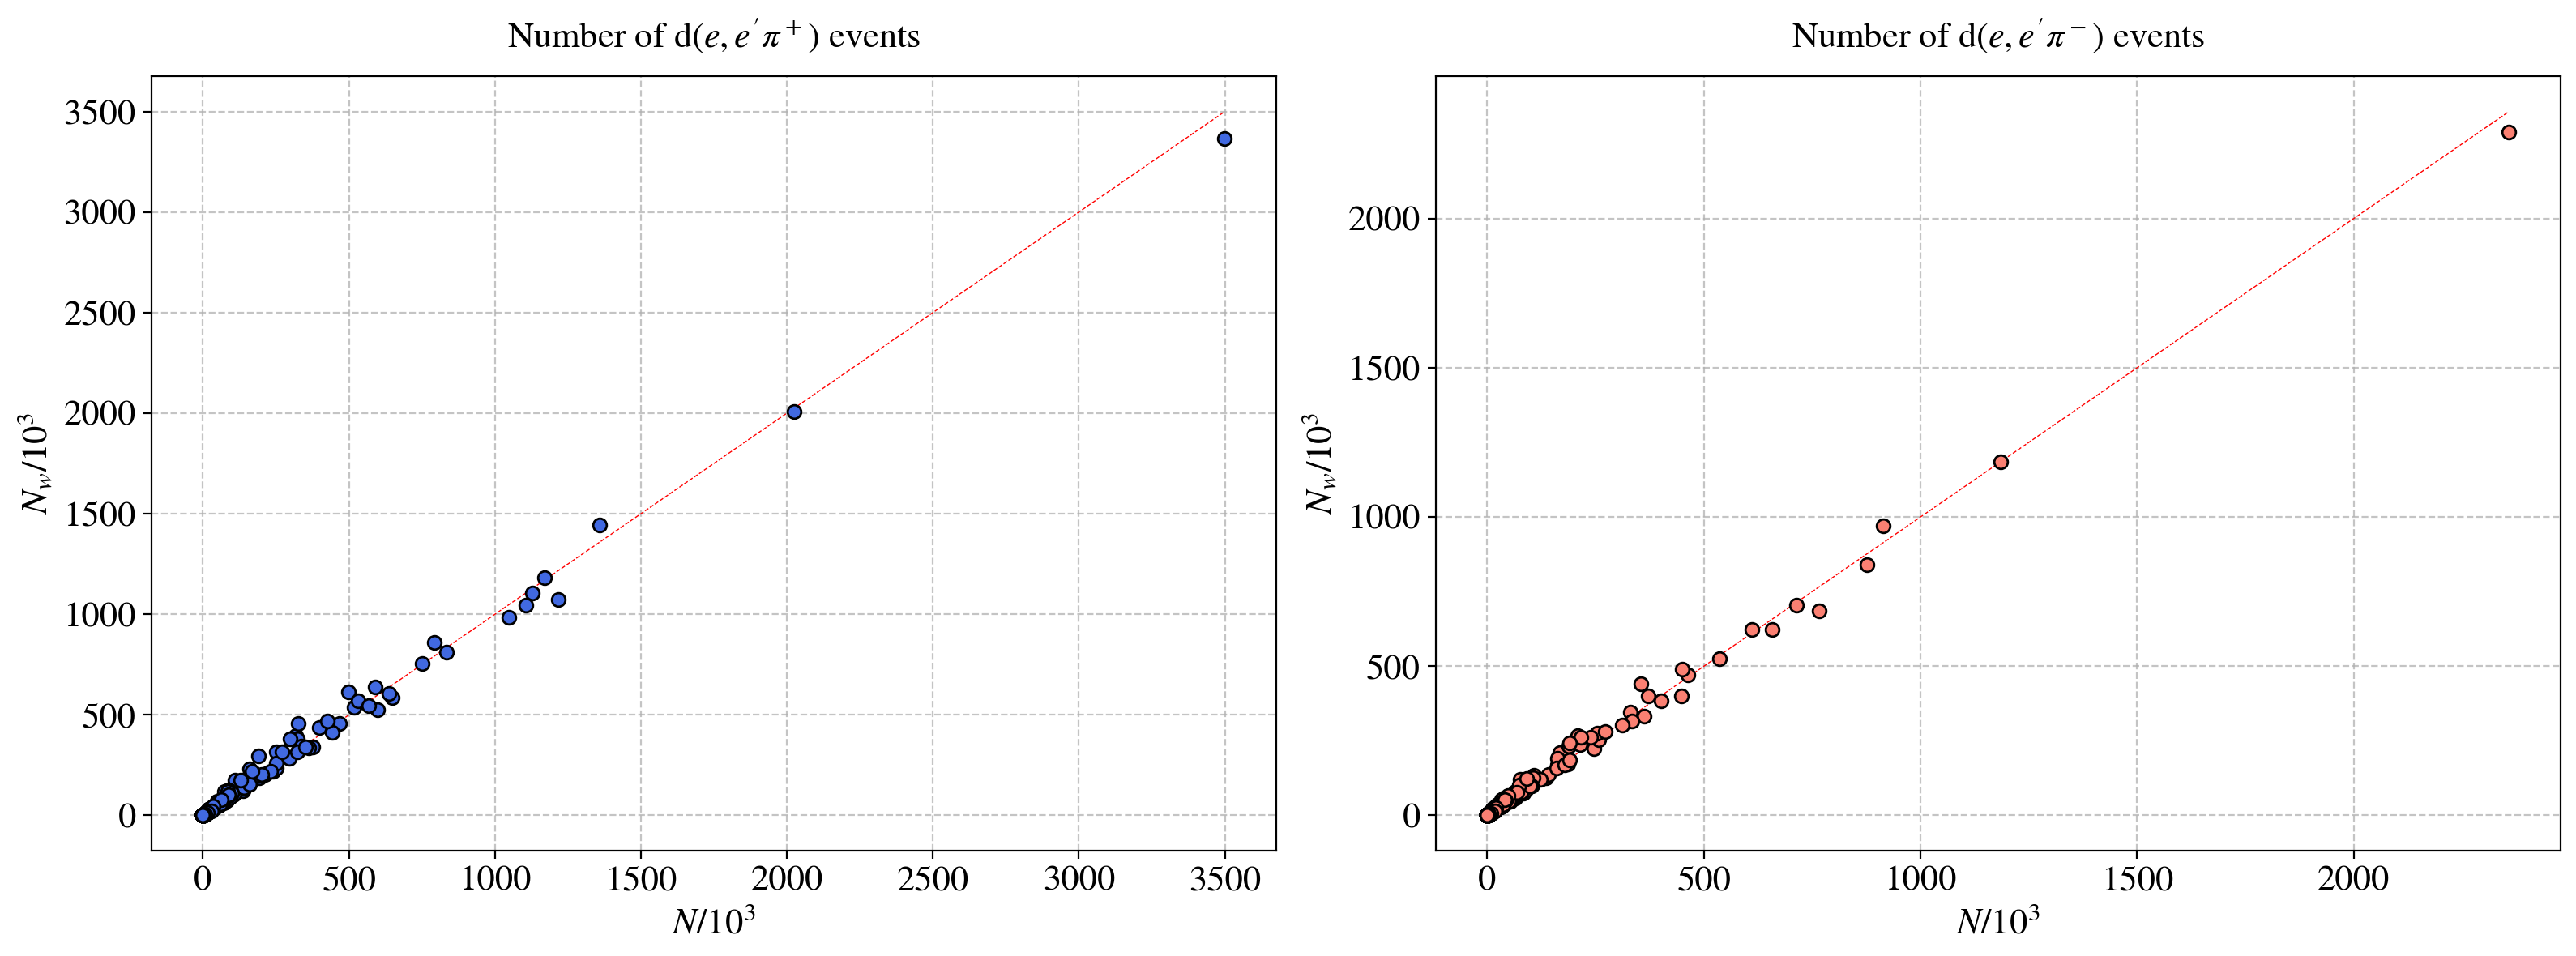

In [281]:


fig = plt.figure(figsize=(16,6), tight_layout=True);
ax = fig.add_subplot(1,2,1);
N   = df_raw_numbers_4D['$N^{+}/10^3$']
dN   = df_raw_numbers_4D['$\\Delta N^{+}/10^3$']
Nw = df_corrected_numbers_4D['$N^{+}_w/10^3$']
dNw = df_corrected_numbers_4D['$\\Delta N^{+}_w/10^3$']

ax.errorbar( N, Nw, dN, dNw ,'o', markerfacecolor=pi_colors[0],markeredgecolor='k')
plt.plot([0,np.max(N)],[0,np.max(N)],'--r', linewidth=0.5 )
set_axes(ax,'$N/10^3$','$N_w/10^3$',title="Number of d$(e,e'\pi^+)$ events",do_add_grid=True,fontsize=16);

ax = fig.add_subplot(1,2,2);
N   = df_raw_numbers_4D['$N^{-}/10^3$']
dN   = df_raw_numbers_4D['$\\Delta N^{-}/10^3$']
Nw = df_corrected_numbers_4D['$N^{-}_w/10^3$']
dNw = df_corrected_numbers_4D['$\\Delta N^{-}_w/10^3$']

ax.errorbar( N, Nw, dN, dNw ,'o', markerfacecolor=pi_colors[1],markeredgecolor='k')
plt.plot([0,np.max(N)],[0,np.max(N)],'--r', linewidth=0.5 )
set_axes(ax,'$N/10^3$','$N_w/10^3$',title="Number of d$(e,e'\pi^-)$ events",do_add_grid=True,fontsize=16);

save_figure('/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/EventNumberCorrections.pdf')


# (6) Make a few plots
And check that the results are consistent with previous results extracted with the MC corrections calculated at the same bins as the extracted cross-section 

saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/fragmentation_r_2.0_Q2_3.0_and_0.2_xB_0.3.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/fragmentation_r_2.0_Q2_3.0_and_0.3_xB_0.4.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/fragmentation_r_2.0_Q2_3.0_and_0.4_xB_0.5.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/fragmentation_r_2.0_Q2_3.0_and_0.5_xB_0.6.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/fragmentation_r_3.0_Q2_4.0_and_0.2_xB_0.3.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/fragmentation_r_3.0_Q2_4.0_and_0.3_xB_0.4.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSI

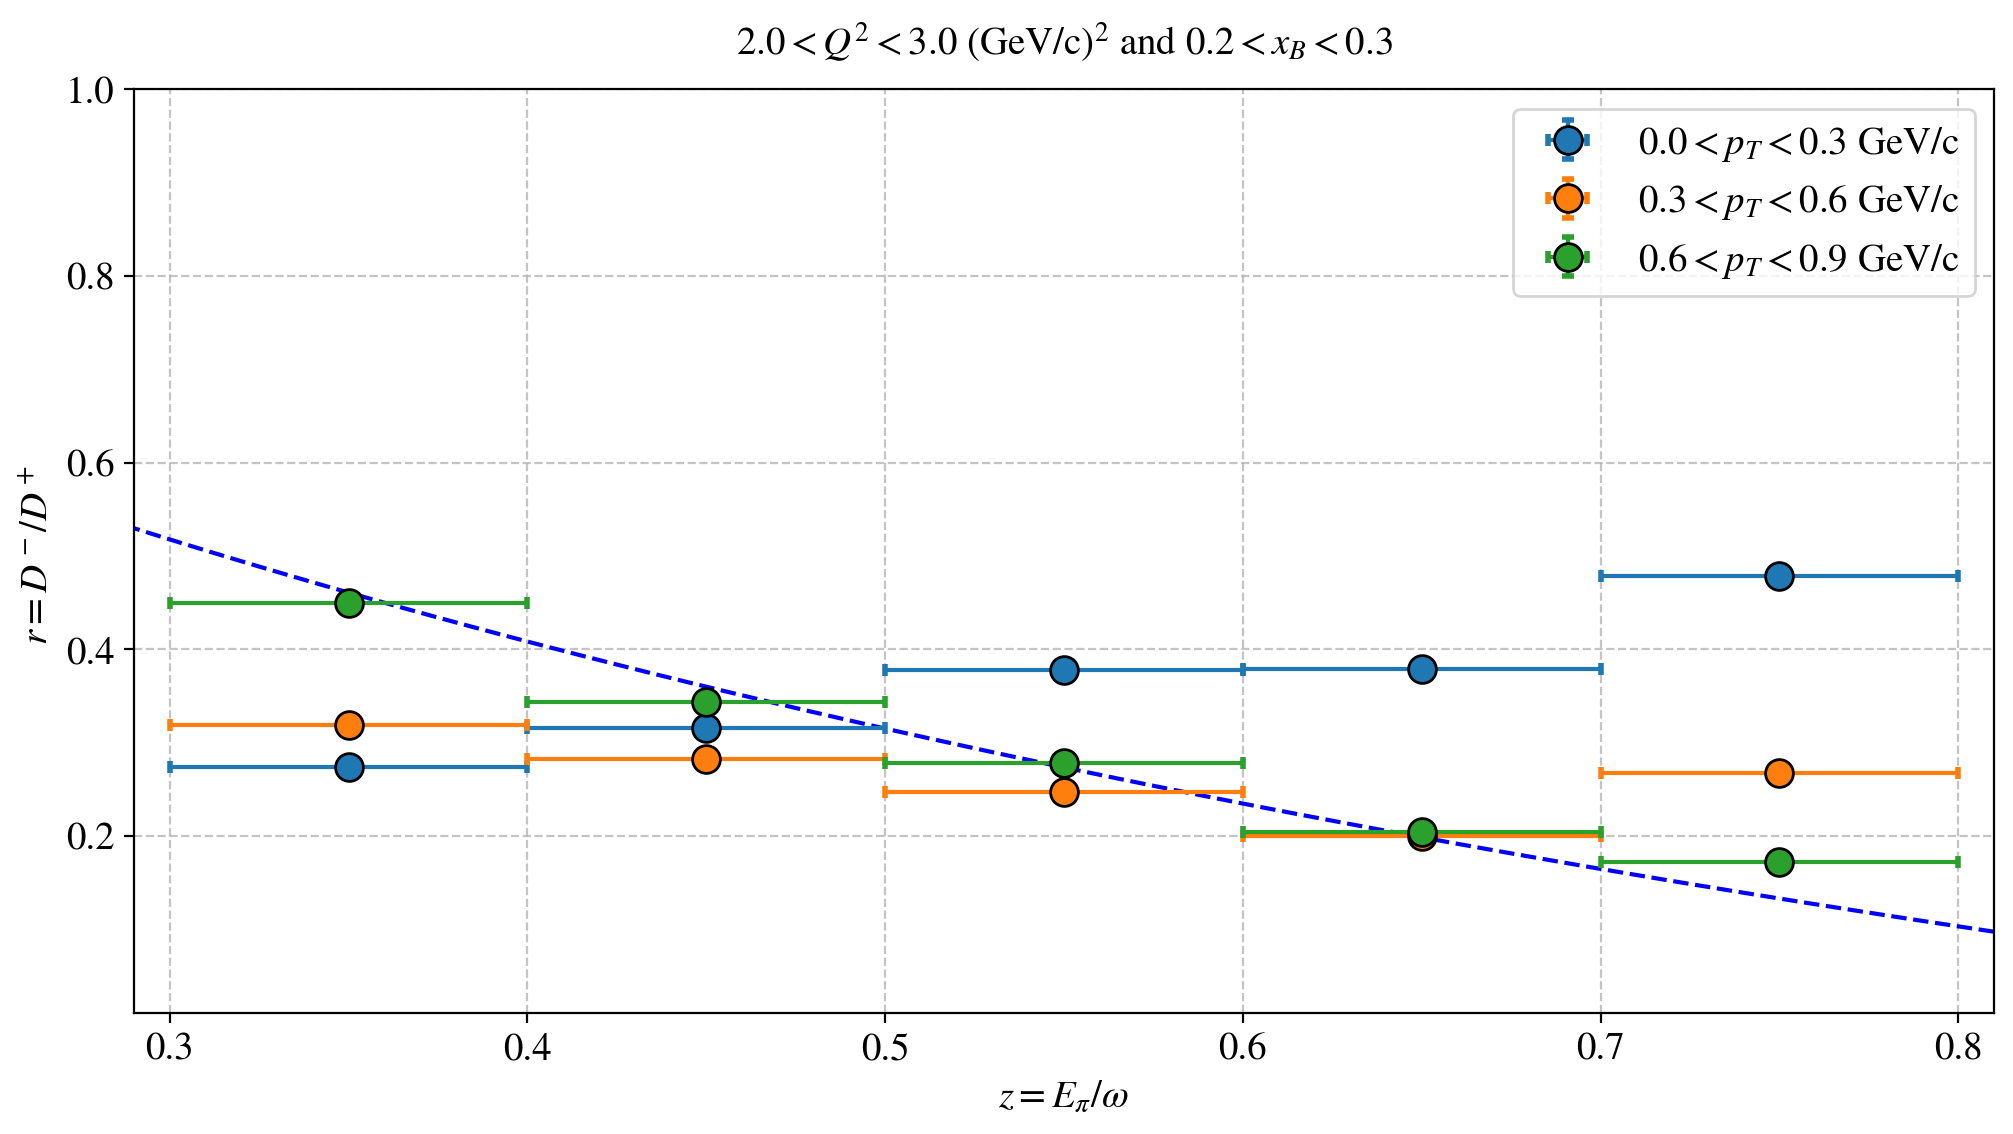

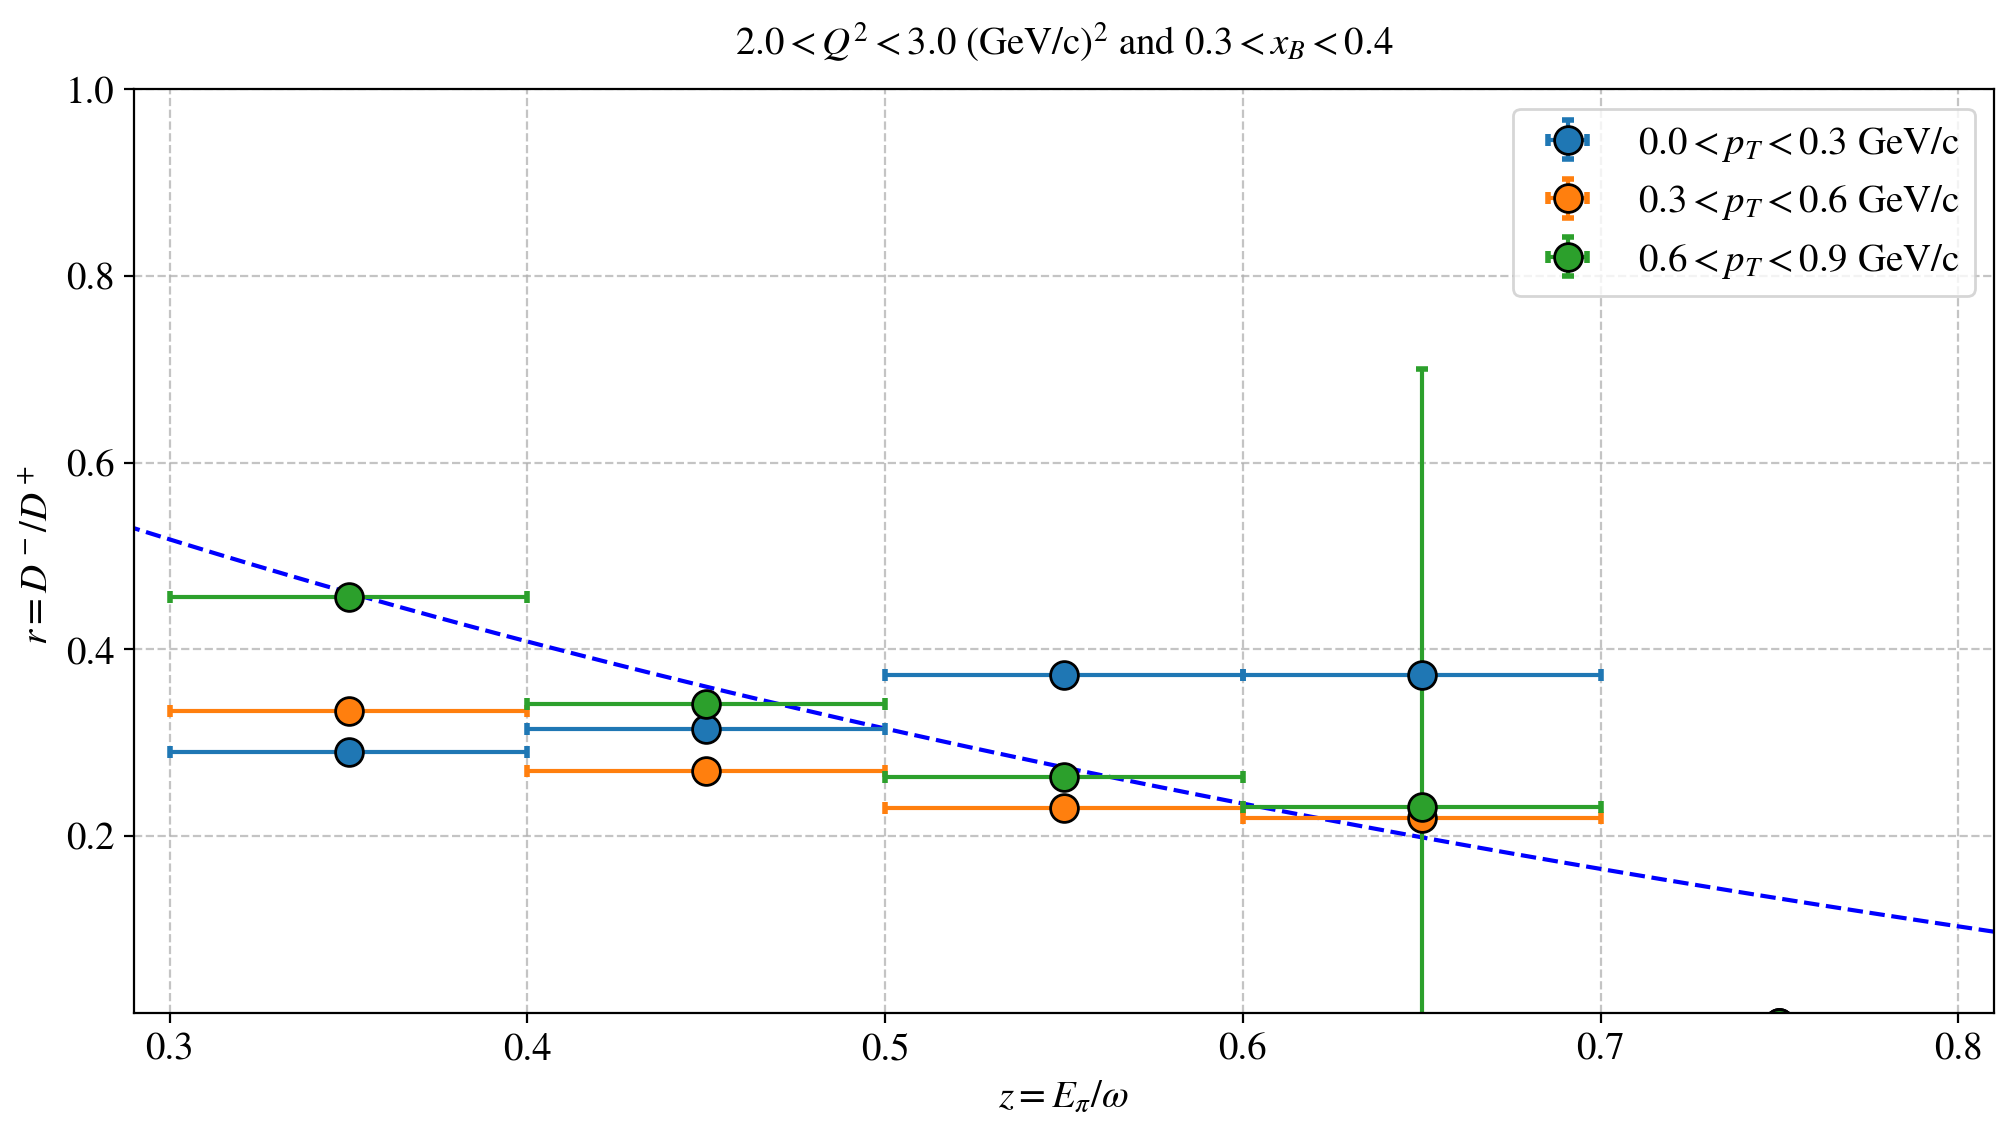

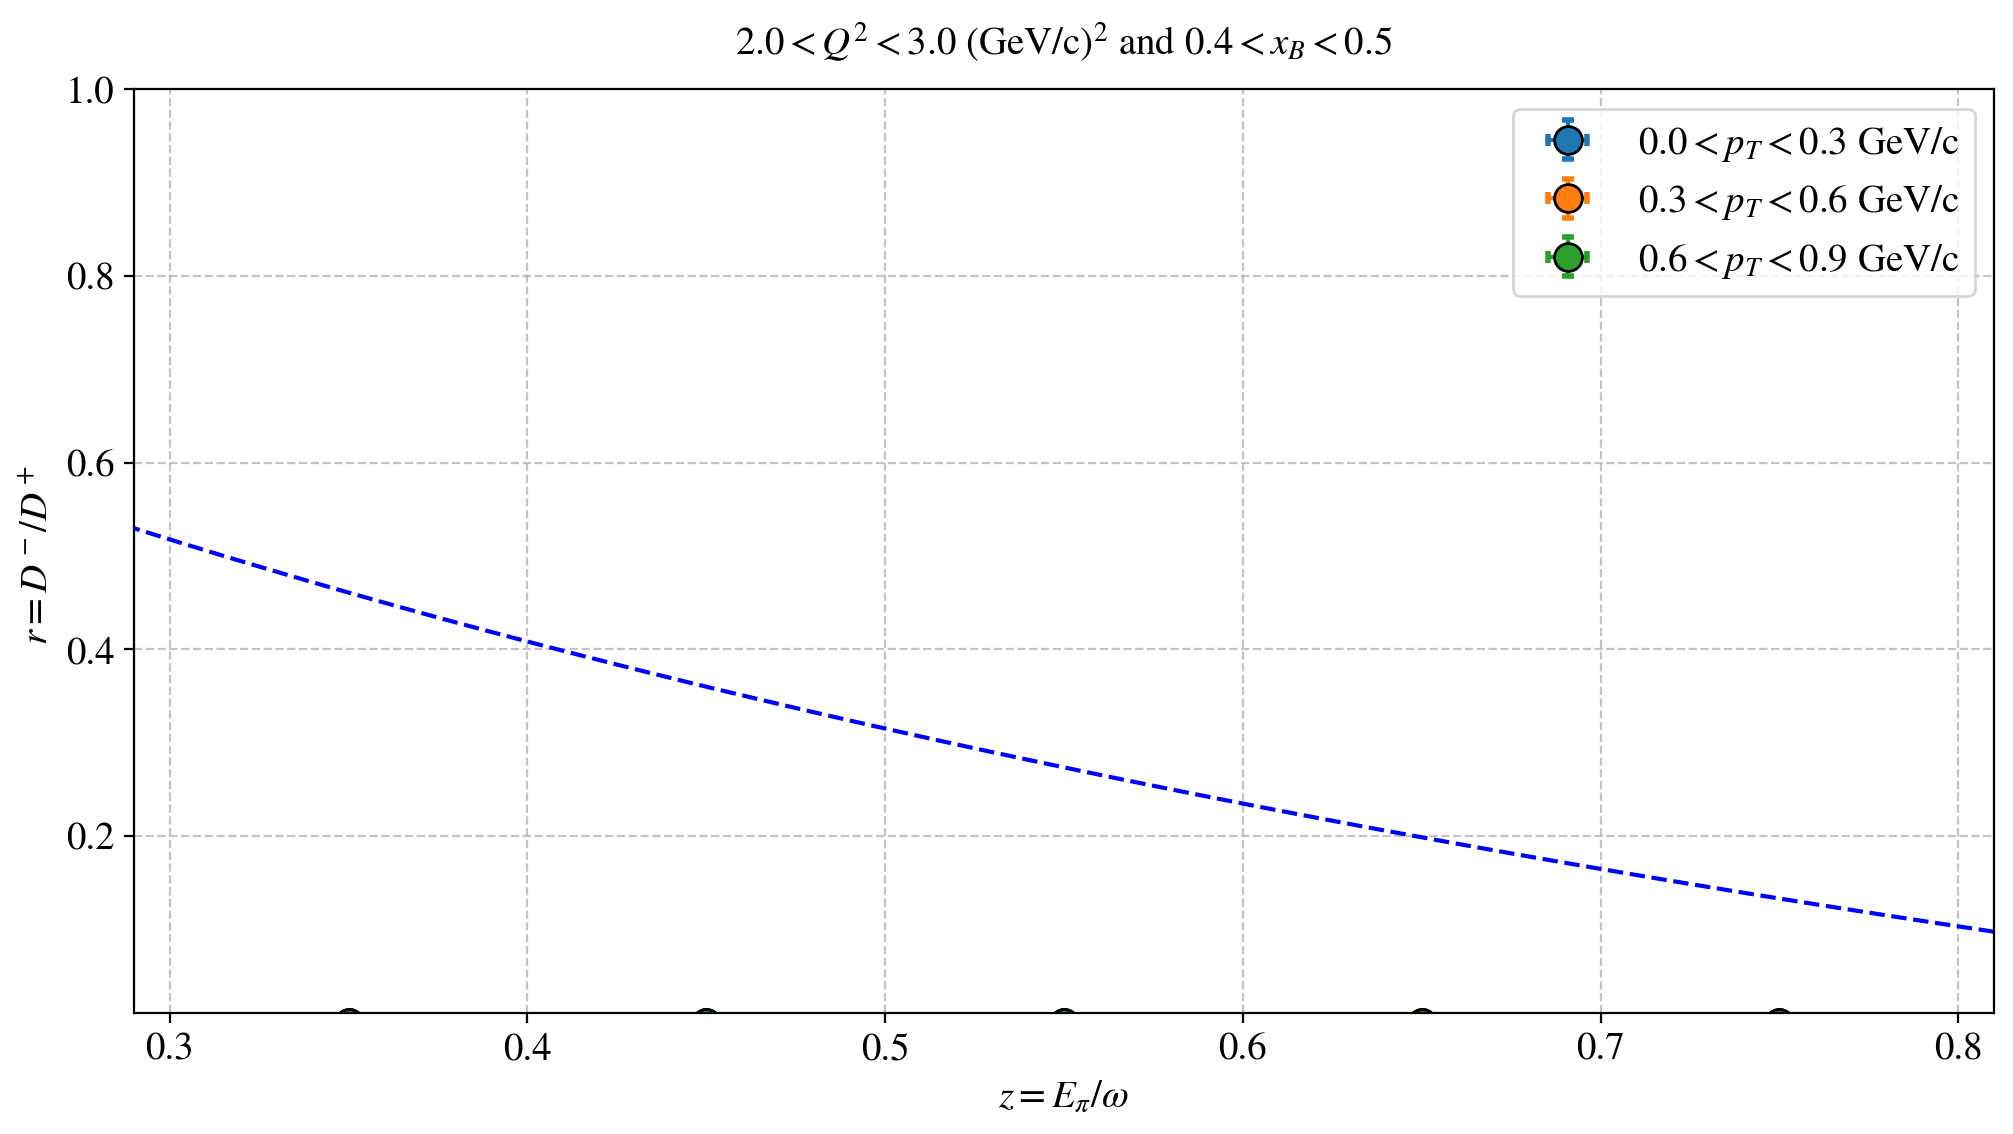

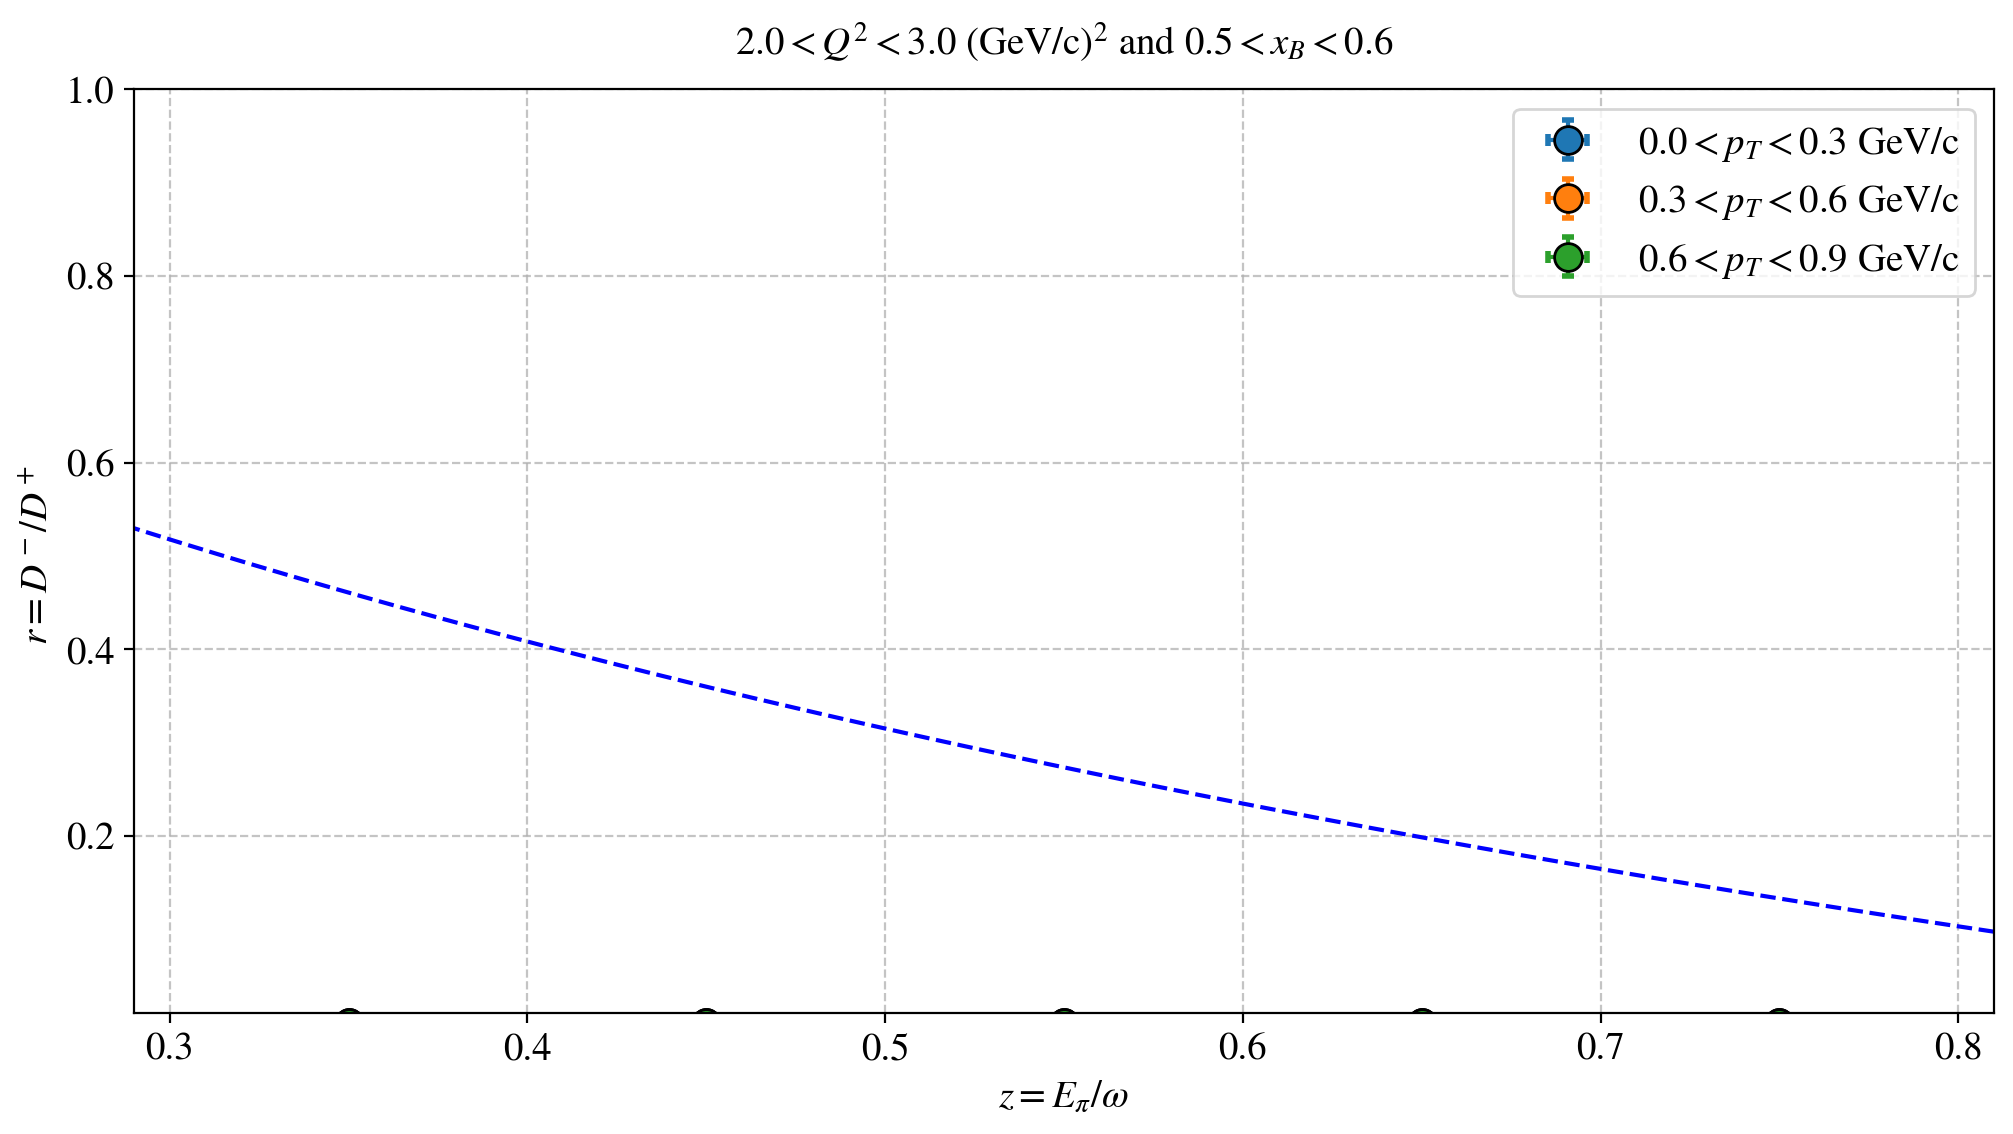

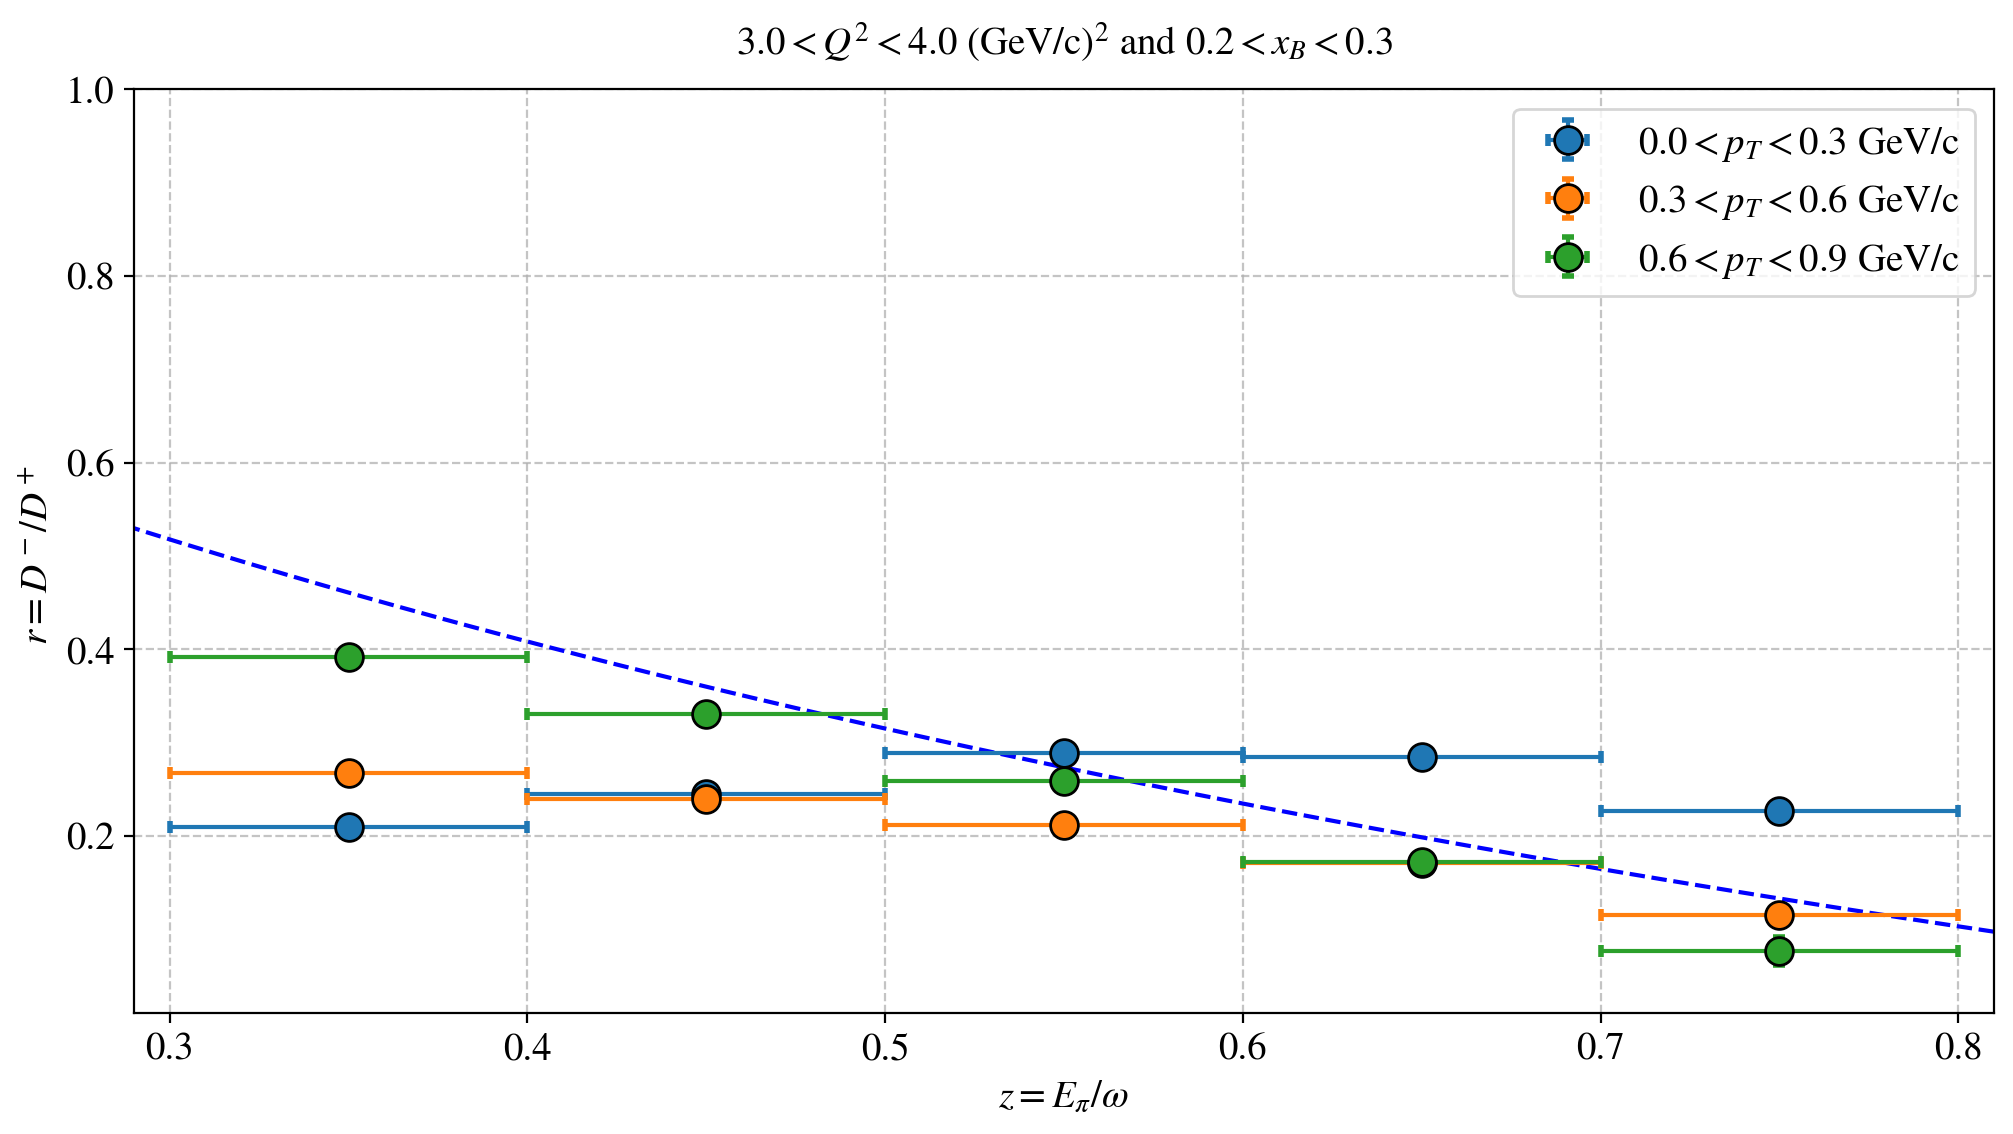

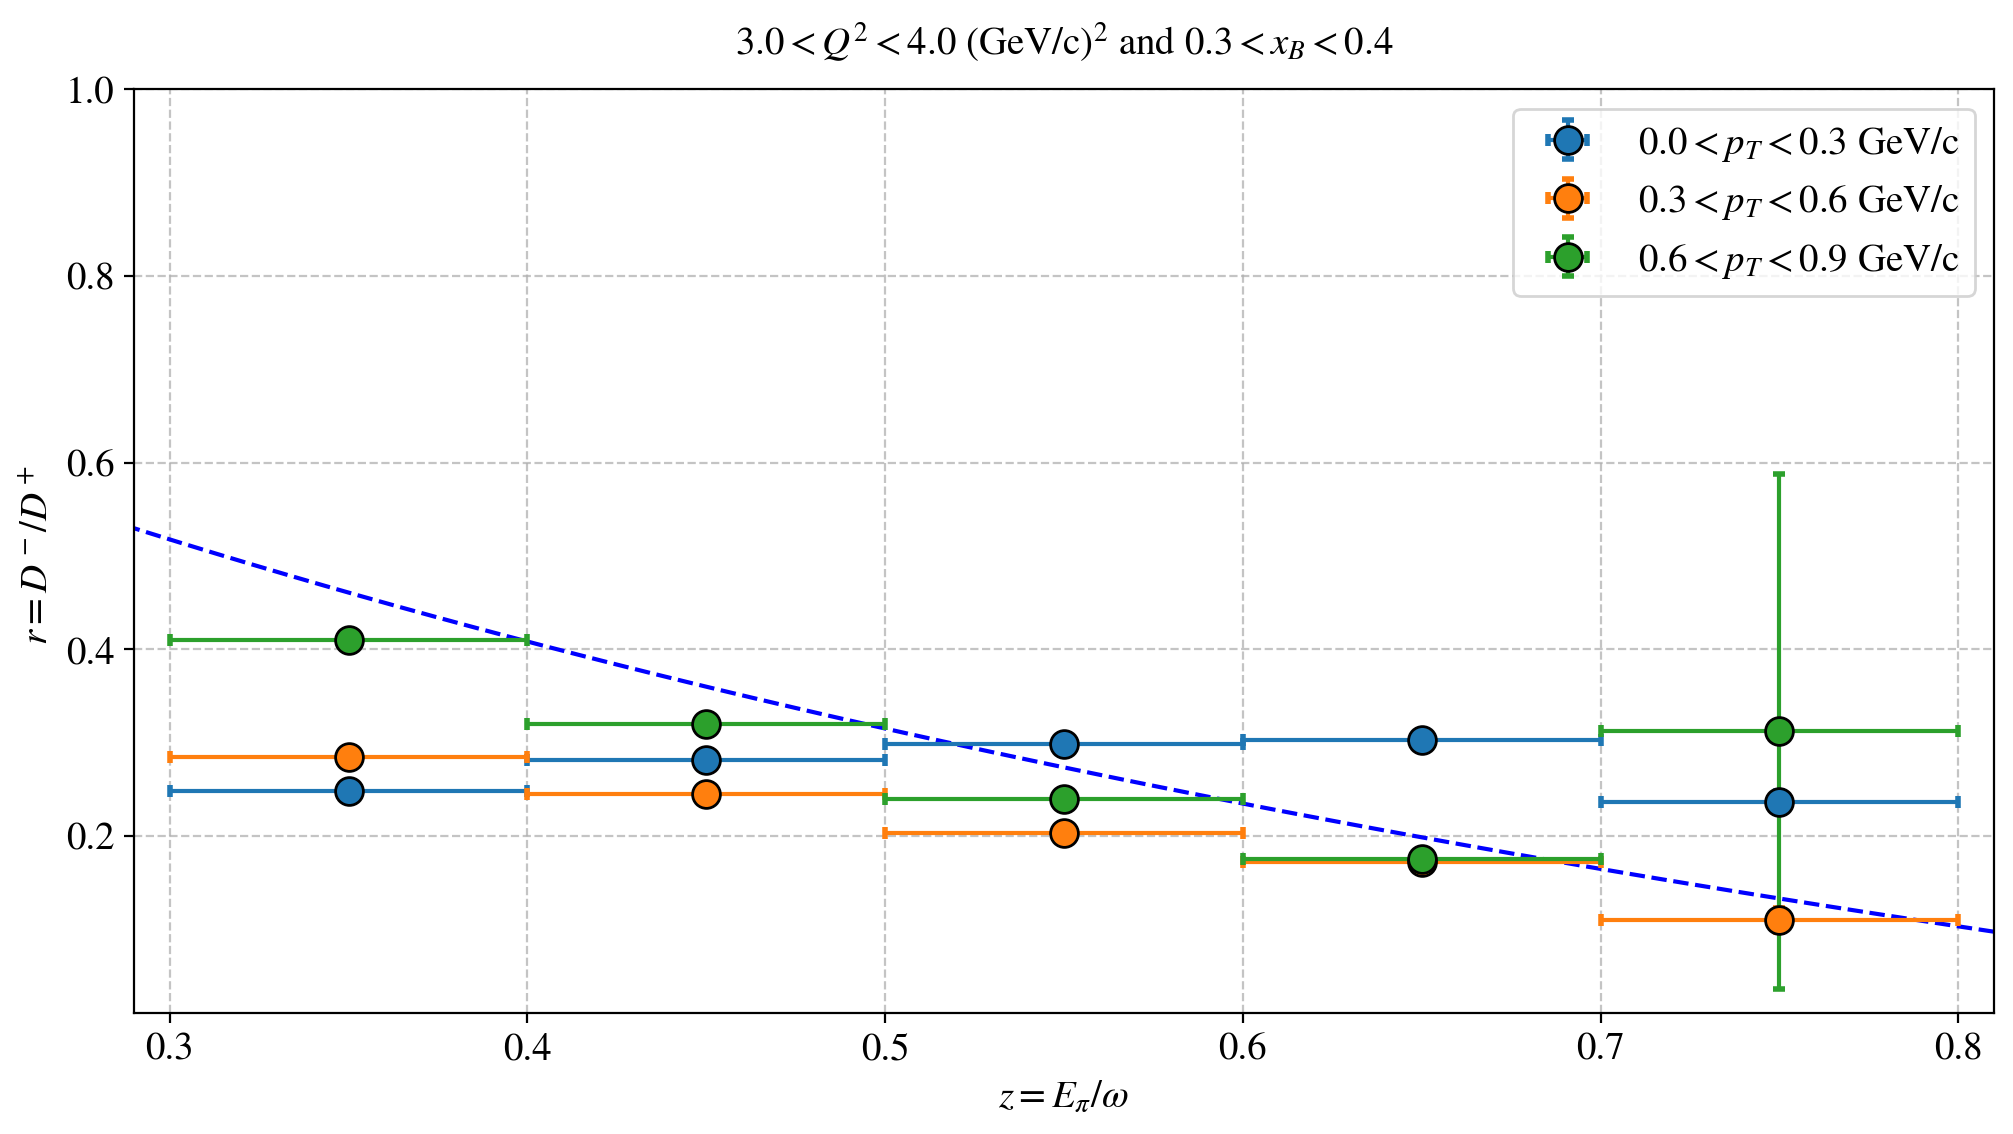

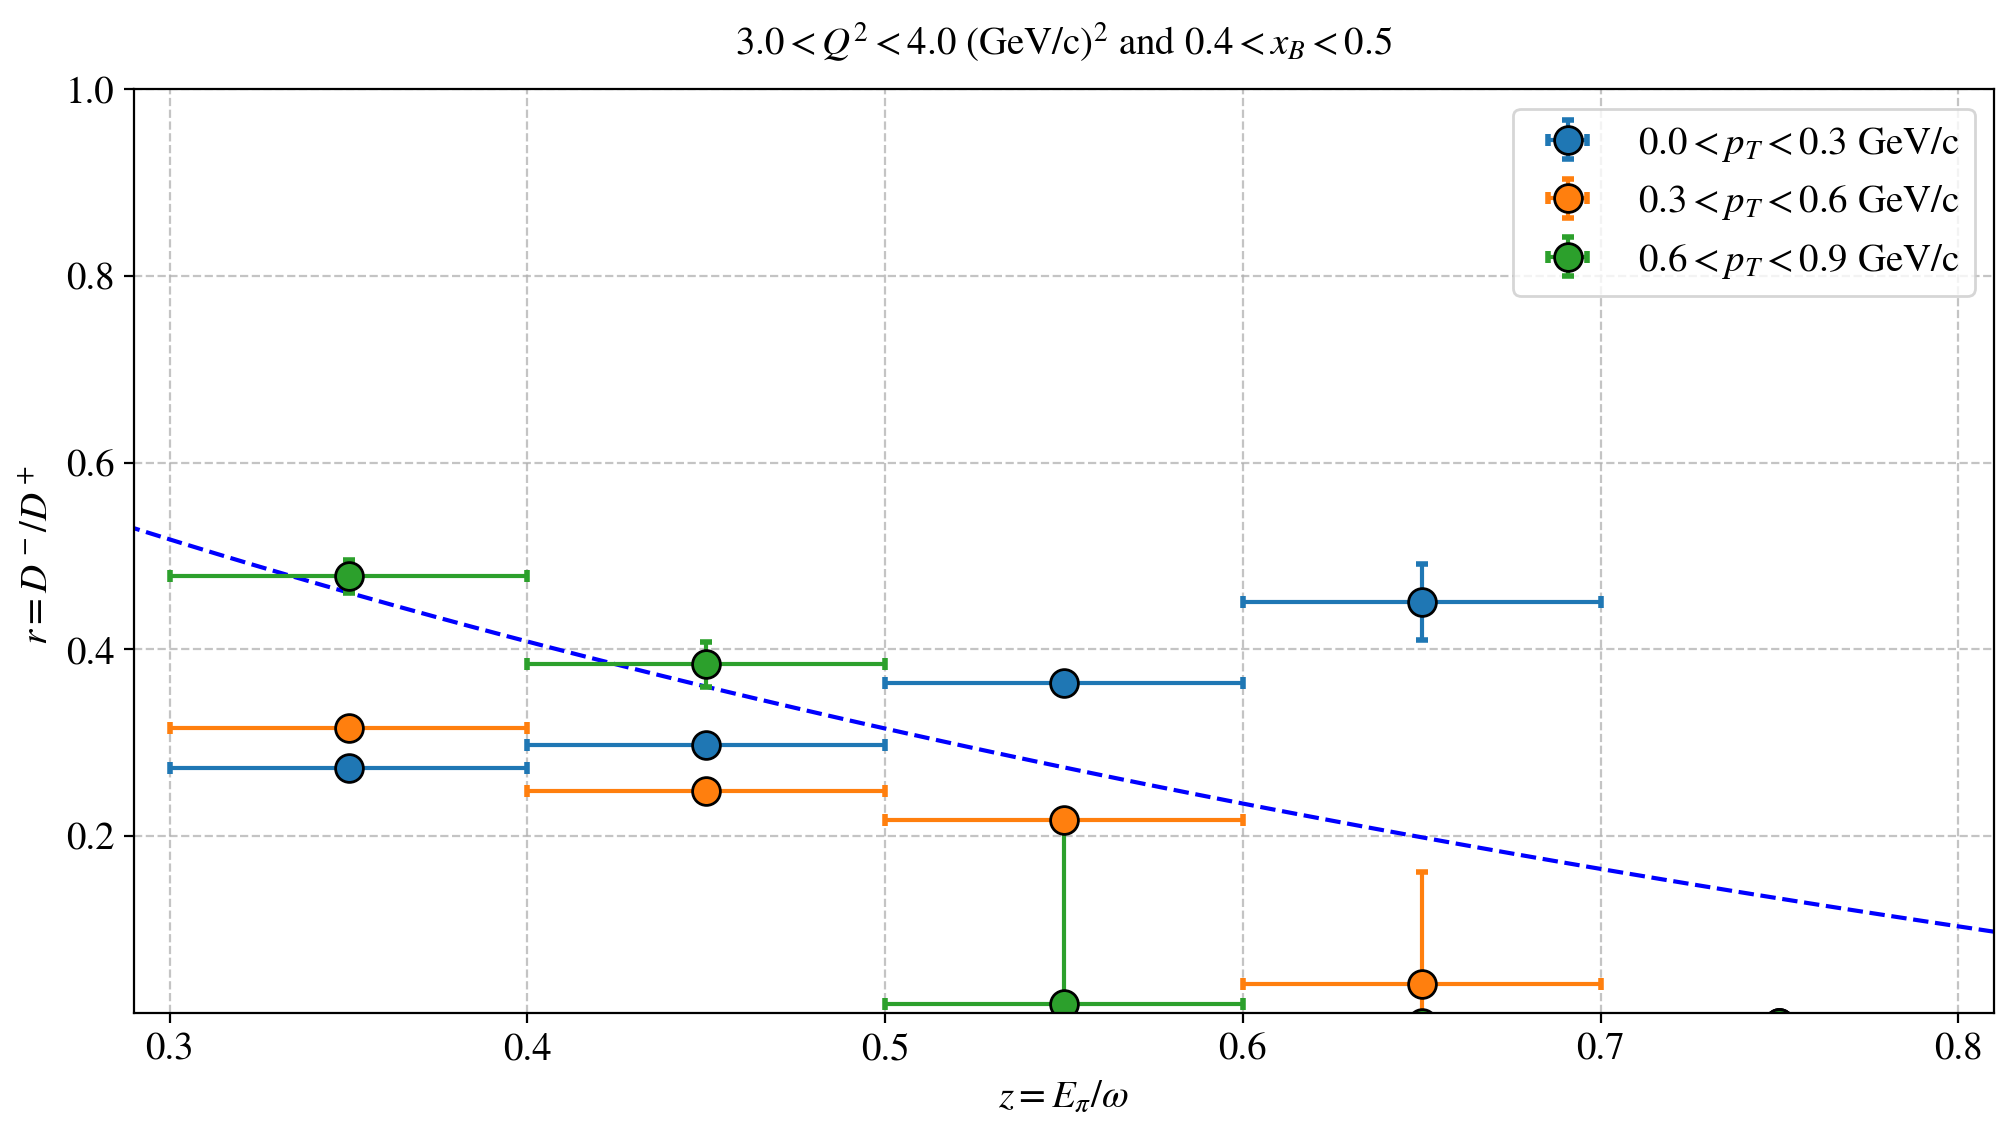

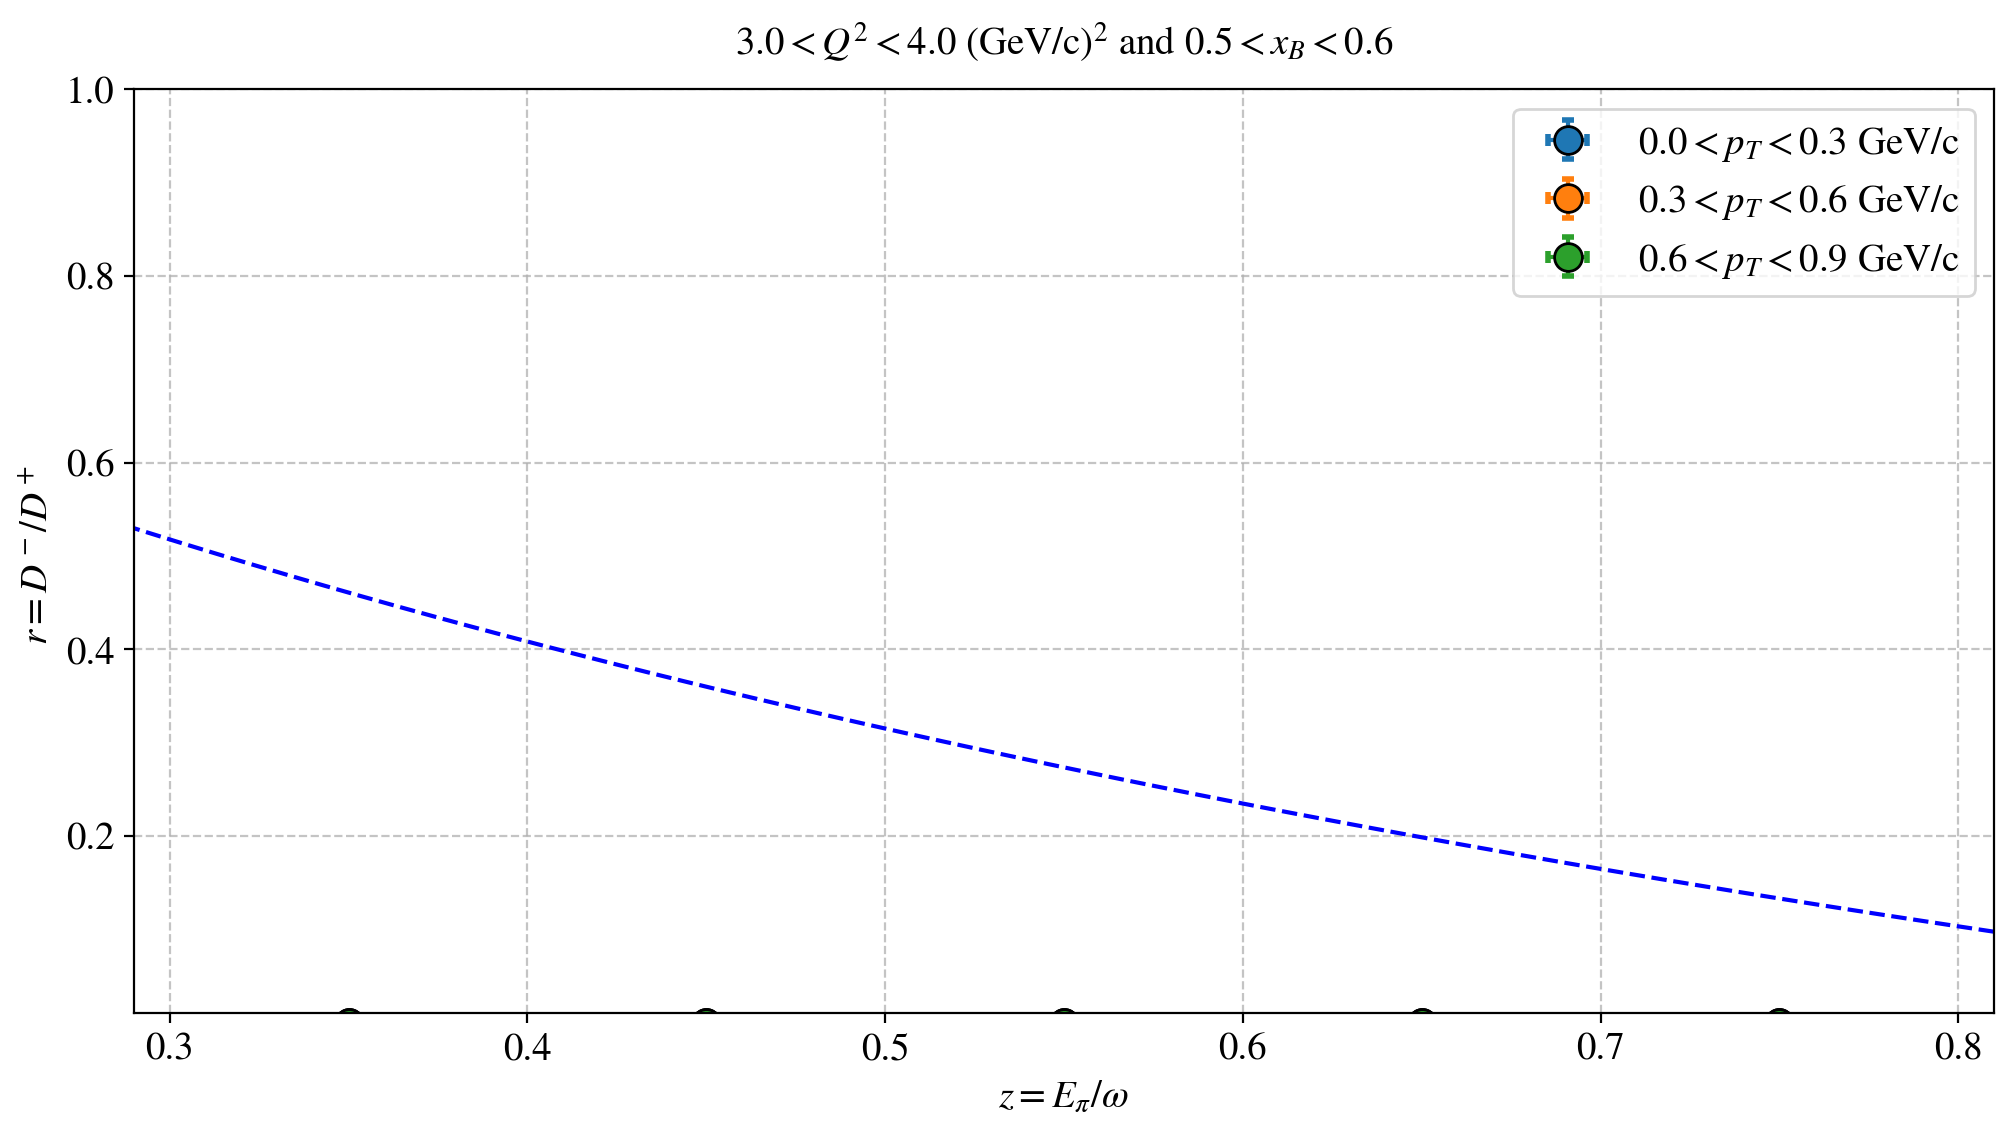

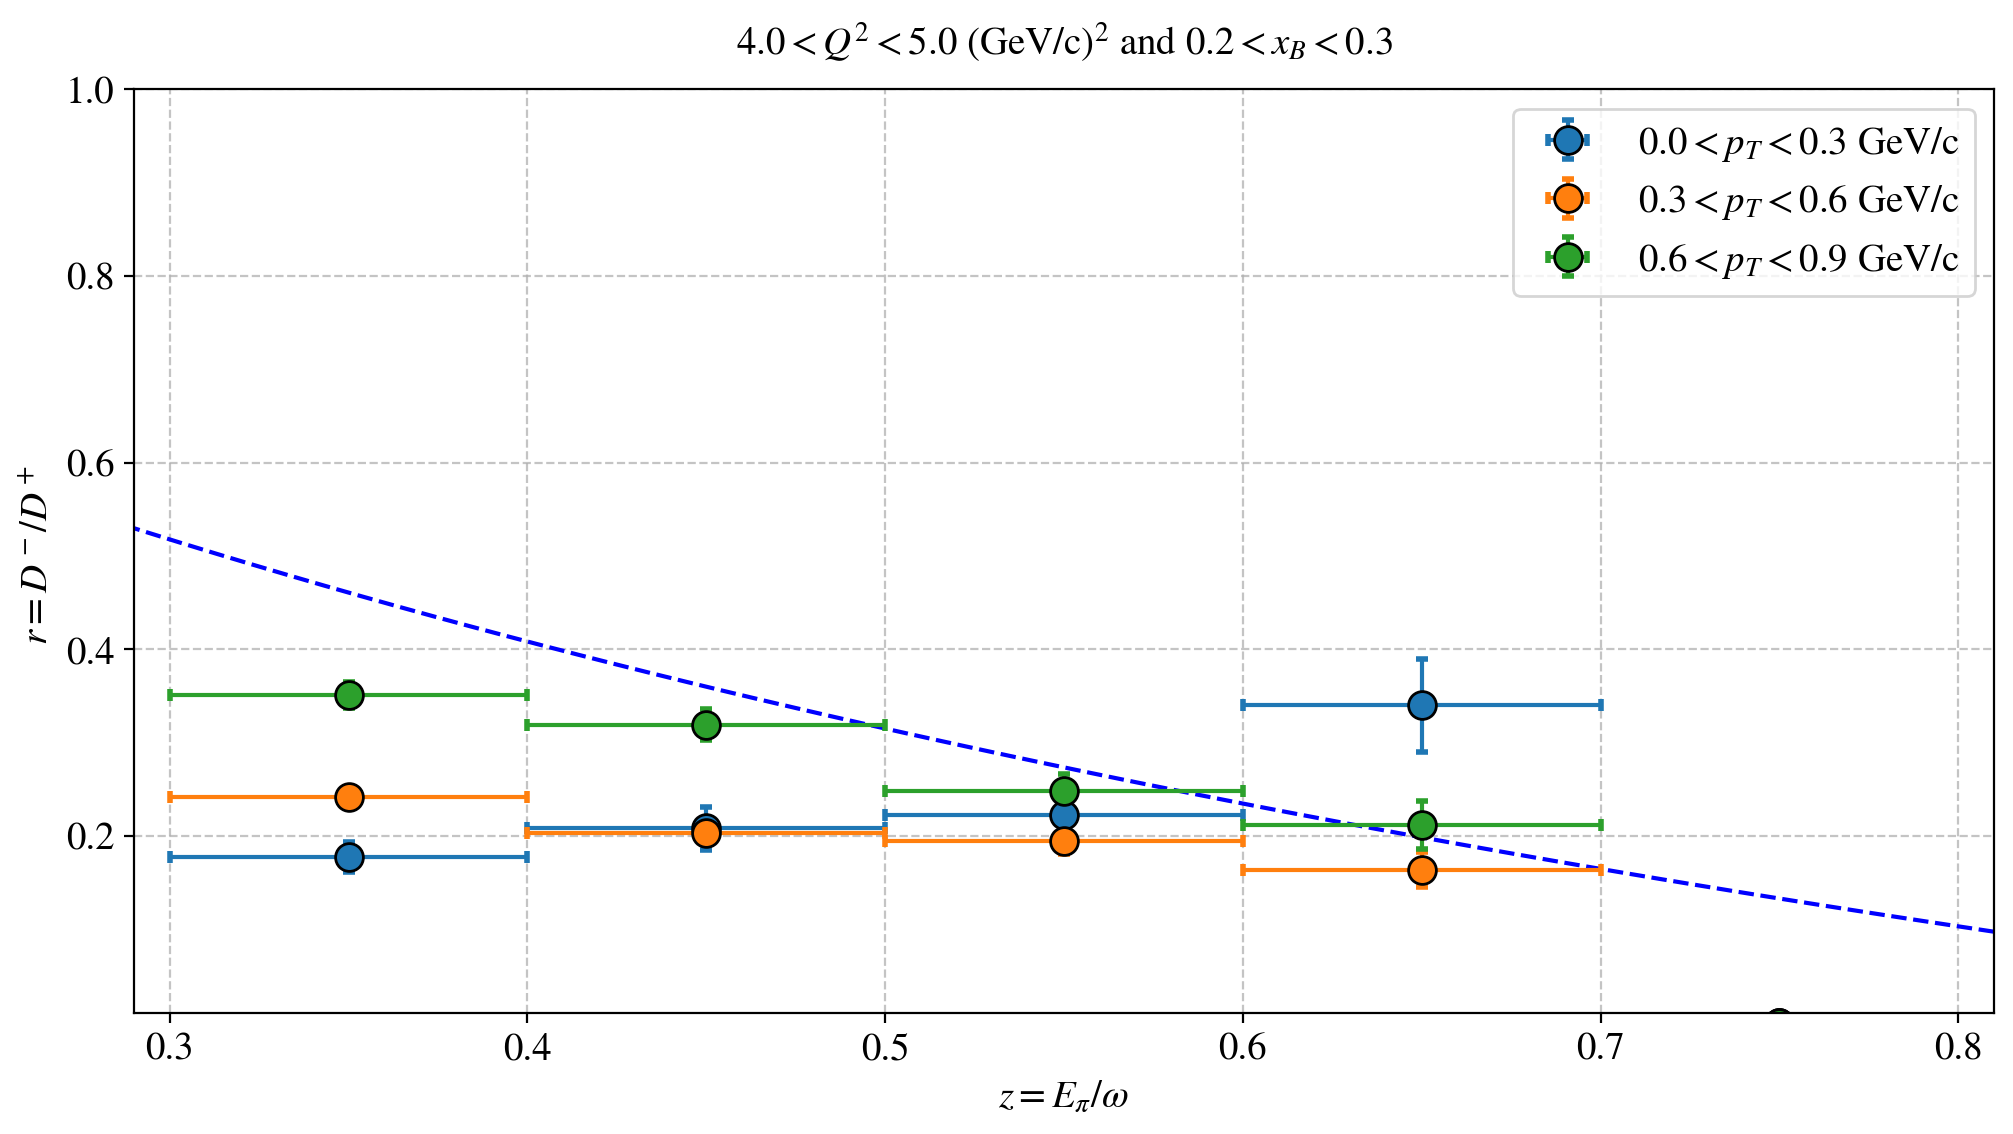

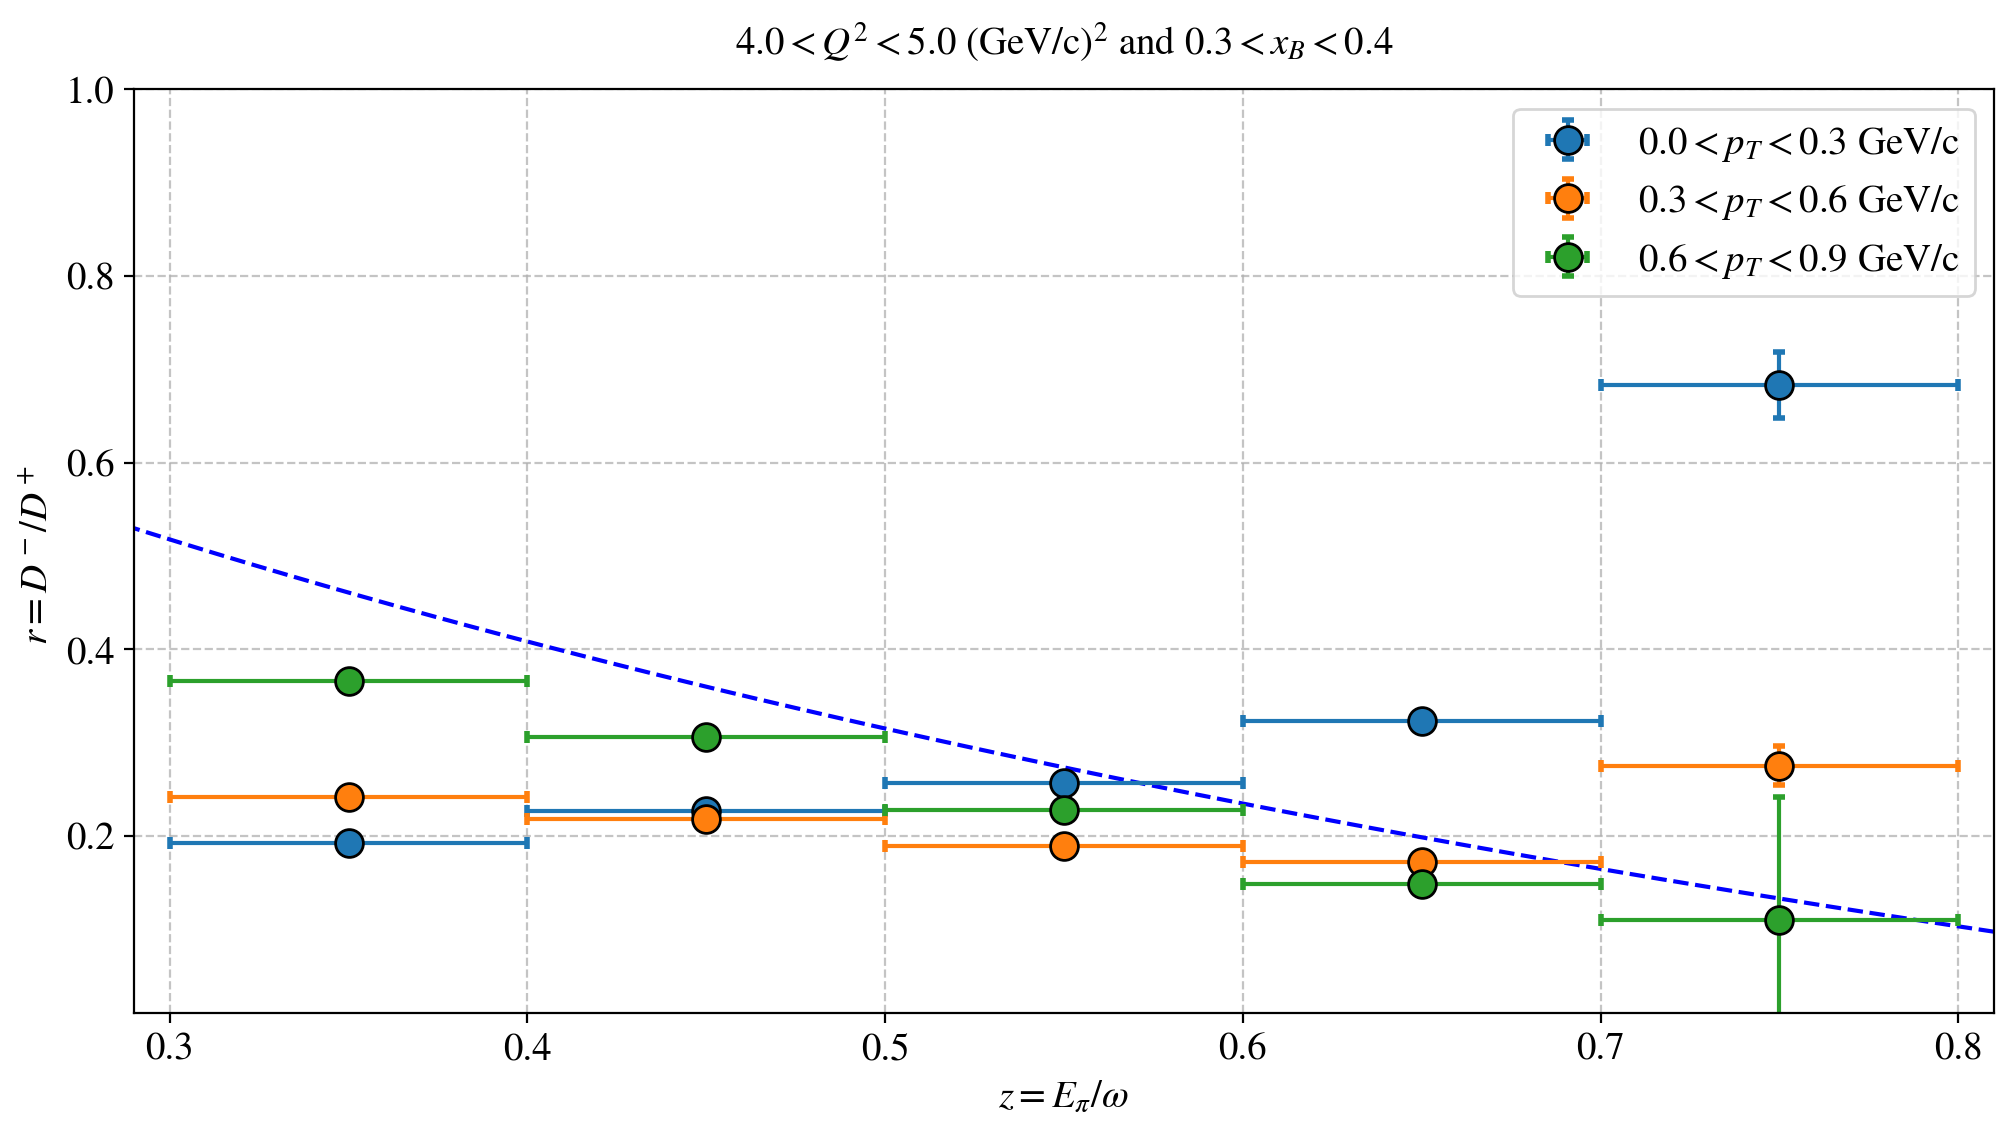

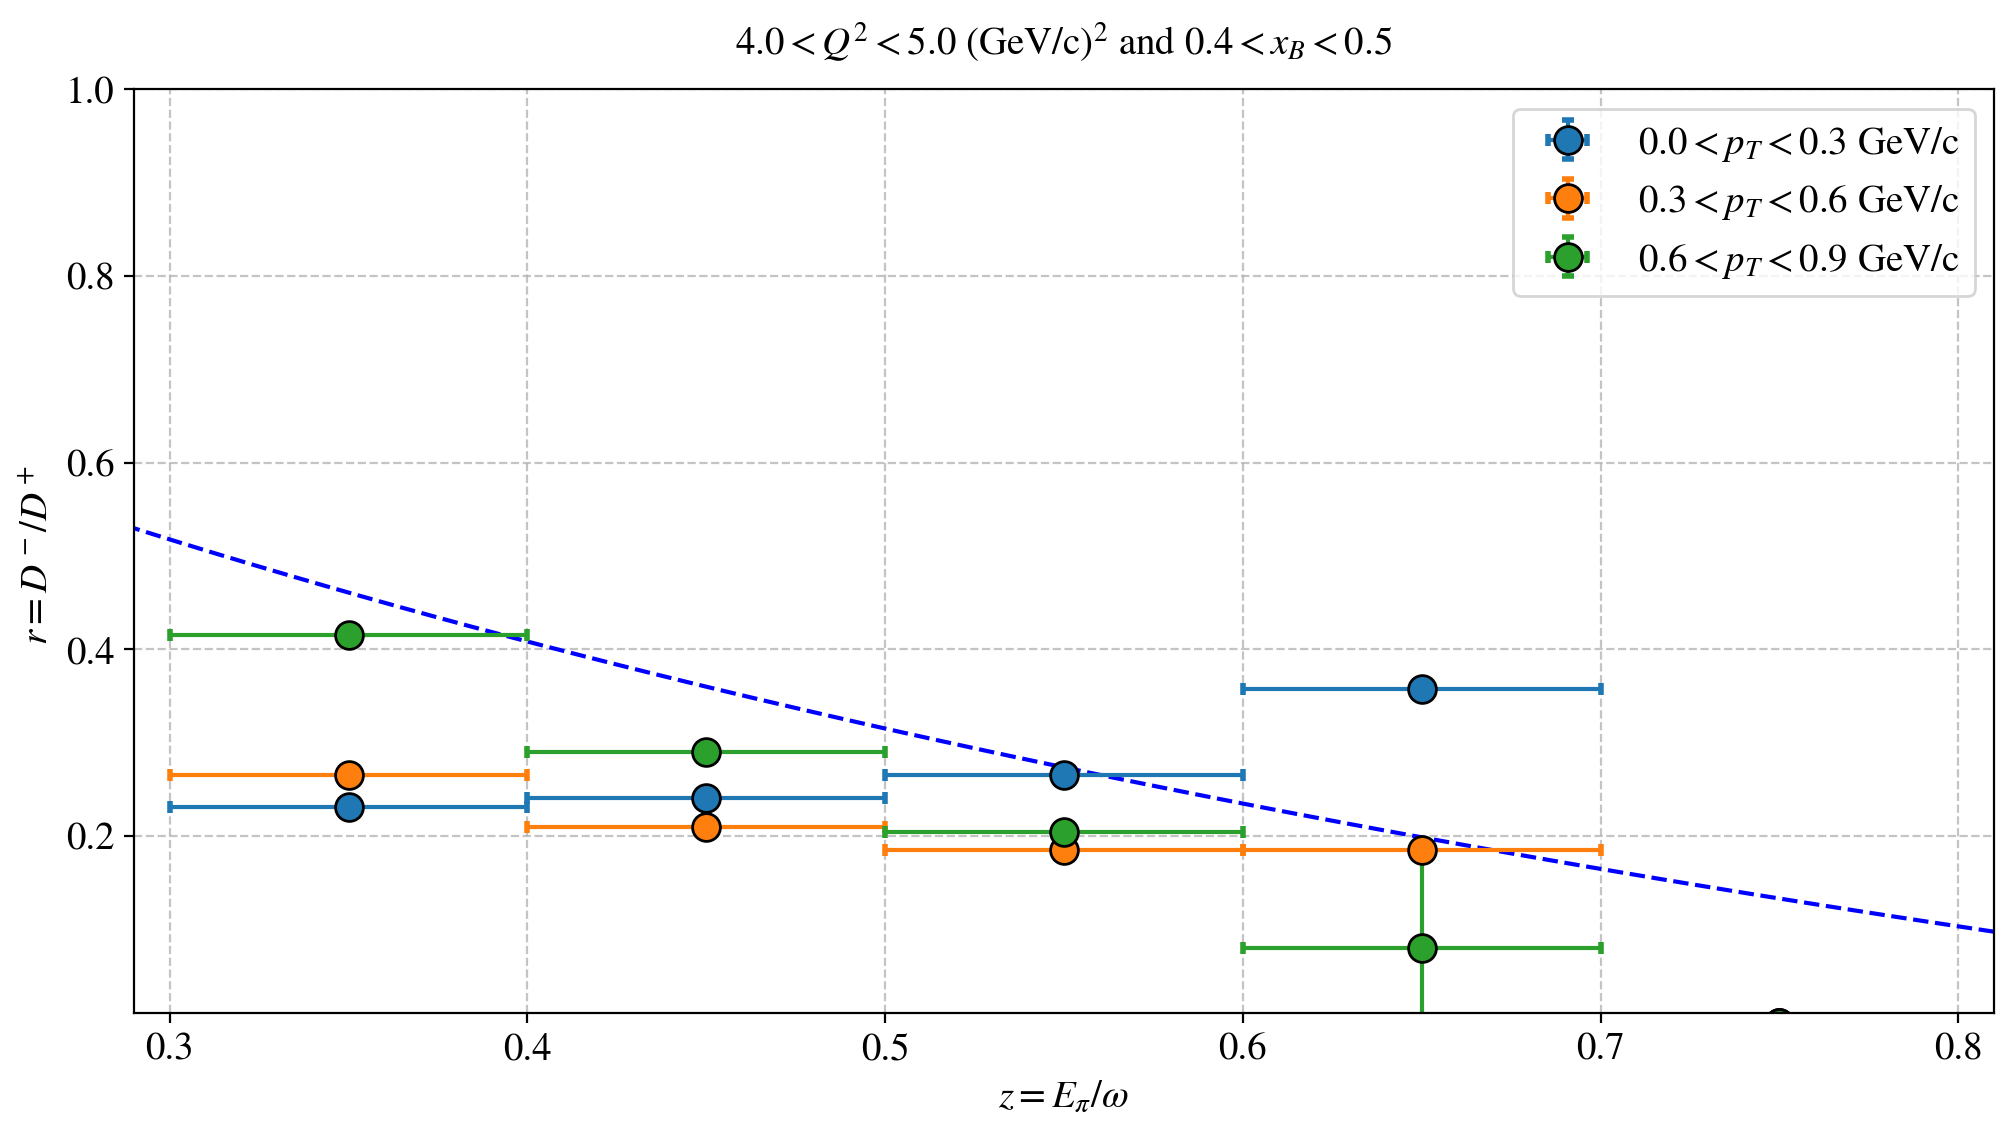

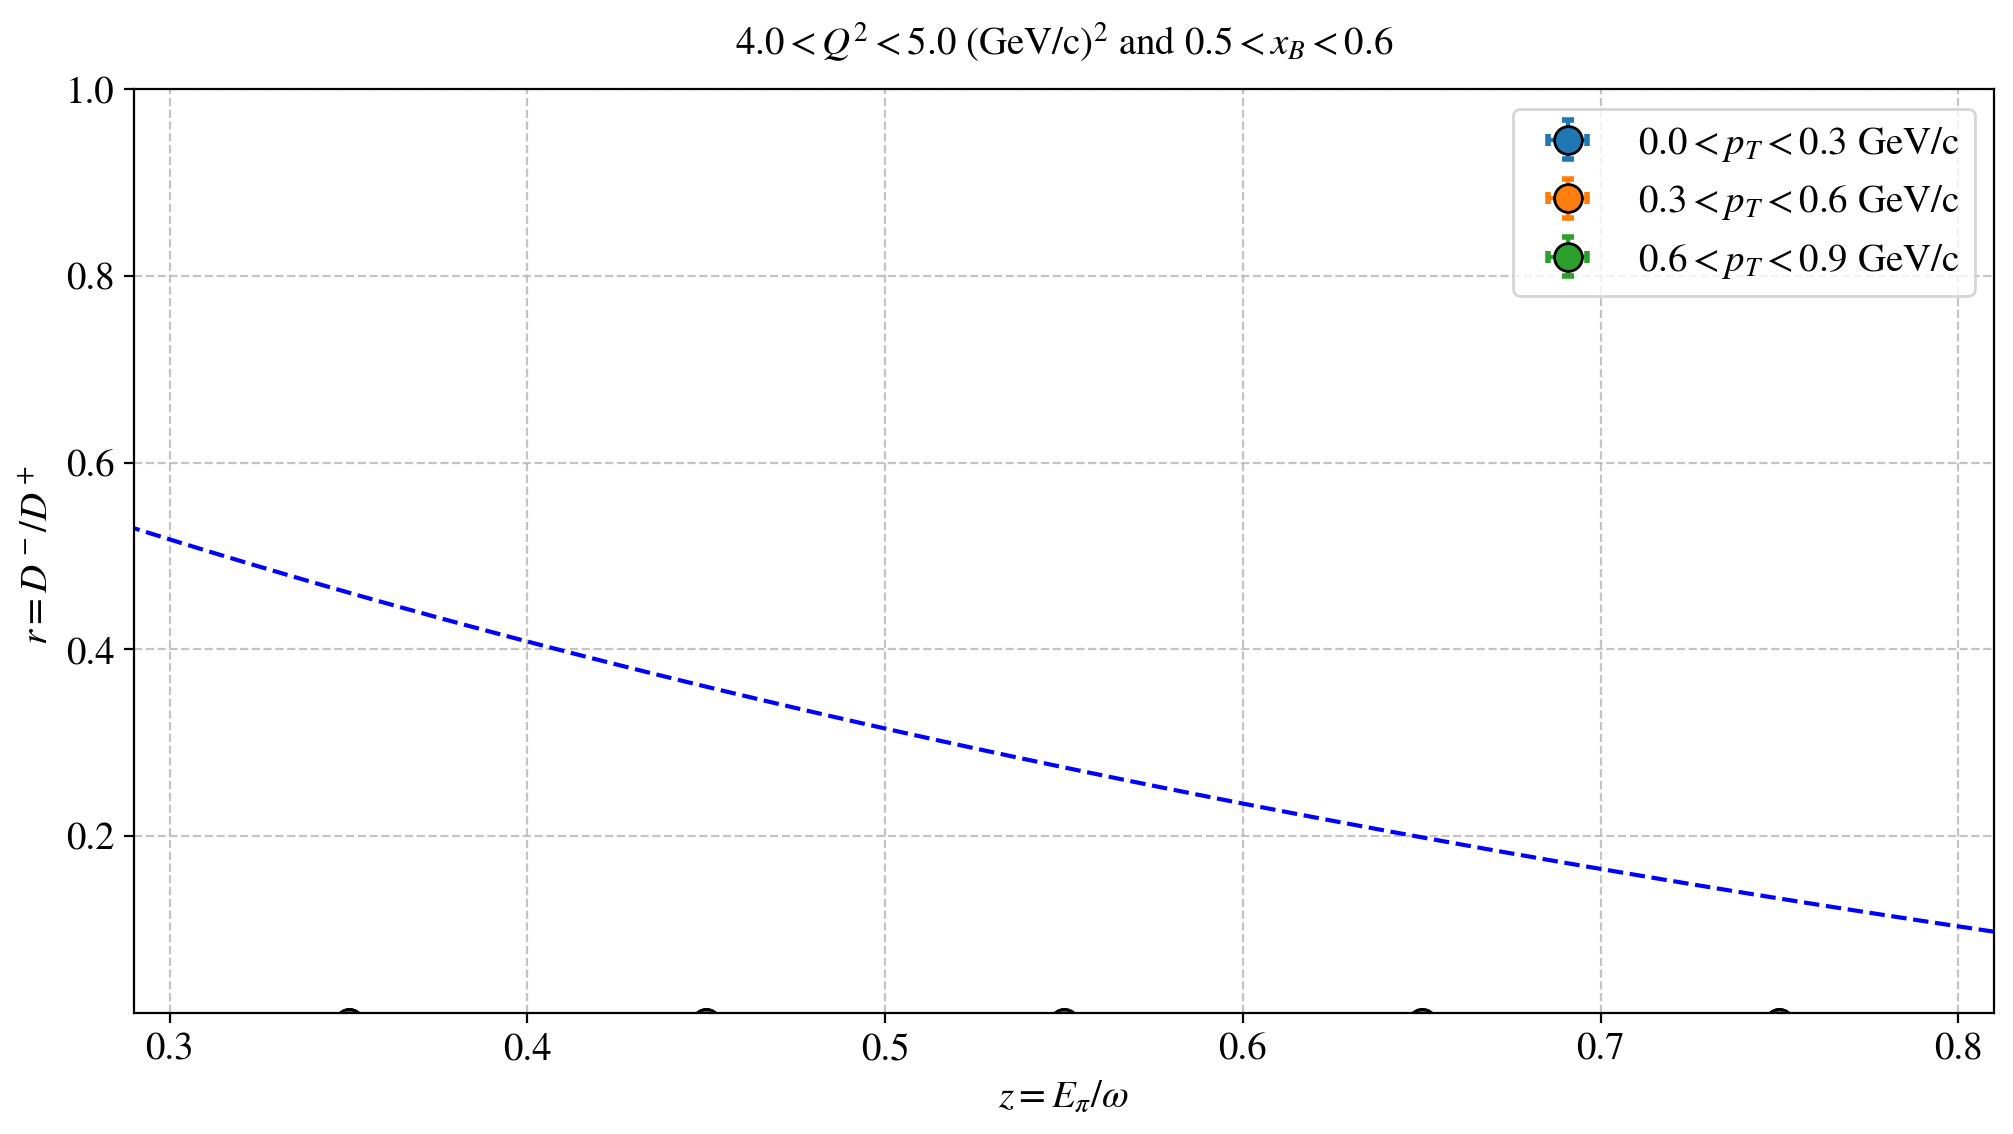

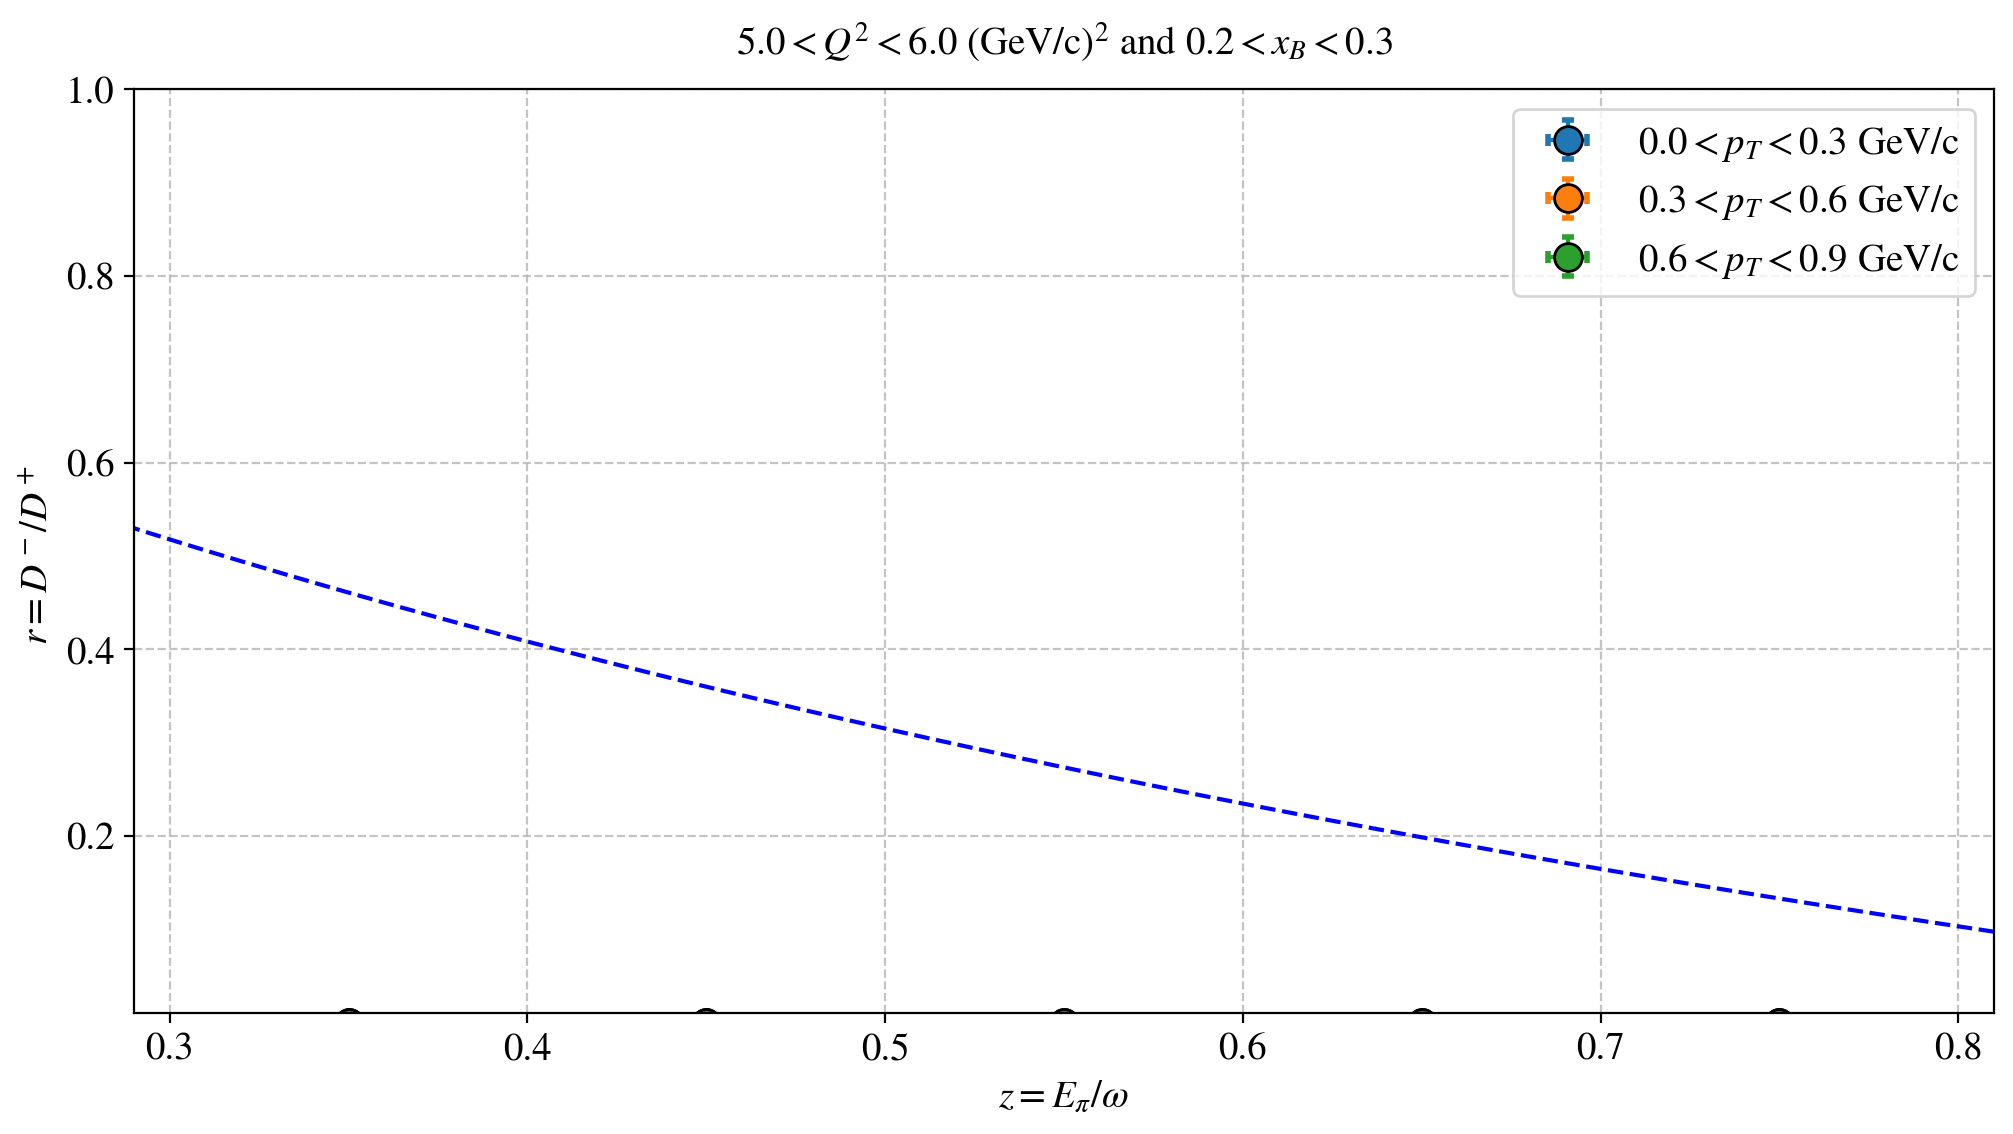

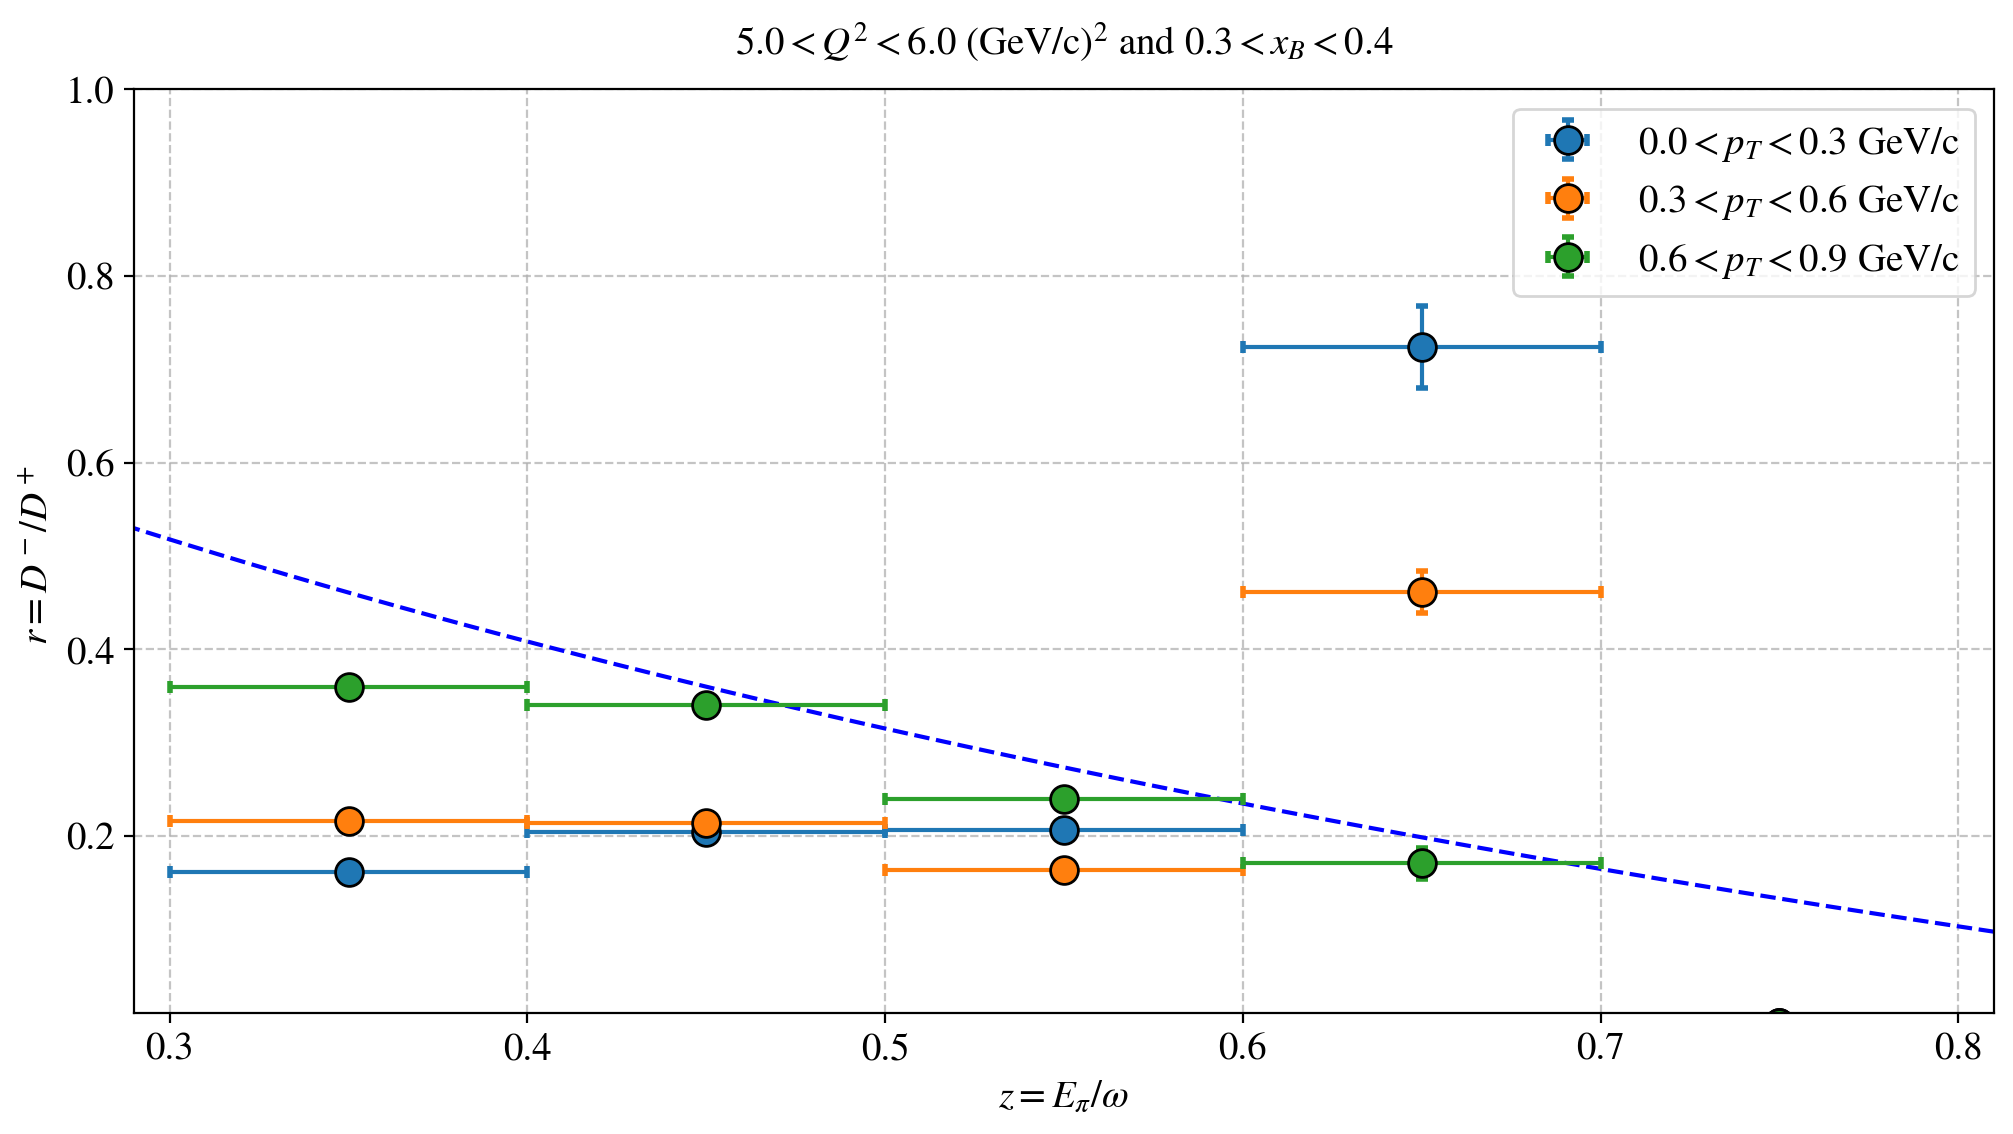

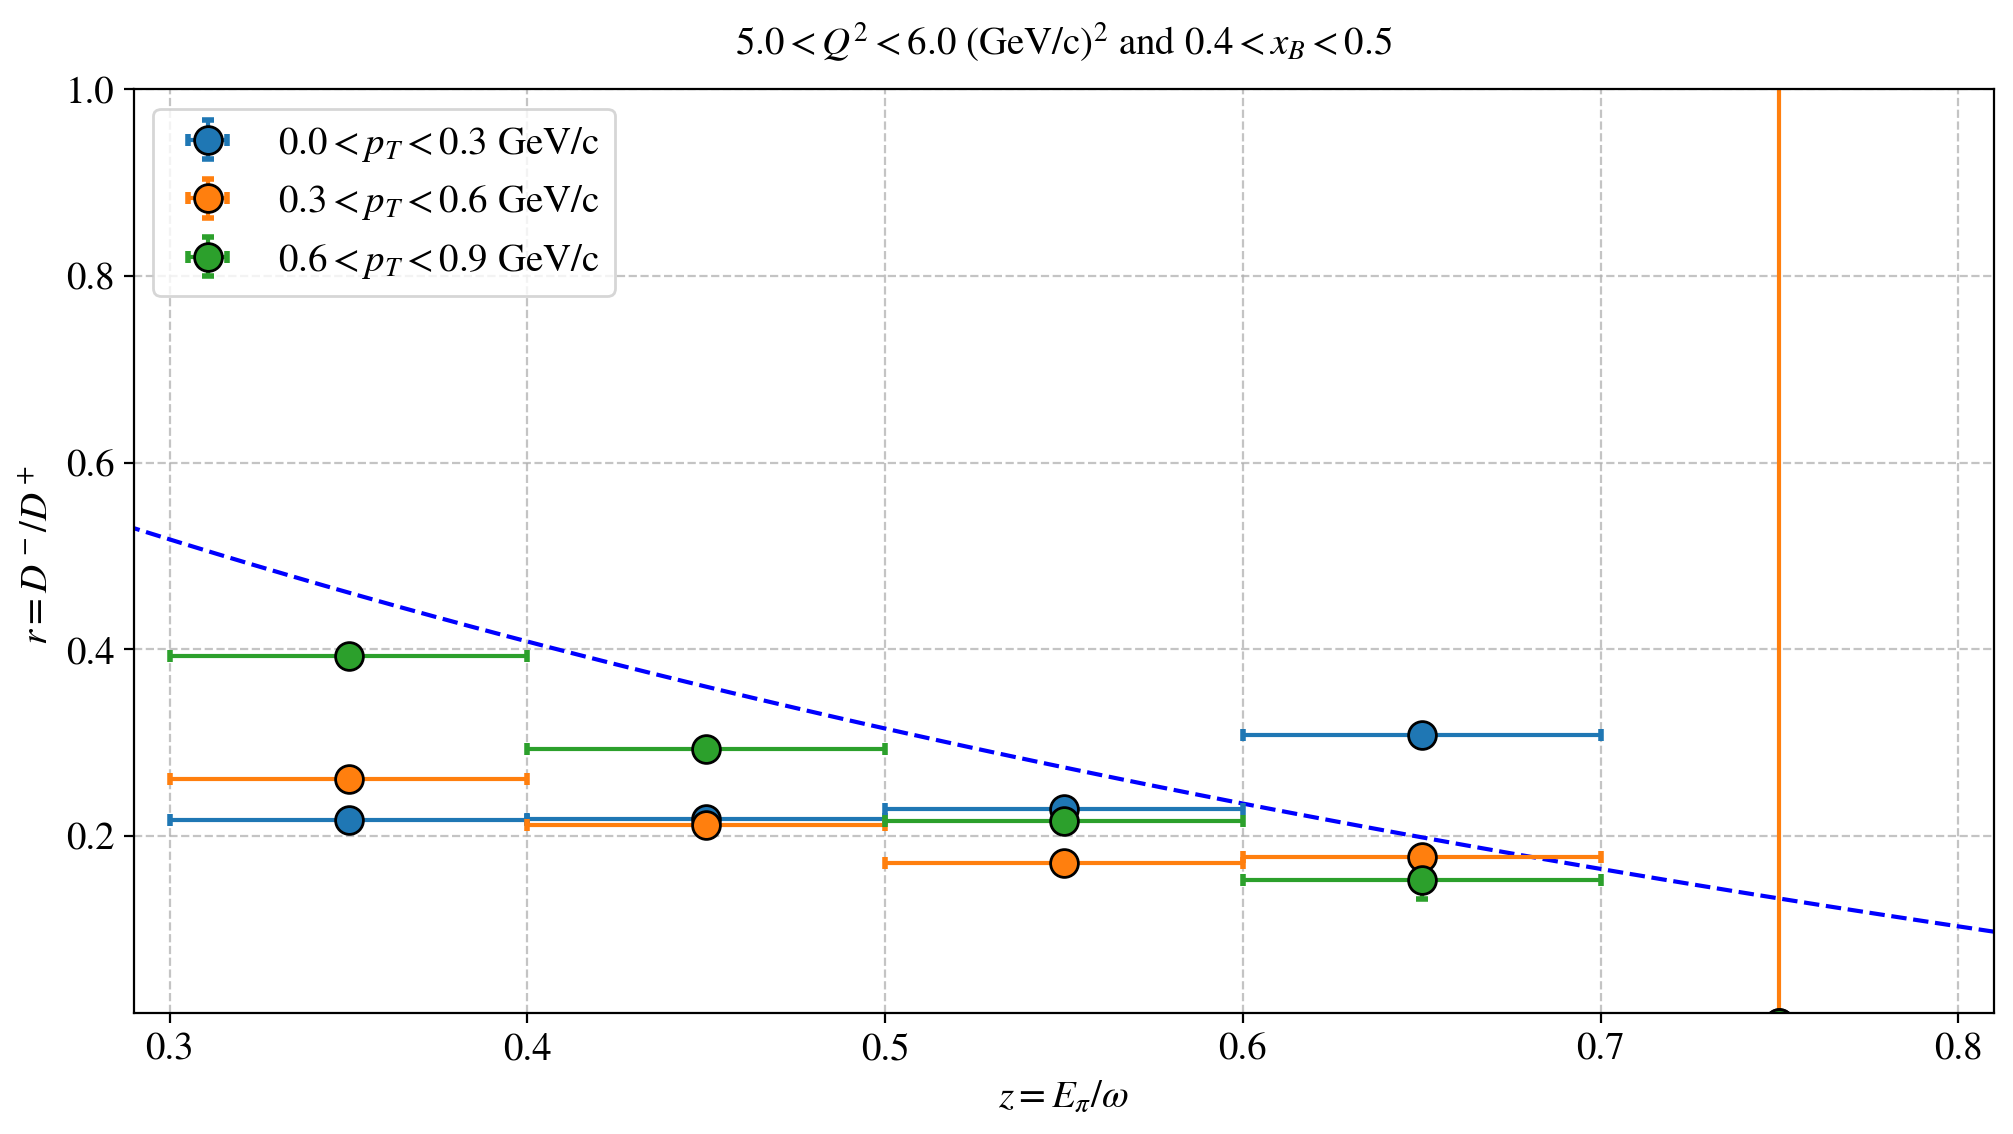

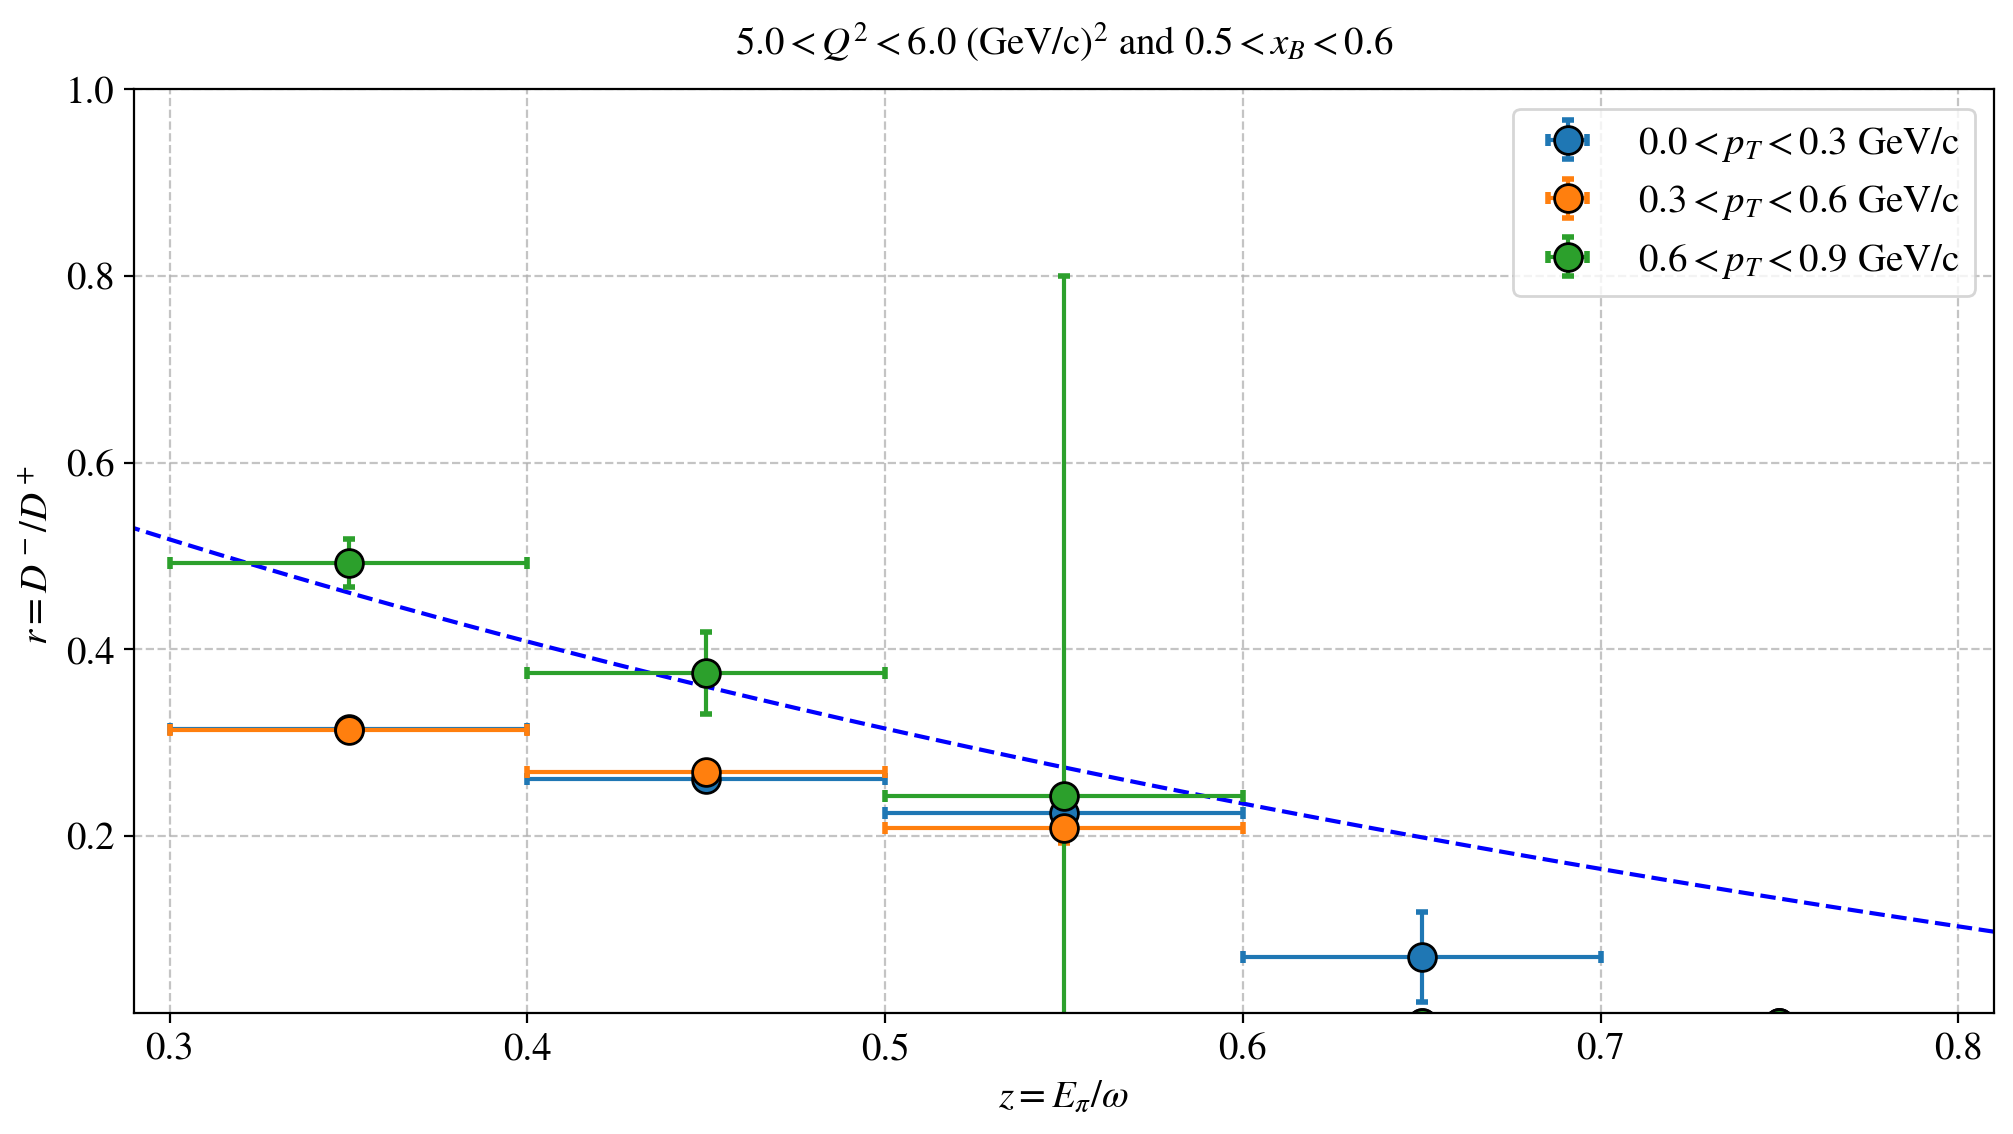

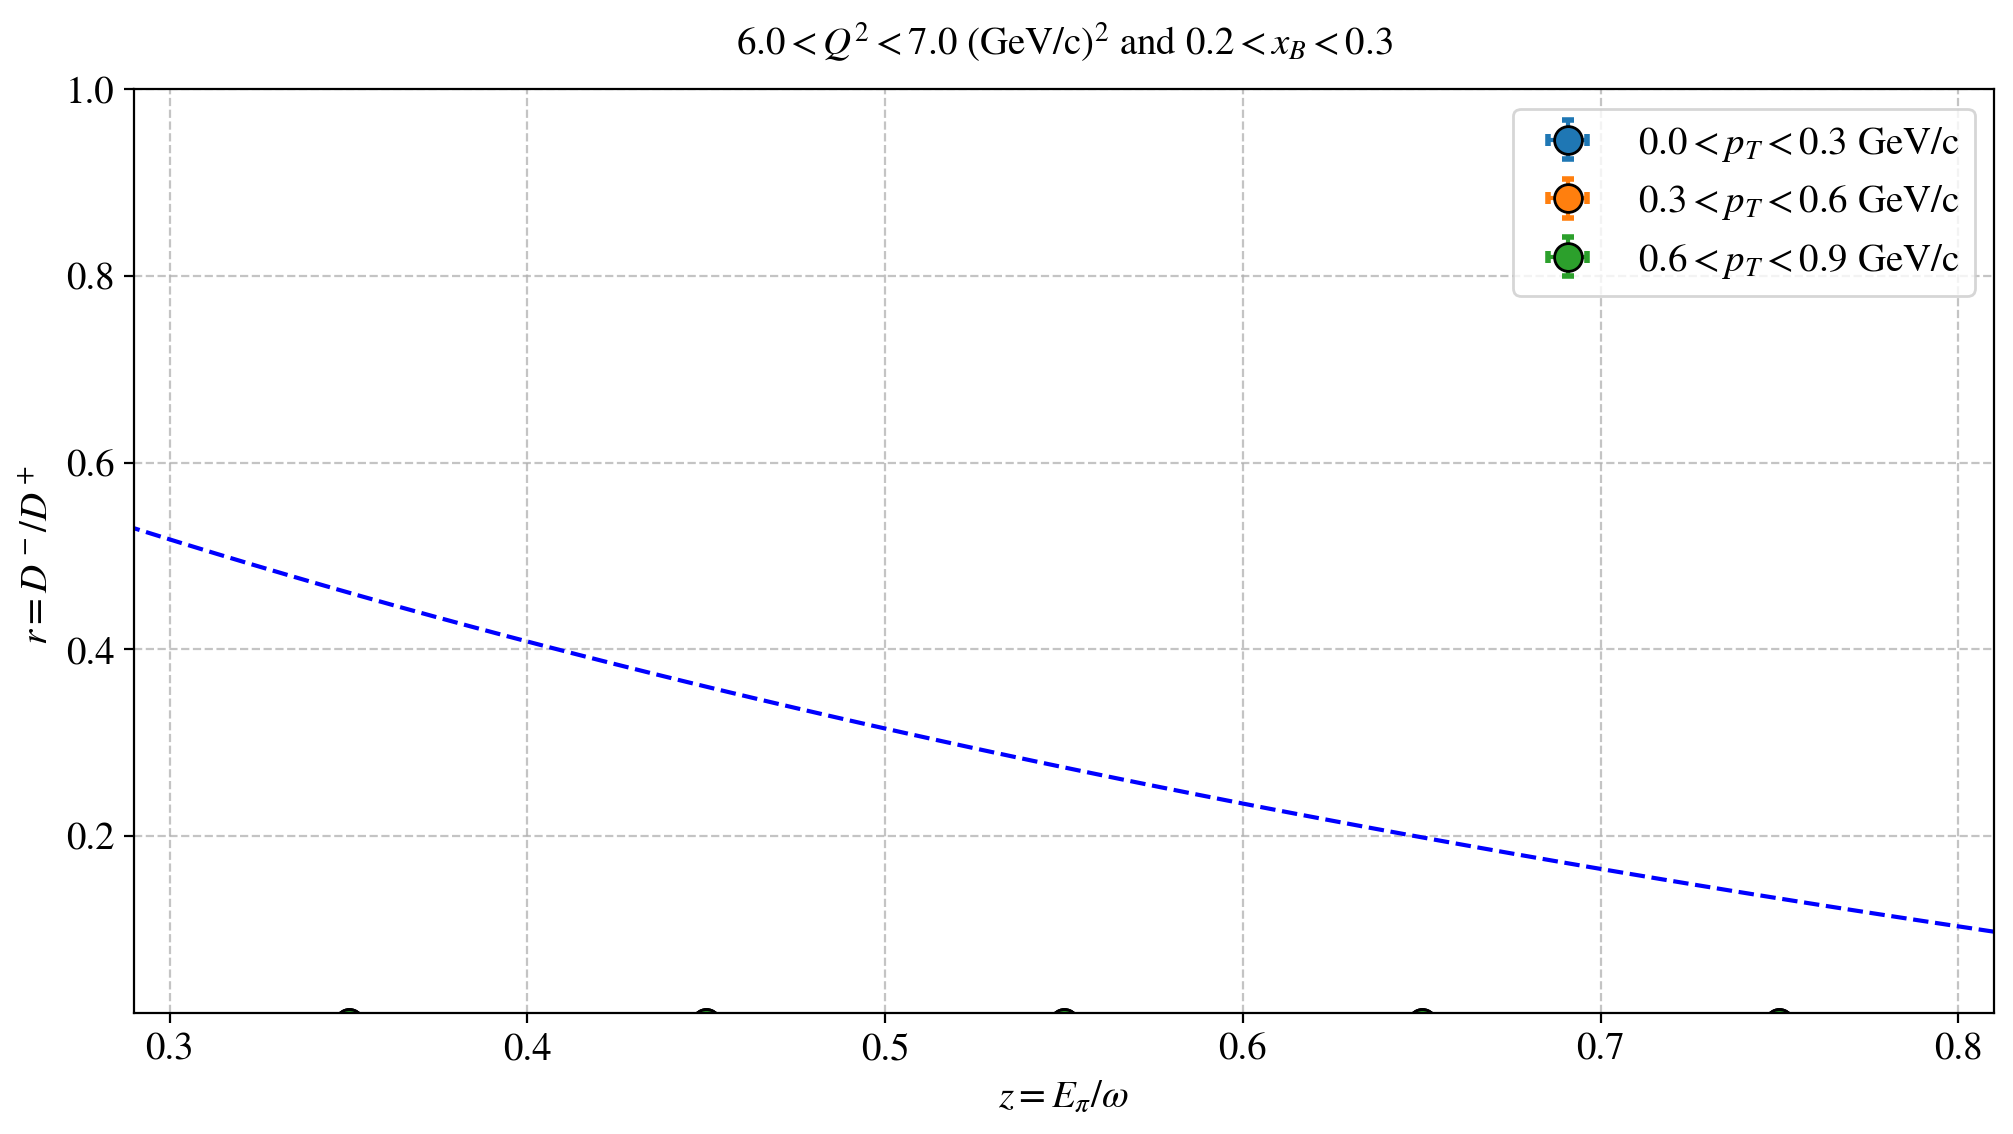

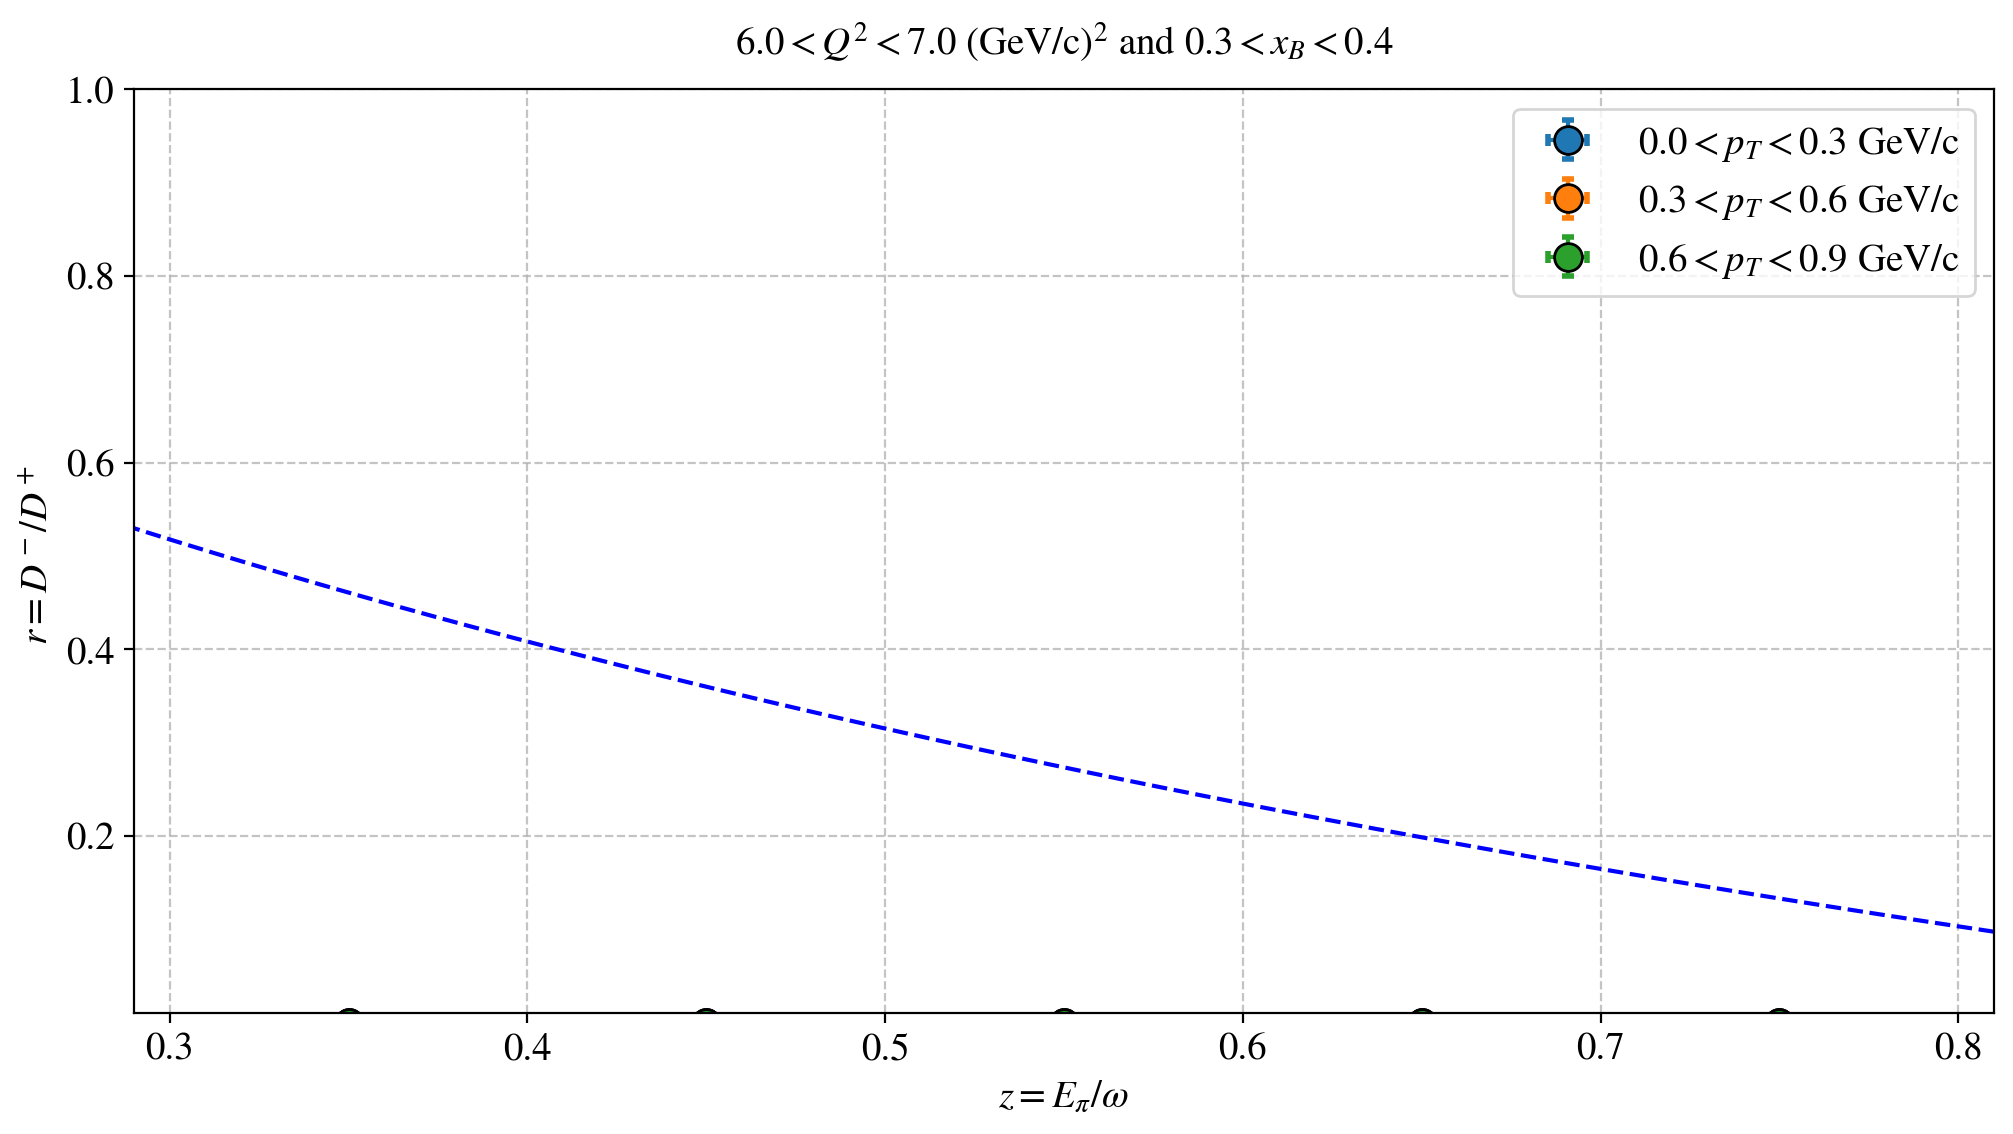

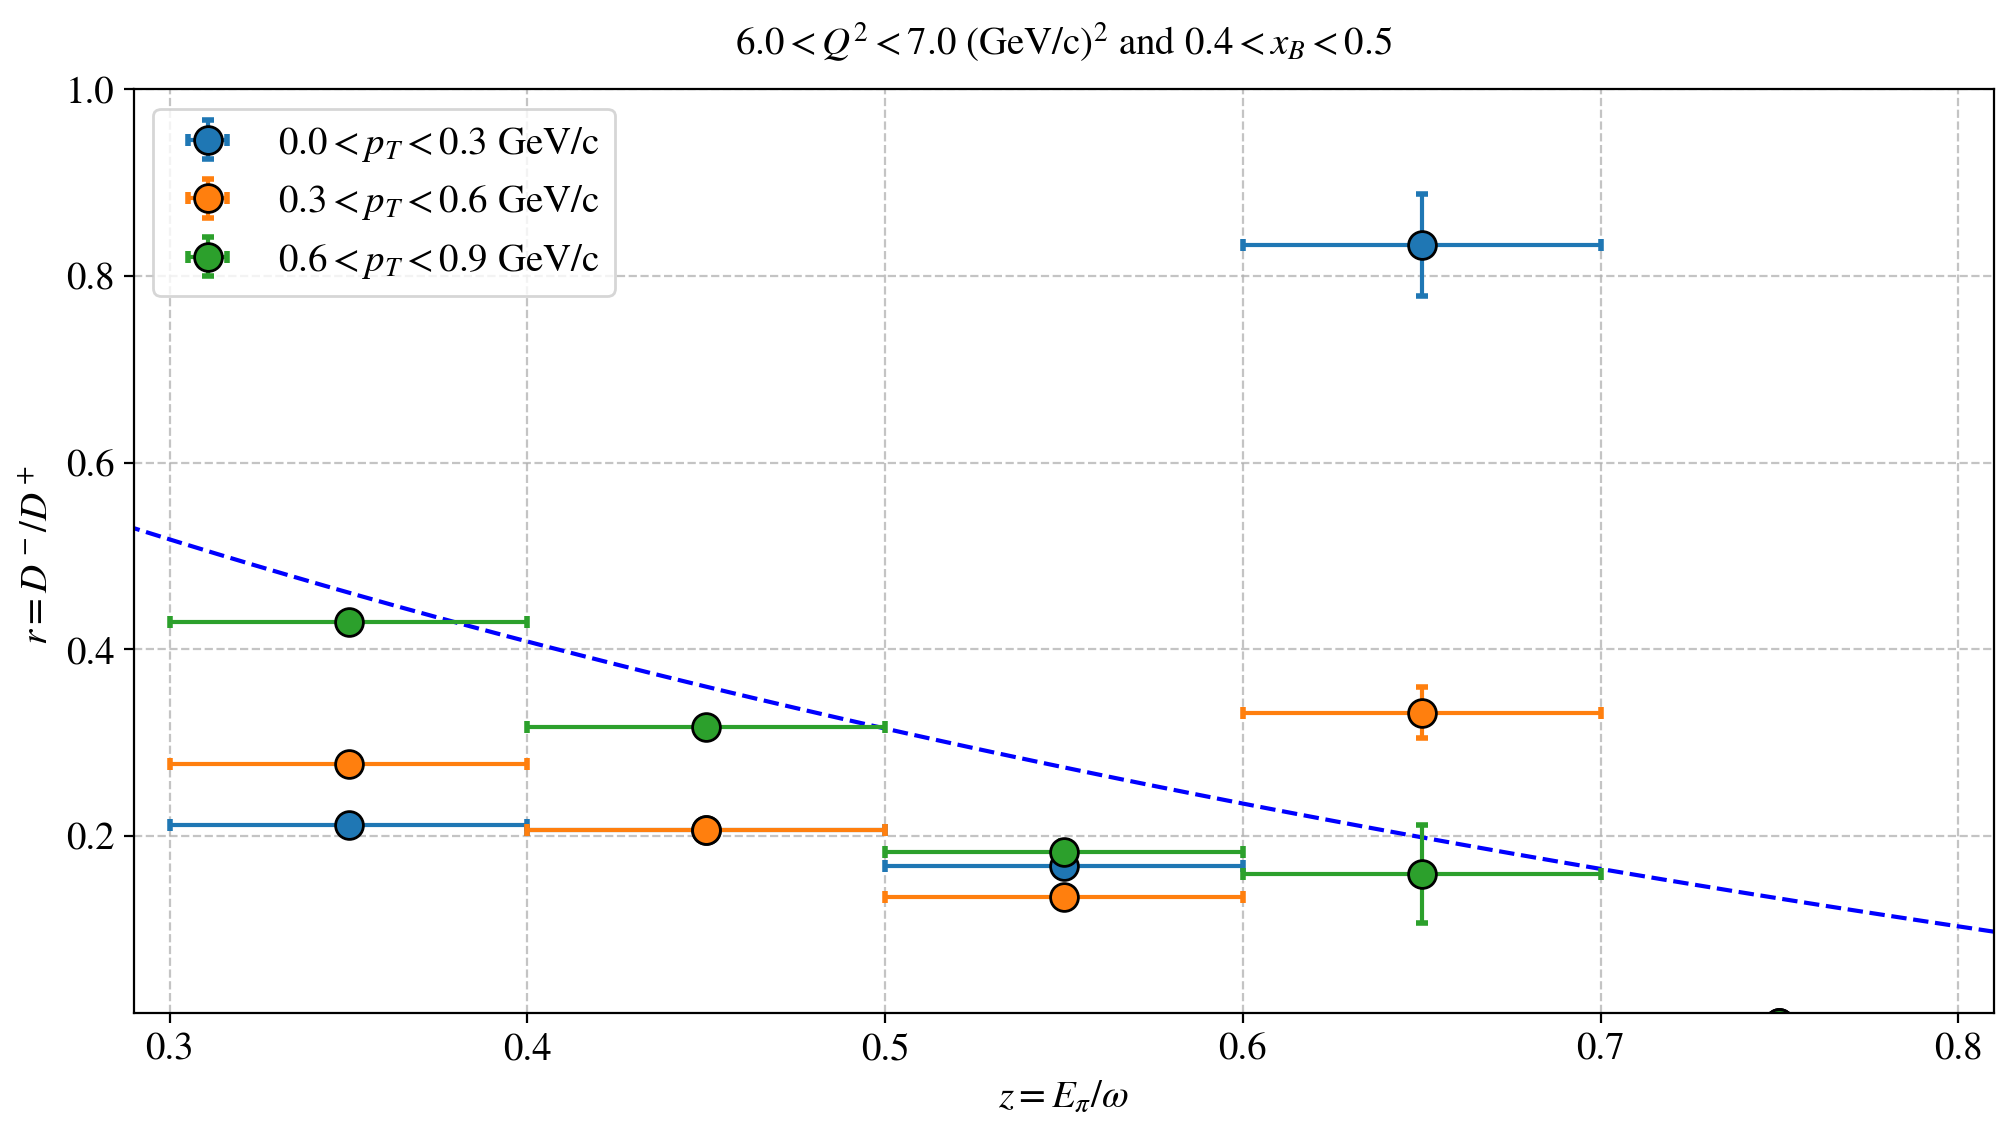

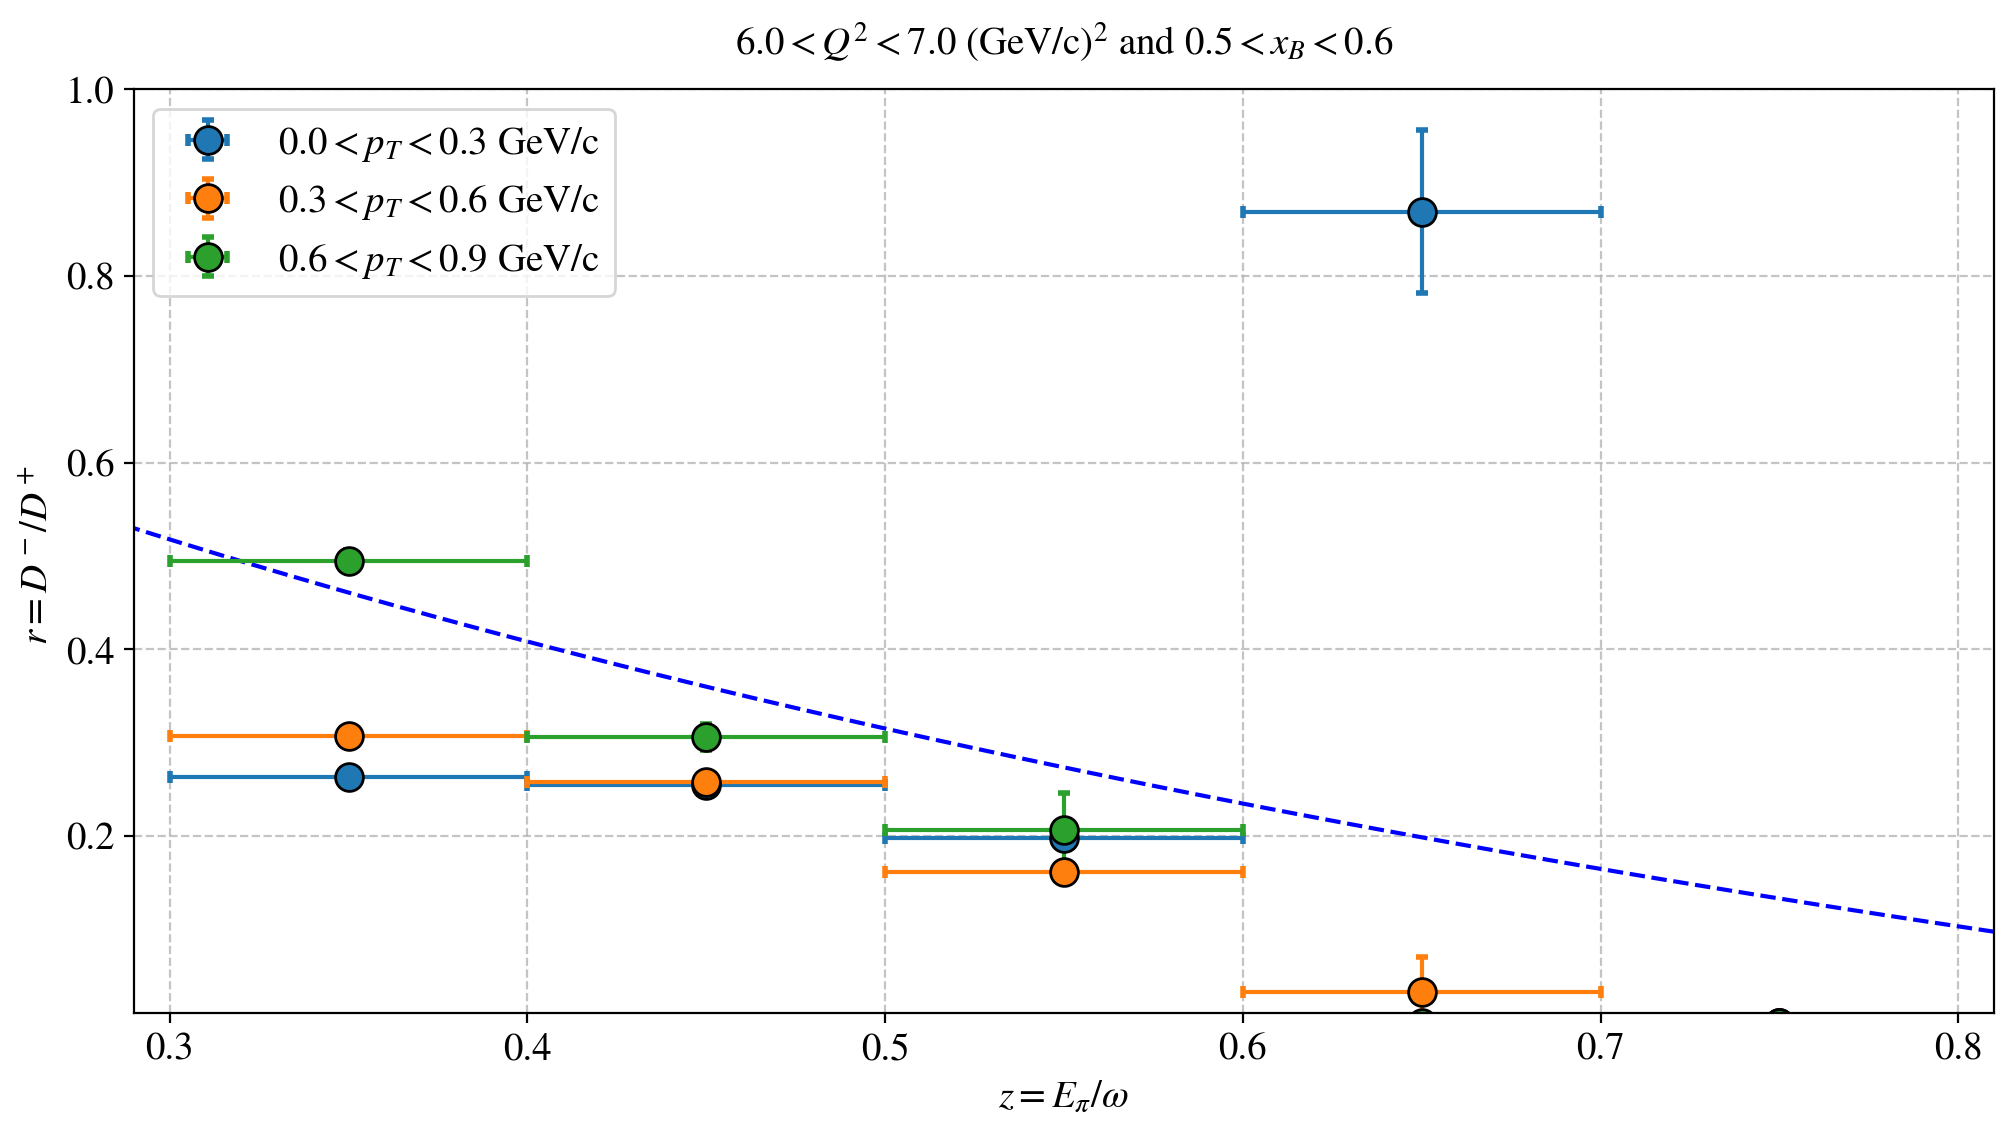

In [18]:
for Q2_min,Q2_max in zip(Q2_min_arr, Q2_max_arr): # zip([Q2_min_arr[0]], [Q2_max_arr[0]]): # 
    for xB_min,xB_max in zip(xB_min_arr, xB_max_arr):
        # print('Q2_min:',Q2_min,',xB_min:',xB_min)
        df_in_bin = df_results_4D[ (np.abs(df_results_4D['$Q^2_{min}$']-Q2_min)<0.01) 
                                             & (np.abs(df_results_4D['$x_B^{min}$']-xB_min)<0.01)]

        fig = plt.figure(figsize=(12,6));
        ax = fig.add_subplot(1,1,1)
        plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')

        for pT_min,pT_max in zip(pT_min_arr, pT_max_arr):
            # print('pT_min:',pT_min)
            
            df    = df_in_bin[df_in_bin['$p_T^{min}$']==pT_min]
            z     = (df['$z_{min}$'] + df['$z_{max}$'])/2
            z_err = (df['$z_{max}$'] - df['$z_{min}$'])/2
            r     = df['$r$']
            r_err = df['$\\Delta r$']
            
            # if np.abs(Q2_min-3)<0.01 and np.abs(xB_min-0.3)<0.01: print(df)
            if len(r)>0:
                plot_r_vs_z_and_fit_to_rFF( z, z_err, r, r_err, 
                                           ax=ax, label='$%.1f<p_T<%.1f$ GeV/c'%(pT_min,pT_max), 
                                           do_plot_fit=False, do_add_fit_to_label=False )


        set_axes(ax,'$z=E_\pi/\omega$ ','$r=D^-/D^+$ ',
                     title='$%.1f < Q^2 < %.1f$ (GeV/c)$^2$ and $%.1f < x_B < %.1f$'%(Q2_min,Q2_max,xB_min,xB_max),do_add_grid=True, do_add_legend=True,fontsize=14, 
                 xlim=(0.29,0.81), ylim=(0.01,1));
        
        save_figure( filename = figures_path + 'fragmentation_r_%.1f_Q2_%.1f_and_%.1f_xB_%.1f'%(Q2_min,Q2_max,xB_min,xB_max) + '.pdf' )

In [19]:
import seaborn as sns

/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_72132/982003784.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_72132/982003784.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_72132/982003784.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_72132/982003784.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivotted = df.pivot('Y','X','Z')
/var/folders/b4/rpy8fcnx1yx951cj3jxv3cm80000gn/T/ipykernel_72132/982003784.py:20: FutureWarning: In a future version of pandas all a

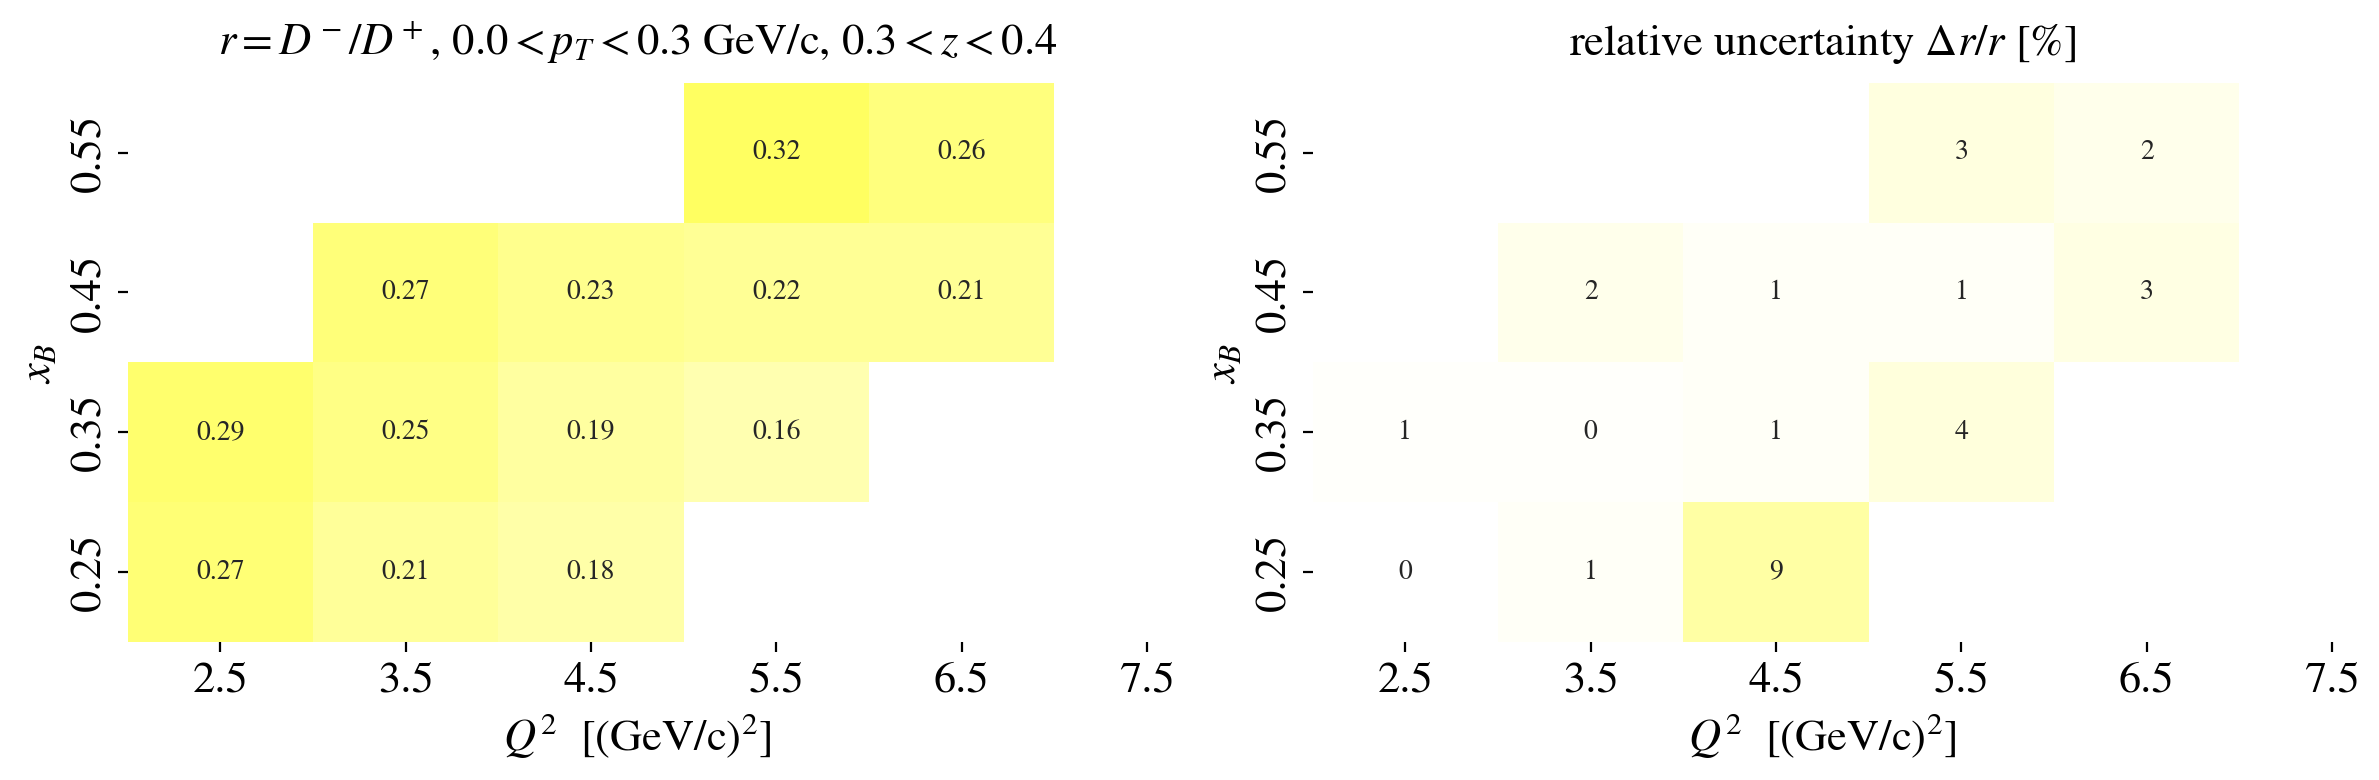

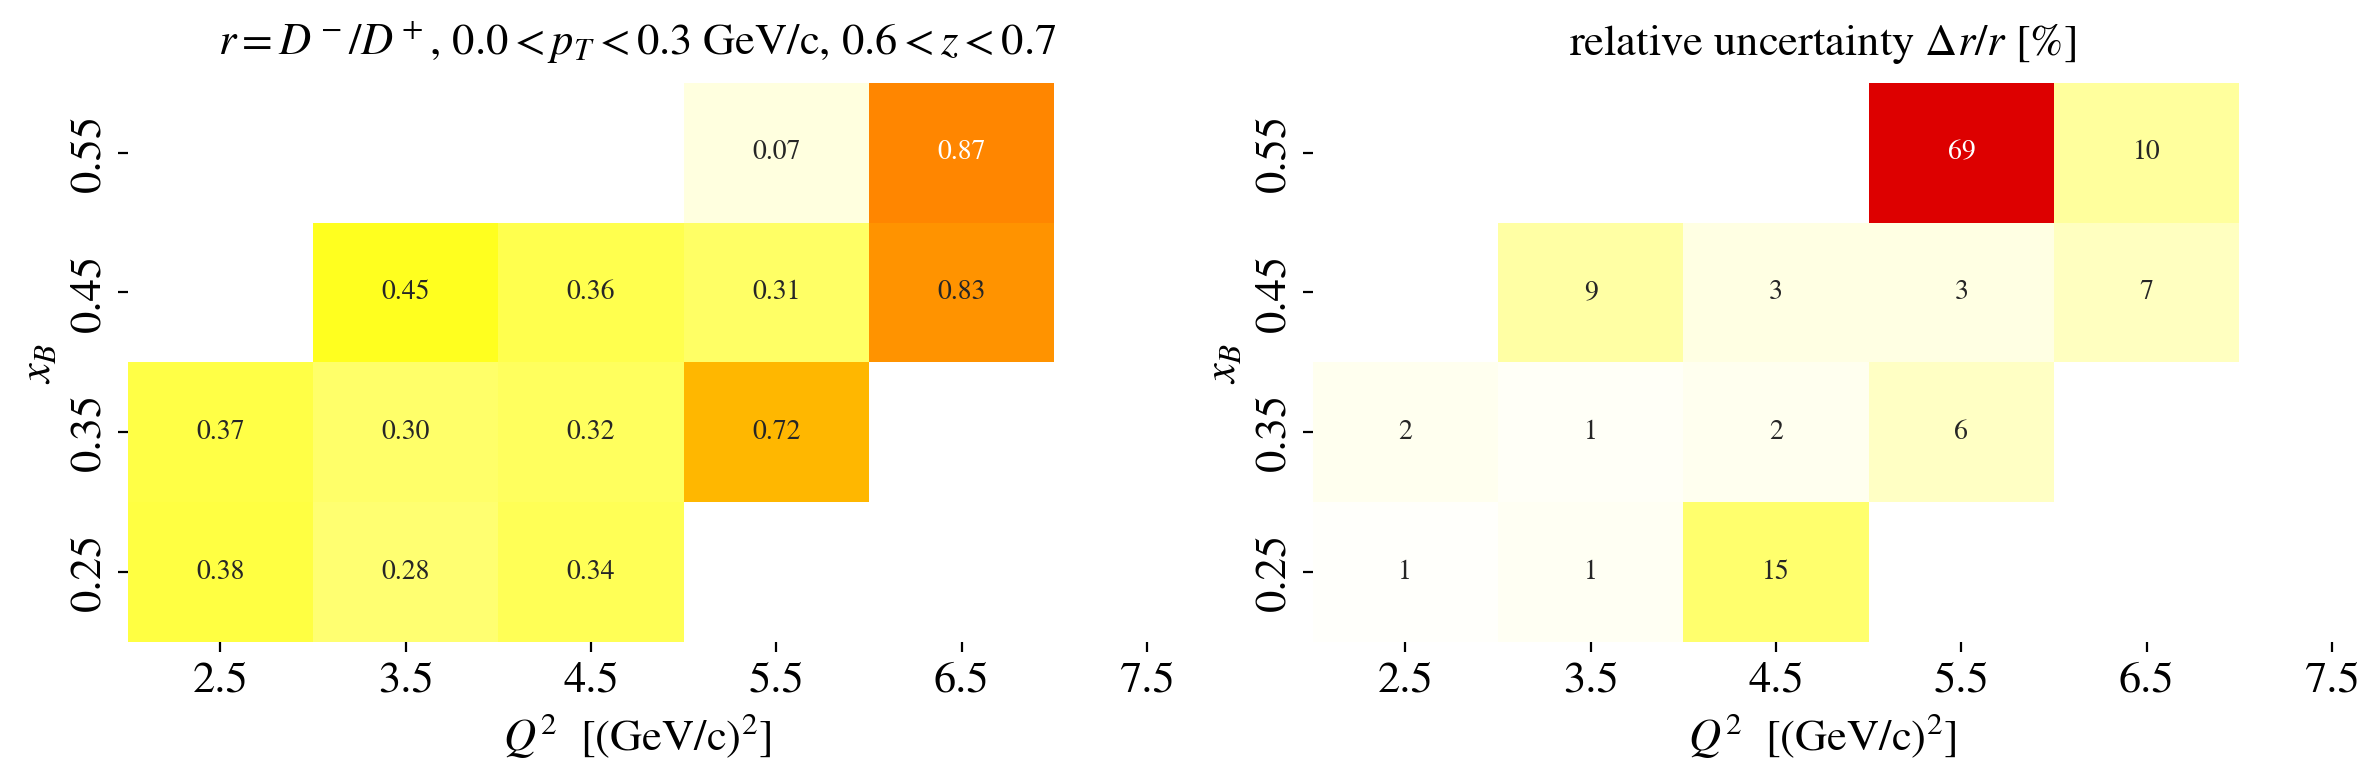

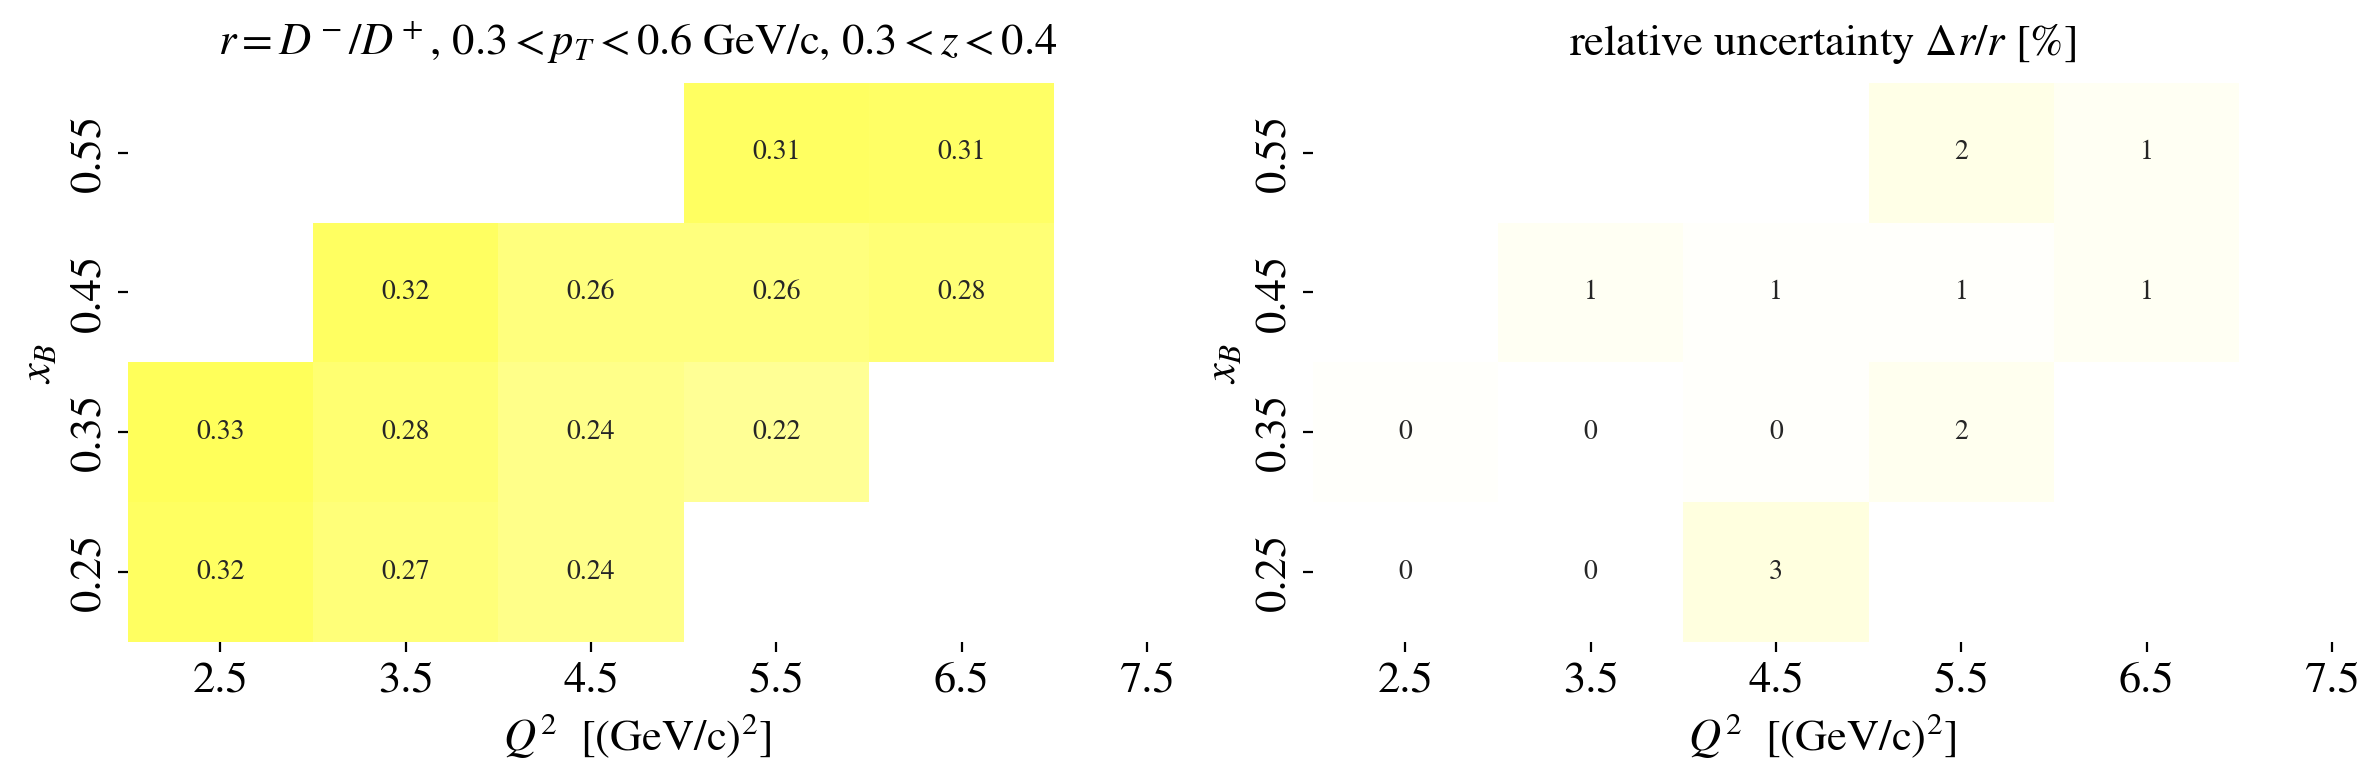

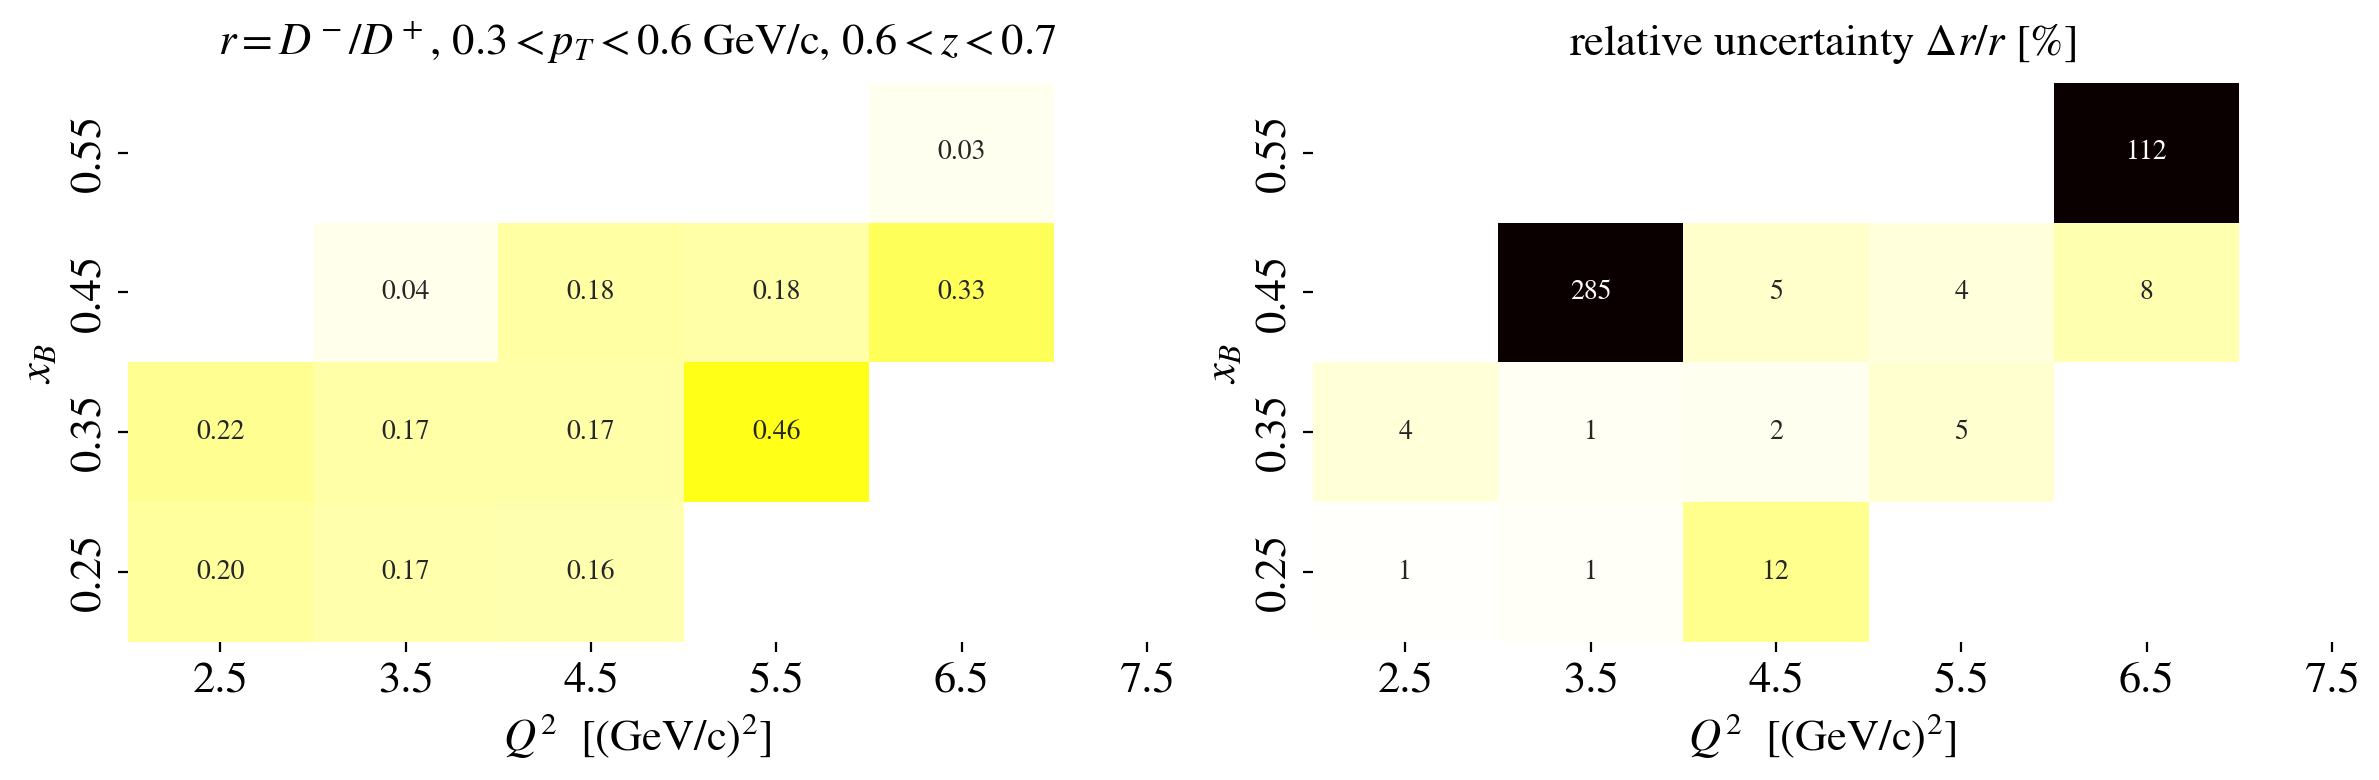

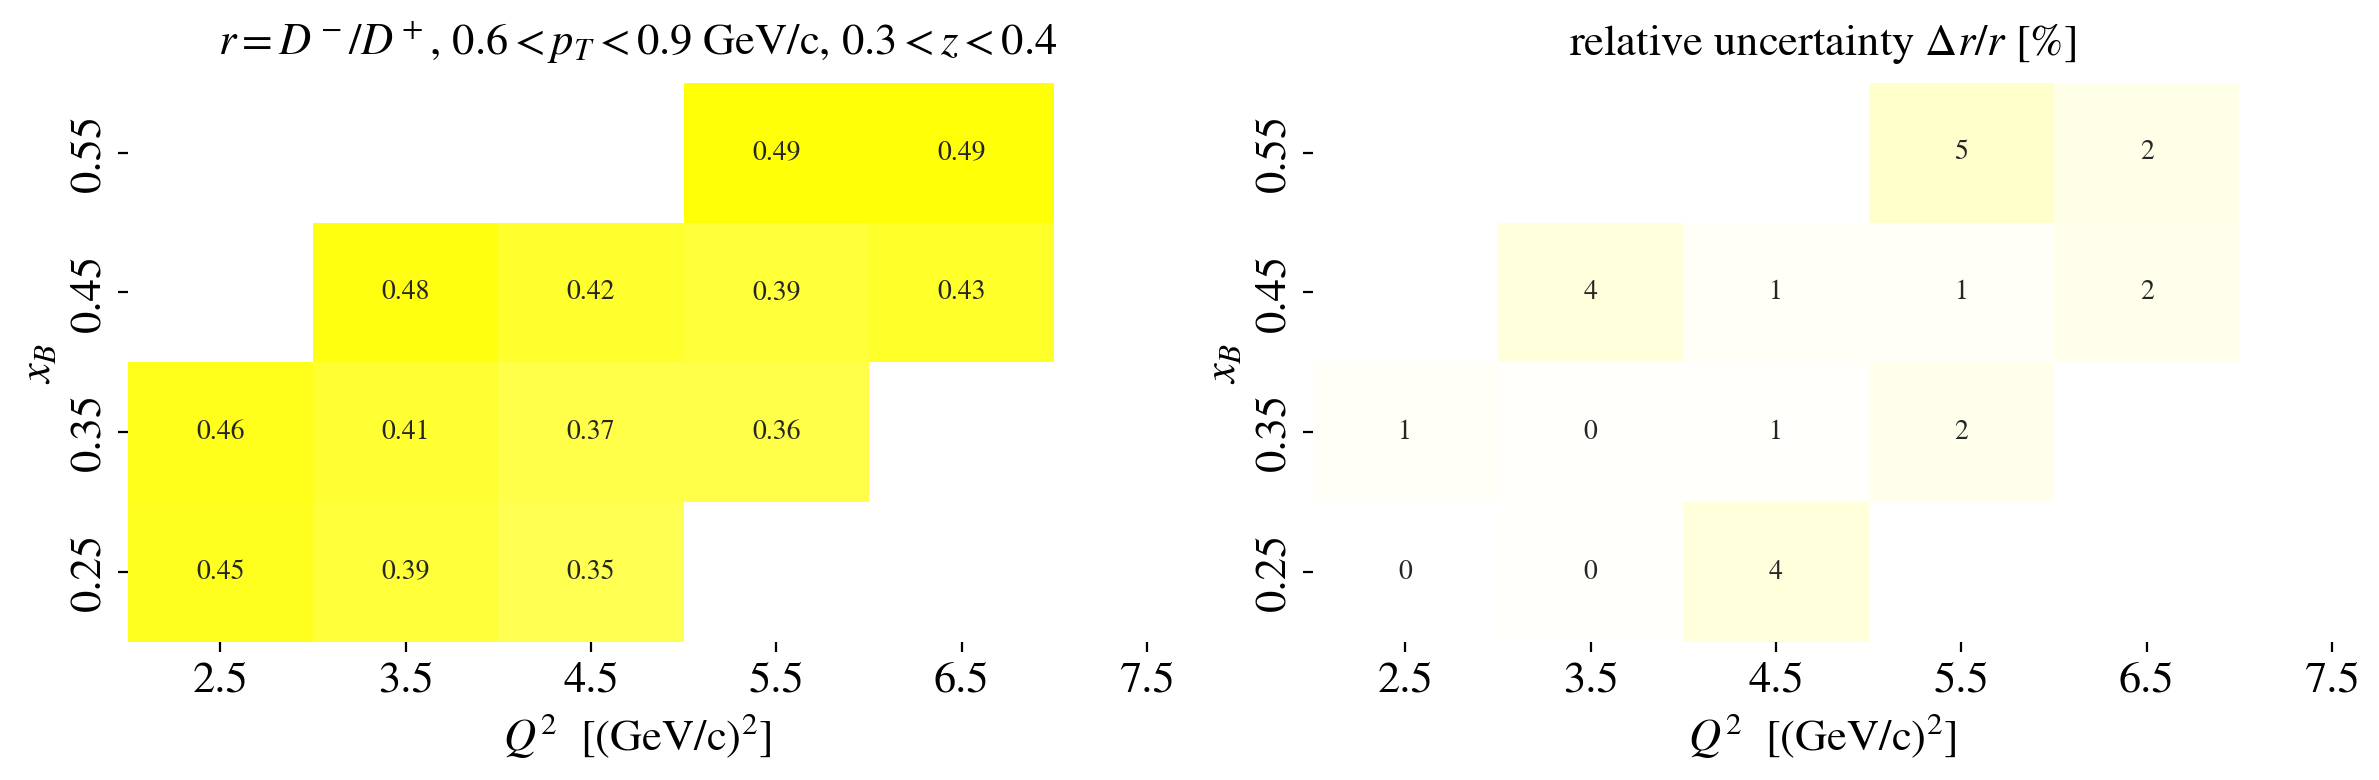

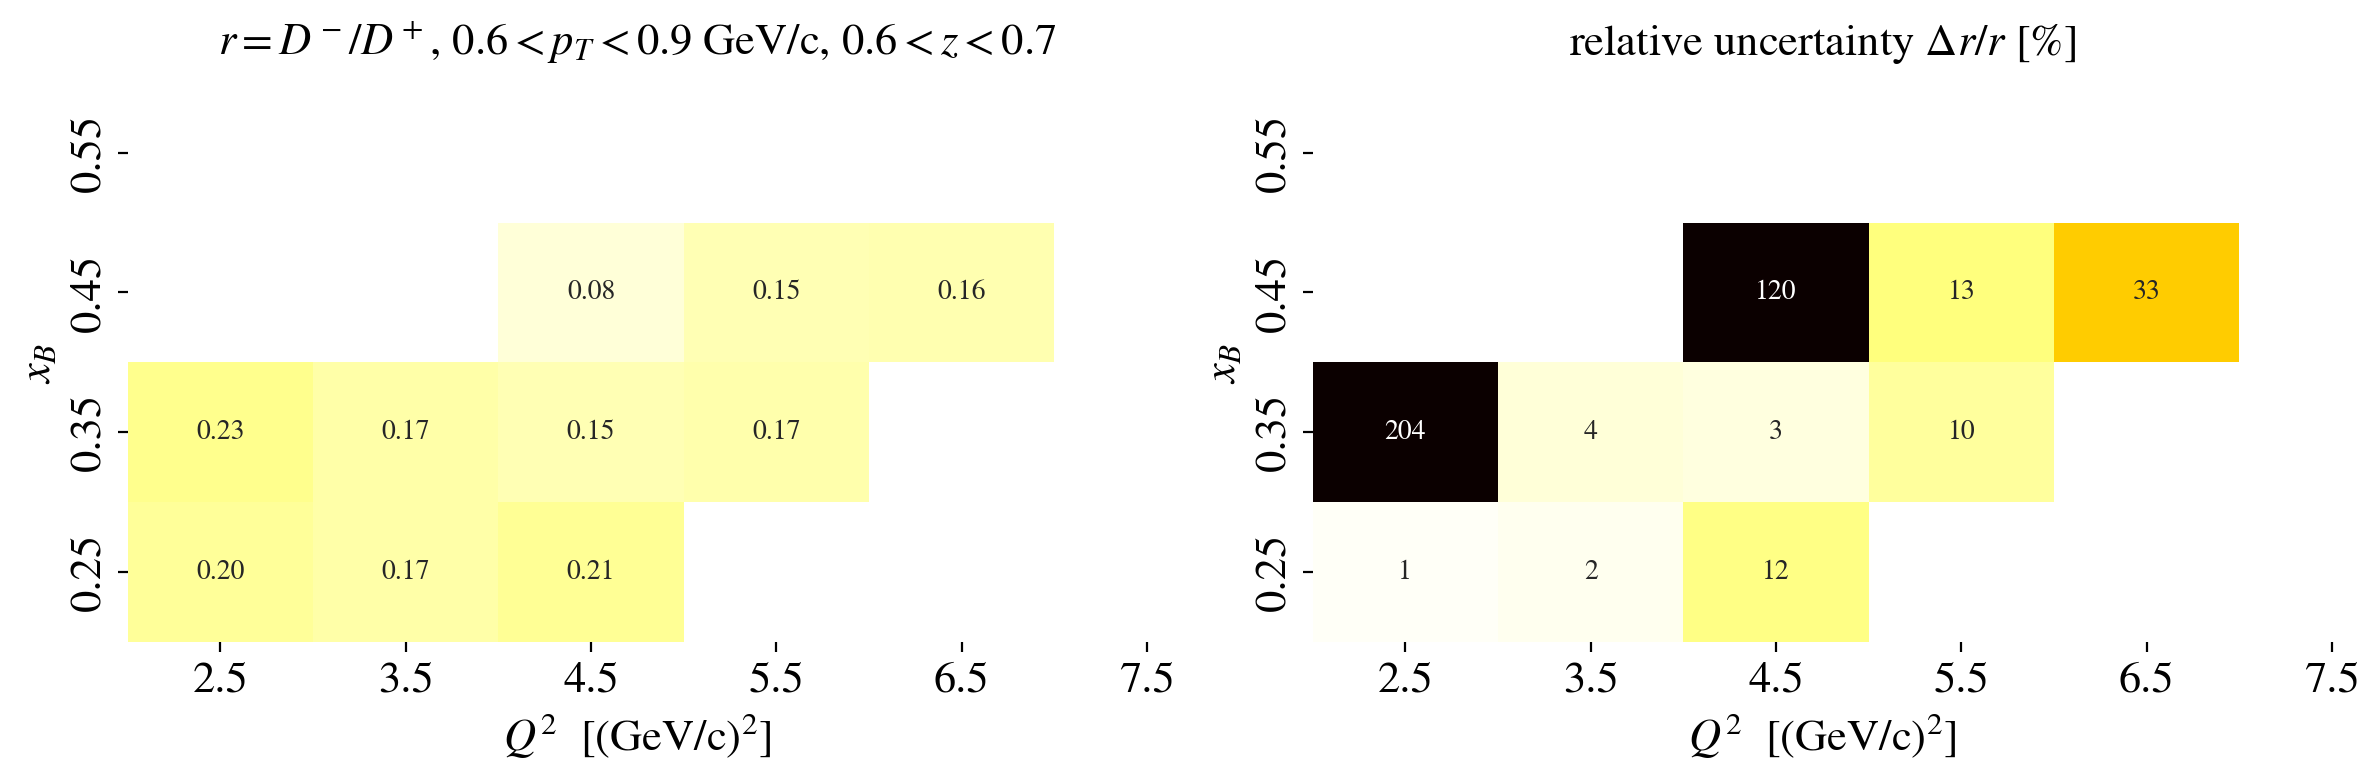

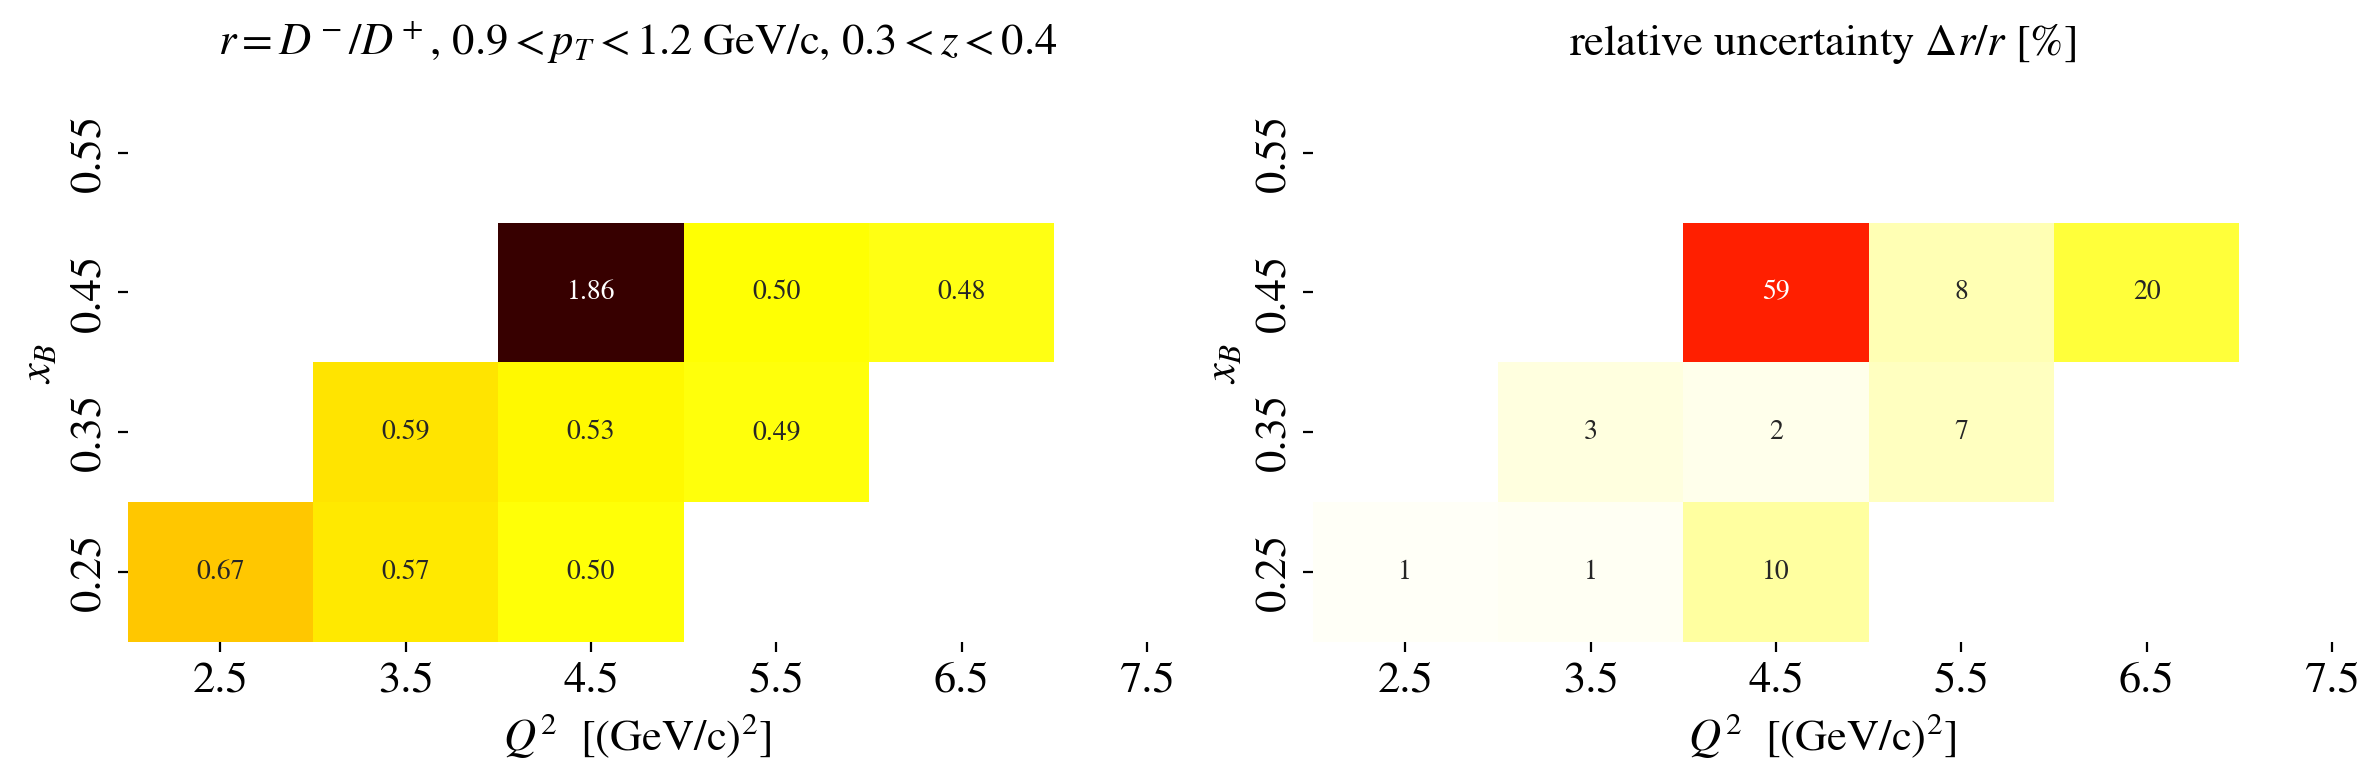

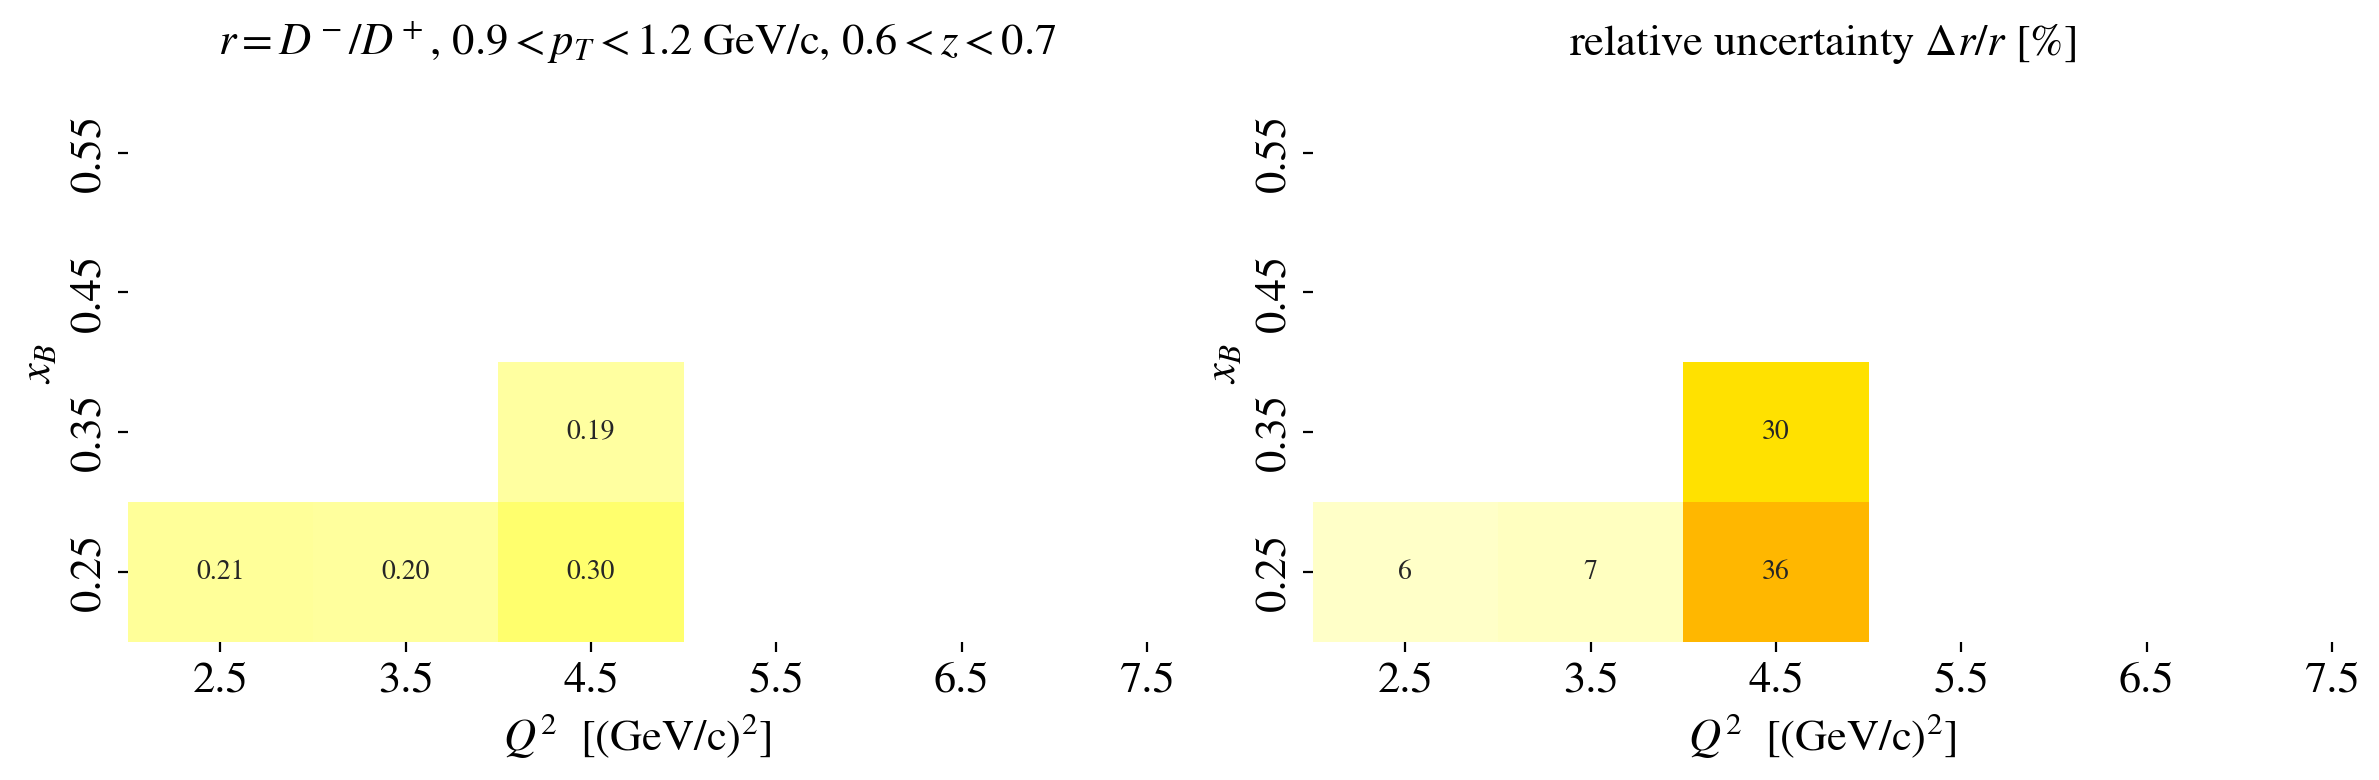

In [21]:
for pT_min in [0,0.3,0.6,0.9]:
    for z_min in [0.3,0.6]:
        z_max  = z_min + 0.1; pT_max = pT_min + 0.3
        
        fig = plt.figure(figsize=(12,4),tight_layout=True); 
        
        df = df_results_4D
        
        df = df[(np.abs(df['$z_{min}$'] - z_min)<0.01) & (np.abs(df['$p_T^{min}$'] - pT_min)<0.01)]
        Q2 = (df['$Q^2_{min}$'] + df['$Q^2_{max}$'])/2
        xB = (df['$x_B^{min}$'] + df['$x_B^{max}$'])/2
        z  = (df['$z_{min}$'] + df['$z_{min}$'])/2

        r = df['$r$'];    
        r_relerr_pct = 100.*df['$\\Delta r$']/r
        
        ax = fig.add_subplot(1,2,1);
        df = pd.DataFrame.from_dict(np.array([Q2, xB, r]).T)
        df.columns = ['X','Y','Z']
        pivotted = df.pivot('Y','X','Z')
        mask = (pivotted == 0)
        sns.heatmap(pivotted,
                    cmap='hot_r', annot=True,  mask = mask,
                    vmin = 0, vmax = 2,
                    xticklabels=np.arange(2.5,8,1), yticklabels=[0.25, 0.35, 0.45, 0.55], fmt='.2f',
                    cbar=False)
        ax.invert_yaxis()

        set_axes(ax,'$Q^2$  [(GeV/c)$^2$]','$x_B$ ',
                 title='$r=D^-/D^+$, $%.1f<p_T<%.1f$ GeV/c, $%.1f<z<%.1f$'%(pT_min, pT_max, z_min, z_max), fontsize=16)
        
        
        ax = fig.add_subplot(1,2,2);
        df = pd.DataFrame.from_dict(np.array([Q2, xB, r_relerr_pct]).T)
        df.columns = ['X','Y','Z']
        pivotted = df.pivot('Y','X','Z')
        mask = (pivotted == 0)
        sns.heatmap(pivotted,
                    cmap='hot_r', annot=True,  mask = mask,
                    vmin = 0, vmax = 100,
                    xticklabels=np.arange(2.5,8,1), yticklabels=[0.25, 0.35, 0.45, 0.55], fmt='.0f',
                    cbar=False)
        ax.invert_yaxis()

        set_axes(ax,'$Q^2$  [(GeV/c)$^2$]','$x_B$ ',
                 title='relative uncertainty $\\Delta r / r$ [%]' , fontsize=16)        
        # save_figure( filename = figures_path + '_%.1f_pT_%.1f_and_%.1f_z_%.1f'%(pT_min,pT_max,z_min, z_max) + '.pdf' )

### Quick check of the kinematic distribution of bins with 0 eventshist2d

In [96]:
df_pips = e_e_pi_pass_cuts['piplus']

In [98]:
W_min = 2.5
W_max = np.inf
df_pips = df_pips[  (z_min   < df_pips.Zpi)   & (df_pips.Zpi < z_max  ) 
                  & (W_min   < df_pips.W  )   & (df_pips.W   < W_max  )   ]

print('after %.2f<%s<%.2f and W cuts: '%(z_min,'Zpi',z_max), len(df_pips),'π+')
df_pips = df_pips[ (Q2_min < df_pips.Q2) & (df_pips.Q2 < Q2_max) ]
print('after %.1f<Q2<%.1f cut: '%(Q2_min,Q2_max), len(df_pips),'π+')
df_pips = df_pips[ (pT_min < df_pips.pi_qFrame_pT) & (df_pips.pi_qFrame_pT < pT_max) ]
print('after pT cut: ', len(df_pips),'π+')
# df_pips = df_pips[ (phi_min < df_pips.pi_qFrame_Phi) & (df_pips.pi_qFrame_Phi < phi_max) ]

after 0.30<Zpi<0.40 and W cuts:  8650720 π+
after 2.0<Q2<3.0 cut:  8650720 π+
after pT cut:  1521167 π+


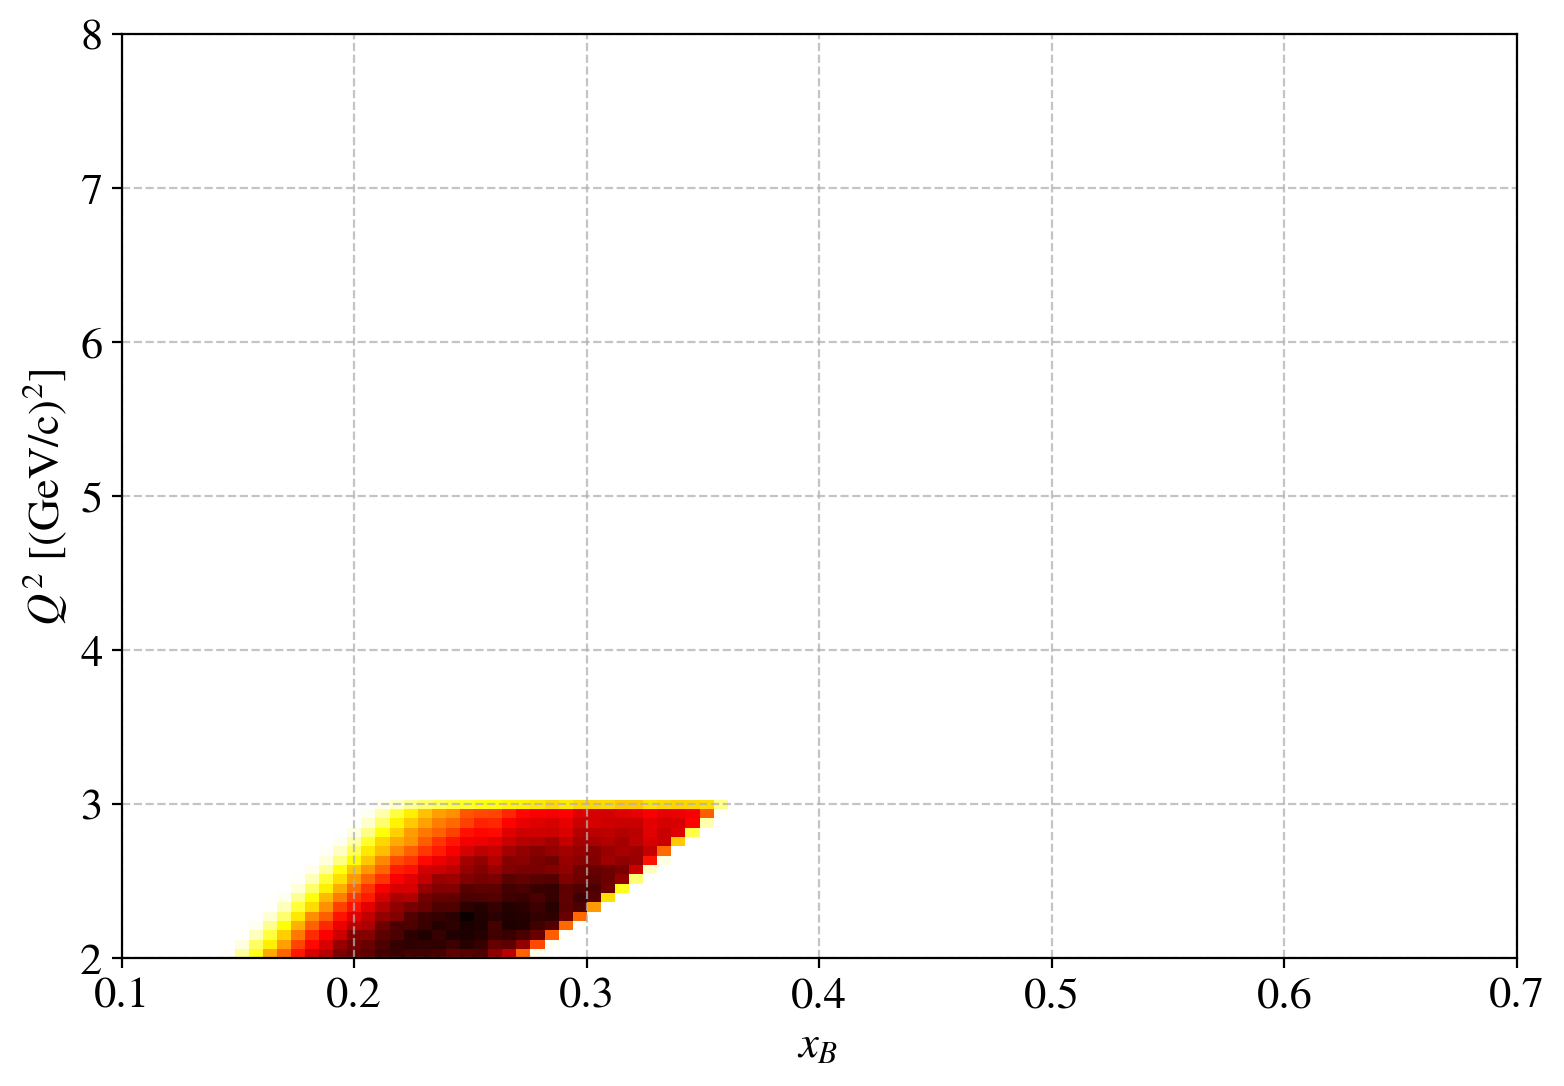

In [101]:
fig,ax = plt.subplots(figsize=(9,6));
ax.hist2d(df_pips.xB, df_pips.Q2, bins=(np.linspace(0.1,0.7,100),np.linspace(2,8,100)), cmap='hot_r')
set_axes(ax,'$x_B$ ', '$Q^2$ [(GeV/c)$^2$]',do_add_grid=True,fontsize=16);